In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
sess = tf.Session(config = tf.ConfigProto(log_device_placement = True))

import keras
keras.backend.set_session(sess)
keras.backend.clear_session()

from CP_Detection.Preprocessing import DataPrep
from CP_Detection.Model import Conv1dAE
from CP_Detection.Visualization import PlotApproachCurve
from CP_Detection.IOtools import SaveModel, LoadModel

Using TensorFlow backend.


Number of test samples : 31
Number of training samples : 279
(14, 310)


Text(0.5, 0.98, 'Amplitude and Phase Curves for the Test Dataset (31 curves)')

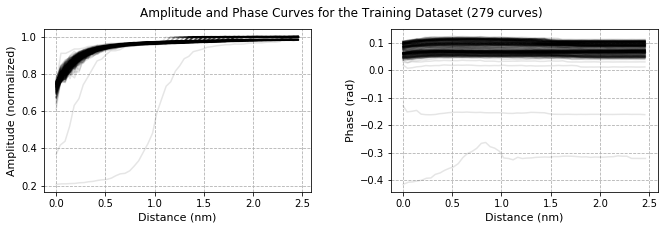

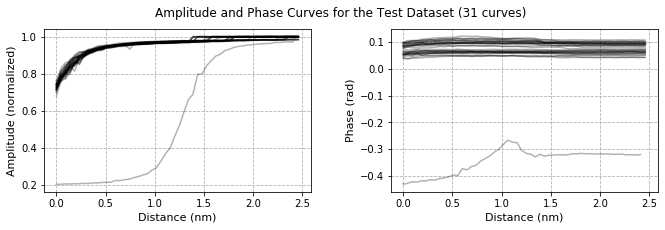

In [2]:
# filepath to the reformatted data file
filepath = '../Raw Data/DohyunBest_deriv3.npz'
test_ratio = 0.1

train_dataset, test_dataset, train, test = DataPrep(filepath, test_ratio)

# Graph the training set
fig1 = PlotApproachCurve(train, alpha = 0.1)
fig1.suptitle('Amplitude and Phase Curves for the Training Dataset (%d curves)' %(train.shape[0]), fontsize = 12)

fig2 = PlotApproachCurve(test, alpha = 0.3)
fig2.suptitle('Amplitude and Phase Curves for the Test Dataset (%d curves)' %(test.shape[0]), fontsize = 12)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence_Input (InputLayer)     (None, 54, 2)        0                                            
__________________________________________________________________________________________________
conv1d_55 (Conv1D)              (None, 54, 64)       704         Sequence_Input[0][0]             
__________________________________________________________________________________________________
activation_55 (Activation)      (None, 54, 64)       0           conv1d_55[0][0]                  
__________________________________________________________________________________________________
dropout_17 (Dropout)            (None, 54, 64)       0           activation_55[0][0]              
__________________________________________________________________________________________________
conv1d_56 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence_Input (InputLayer)     (None, 54, 2)        0                                            
__________________________________________________________________________________________________
Constant_Input (InputLayer)     (None, 54, 2)        0                                            
__________________________________________________________________________________________________
Encoder (Model)                 (None, 54, 1)        69409       Sequence_Input[0][0]             
                                                                 Constant_Input[0][0]             
__________________________________________________________________________________________________
Decoder (Model)                 (None, 54, 2)        69094       Encoder[1][0]                    
          

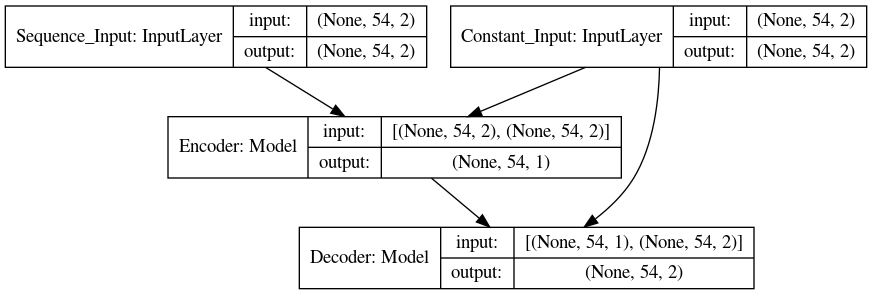

In [10]:
seq_length = train.shape[1]
abstraction_block = 'C:64|C:64|C:64|C:64'
composition_block = 'P:64|P:32|P:16|P:8|P:4'

model, hyperparameters = Conv1dAE(seq_length = seq_length, abstraction_block = abstraction_block, 
                                  composition_block = composition_block, batch_norm = False, dropout_rate = 0.2, lr = 1e-4)

autoencoder = model['autoencoder']
encoder = model['encoder']

from keras.utils.vis_utils import plot_model
plot_model(autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(filename='model_plot.png') 

In [ ]:
batch_size = hyperparameters['batch_size']
autoencoder.fit(x = [train[:,:,1:3], train[:,:,3:]], y = train[:,:,1:3], epochs = 100000, batch_size = batch_size, validation_data = ([test[:,:,1:3], test[:,:,3:]], test[:,:,1:3]))


Train on 279 samples, validate on 31 samples
Epoch 1/100000
279/279 [==============================] - 3s 10ms/step - loss: 0.9544 - val_loss: 0.9298
Epoch 2/100000
279/279 [==============================] - 0s 326us/step - loss: 0.9217 - val_loss: 0.8870
Epoch 3/100000
279/279 [==============================] - 0s 335us/step - loss: 0.8947 - val_loss: 0.8570
Epoch 4/100000
279/279 [==============================] - 0s 327us/step - loss: 0.8712 - val_loss: 0.8303
Epoch 5/100000
279/279 [==============================] - 0s 373us/step - loss: 0.8559 - val_loss: 0.8131
Epoch 6/100000
279/279 [==============================] - 0s 379us/step - loss: 0.8475 - val_loss: 0.8059
Epoch 7/100000
279/279 [==============================] - 0s 364us/step - loss: 0.8383 - val_loss: 0.8043
Epoch 8/100000
279/279 [==============================] - 0s 352us/step - loss: 0.8299 - val_loss: 0.7978
Epoch 9/100000
279/279 [==============================] - 0s 357us/step - loss: 0.8208 - val_loss: 0.7889
Ep

279/279 [==============================] - 0s 398us/step - loss: 0.5639 - val_loss: 0.5176
Epoch 78/100000
279/279 [==============================] - 0s 372us/step - loss: 0.5601 - val_loss: 0.5172
Epoch 79/100000
279/279 [==============================] - 0s 436us/step - loss: 0.5568 - val_loss: 0.5086
Epoch 80/100000
279/279 [==============================] - 0s 327us/step - loss: 0.5530 - val_loss: 0.5082
Epoch 81/100000
279/279 [==============================] - 0s 339us/step - loss: 0.5502 - val_loss: 0.5004
Epoch 82/100000
279/279 [==============================] - 0s 424us/step - loss: 0.5461 - val_loss: 0.4994
Epoch 83/100000
279/279 [==============================] - 0s 469us/step - loss: 0.5461 - val_loss: 0.4939
Epoch 84/100000
279/279 [==============================] - 0s 340us/step - loss: 0.5411 - val_loss: 0.4905
Epoch 85/100000
279/279 [==============================] - 0s 383us/step - loss: 0.5414 - val_loss: 0.4863
Epoch 86/100000
279/279 [============================

279/279 [==============================] - 0s 343us/step - loss: 0.4092 - val_loss: 0.3418
Epoch 154/100000
279/279 [==============================] - 0s 329us/step - loss: 0.4083 - val_loss: 0.3442
Epoch 155/100000
279/279 [==============================] - 0s 328us/step - loss: 0.4067 - val_loss: 0.3393
Epoch 156/100000
279/279 [==============================] - 0s 324us/step - loss: 0.4077 - val_loss: 0.3405
Epoch 157/100000
279/279 [==============================] - 0s 380us/step - loss: 0.4028 - val_loss: 0.3371
Epoch 158/100000
279/279 [==============================] - 0s 414us/step - loss: 0.4019 - val_loss: 0.3342
Epoch 159/100000
279/279 [==============================] - 0s 342us/step - loss: 0.3959 - val_loss: 0.3326
Epoch 160/100000
279/279 [==============================] - 0s 328us/step - loss: 0.3969 - val_loss: 0.3304
Epoch 161/100000
279/279 [==============================] - 0s 334us/step - loss: 0.3993 - val_loss: 0.3301
Epoch 162/100000
279/279 [===================

279/279 [==============================] - 0s 355us/step - loss: 0.2996 - val_loss: 0.2013
Epoch 230/100000
279/279 [==============================] - 0s 367us/step - loss: 0.2977 - val_loss: 0.1995
Epoch 231/100000
279/279 [==============================] - 0s 385us/step - loss: 0.3013 - val_loss: 0.1956
Epoch 232/100000
279/279 [==============================] - 0s 314us/step - loss: 0.2985 - val_loss: 0.1969
Epoch 233/100000
279/279 [==============================] - 0s 325us/step - loss: 0.2960 - val_loss: 0.1943
Epoch 234/100000
279/279 [==============================] - 0s 341us/step - loss: 0.2922 - val_loss: 0.1948
Epoch 235/100000
279/279 [==============================] - 0s 340us/step - loss: 0.2956 - val_loss: 0.1919
Epoch 236/100000
279/279 [==============================] - 0s 337us/step - loss: 0.2921 - val_loss: 0.1906
Epoch 237/100000
279/279 [==============================] - 0s 338us/step - loss: 0.2898 - val_loss: 0.1892
Epoch 238/100000
279/279 [===================

279/279 [==============================] - 0s 487us/step - loss: 0.2183 - val_loss: 0.1243
Epoch 306/100000
279/279 [==============================] - 0s 446us/step - loss: 0.2175 - val_loss: 0.1231
Epoch 307/100000
279/279 [==============================] - 0s 410us/step - loss: 0.2163 - val_loss: 0.1235
Epoch 308/100000
279/279 [==============================] - 0s 417us/step - loss: 0.2143 - val_loss: 0.1224
Epoch 309/100000
279/279 [==============================] - 0s 418us/step - loss: 0.2143 - val_loss: 0.1198
Epoch 310/100000
279/279 [==============================] - 0s 459us/step - loss: 0.2141 - val_loss: 0.1228
Epoch 311/100000
279/279 [==============================] - 0s 323us/step - loss: 0.2116 - val_loss: 0.1197
Epoch 312/100000
279/279 [==============================] - 0s 327us/step - loss: 0.2111 - val_loss: 0.1191
Epoch 313/100000
279/279 [==============================] - 0s 482us/step - loss: 0.2117 - val_loss: 0.1200
Epoch 314/100000
279/279 [===================

279/279 [==============================] - 0s 455us/step - loss: 0.1561 - val_loss: 0.0787
Epoch 382/100000
279/279 [==============================] - 0s 377us/step - loss: 0.1528 - val_loss: 0.0756
Epoch 383/100000
279/279 [==============================] - 0s 378us/step - loss: 0.1513 - val_loss: 0.0742
Epoch 384/100000
279/279 [==============================] - 0s 403us/step - loss: 0.1527 - val_loss: 0.0762
Epoch 385/100000
279/279 [==============================] - 0s 475us/step - loss: 0.1509 - val_loss: 0.0718
Epoch 386/100000
279/279 [==============================] - 0s 358us/step - loss: 0.1502 - val_loss: 0.0726
Epoch 387/100000
279/279 [==============================] - 0s 398us/step - loss: 0.1510 - val_loss: 0.0722
Epoch 388/100000
279/279 [==============================] - 0s 320us/step - loss: 0.1495 - val_loss: 0.0735
Epoch 389/100000
279/279 [==============================] - 0s 329us/step - loss: 0.1501 - val_loss: 0.0723
Epoch 390/100000
279/279 [===================

279/279 [==============================] - 0s 657us/step - loss: 0.1068 - val_loss: 0.0440
Epoch 458/100000
279/279 [==============================] - 0s 615us/step - loss: 0.1075 - val_loss: 0.0445
Epoch 459/100000
279/279 [==============================] - 0s 410us/step - loss: 0.1060 - val_loss: 0.0418
Epoch 460/100000
279/279 [==============================] - 0s 421us/step - loss: 0.1056 - val_loss: 0.0429
Epoch 461/100000
279/279 [==============================] - 0s 357us/step - loss: 0.1060 - val_loss: 0.0420
Epoch 462/100000
279/279 [==============================] - 0s 326us/step - loss: 0.1063 - val_loss: 0.0416
Epoch 463/100000
279/279 [==============================] - 0s 314us/step - loss: 0.1062 - val_loss: 0.0412
Epoch 464/100000
279/279 [==============================] - 0s 344us/step - loss: 0.1054 - val_loss: 0.0415
Epoch 465/100000
279/279 [==============================] - 0s 431us/step - loss: 0.1033 - val_loss: 0.0406
Epoch 466/100000
279/279 [===================

279/279 [==============================] - 0s 388us/step - loss: 0.0803 - val_loss: 0.0253
Epoch 534/100000
279/279 [==============================] - 0s 351us/step - loss: 0.0787 - val_loss: 0.0255
Epoch 535/100000
279/279 [==============================] - 0s 349us/step - loss: 0.0780 - val_loss: 0.0255
Epoch 536/100000
279/279 [==============================] - 0s 376us/step - loss: 0.0781 - val_loss: 0.0257
Epoch 537/100000
279/279 [==============================] - 0s 436us/step - loss: 0.0756 - val_loss: 0.0249
Epoch 538/100000
279/279 [==============================] - 0s 494us/step - loss: 0.0777 - val_loss: 0.0255
Epoch 539/100000
279/279 [==============================] - 0s 534us/step - loss: 0.0772 - val_loss: 0.0251
Epoch 540/100000
279/279 [==============================] - 0s 546us/step - loss: 0.0775 - val_loss: 0.0250
Epoch 541/100000
279/279 [==============================] - 0s 378us/step - loss: 0.0766 - val_loss: 0.0254
Epoch 542/100000
279/279 [===================

279/279 [==============================] - 0s 455us/step - loss: 0.0635 - val_loss: 0.0185
Epoch 610/100000
279/279 [==============================] - 0s 349us/step - loss: 0.0644 - val_loss: 0.0187
Epoch 611/100000
279/279 [==============================] - 0s 336us/step - loss: 0.0640 - val_loss: 0.0187
Epoch 612/100000
279/279 [==============================] - 0s 365us/step - loss: 0.0637 - val_loss: 0.0189
Epoch 613/100000
279/279 [==============================] - 0s 362us/step - loss: 0.0622 - val_loss: 0.0191
Epoch 614/100000
279/279 [==============================] - 0s 366us/step - loss: 0.0623 - val_loss: 0.0191
Epoch 615/100000
279/279 [==============================] - 0s 431us/step - loss: 0.0626 - val_loss: 0.0192
Epoch 616/100000
279/279 [==============================] - 0s 494us/step - loss: 0.0617 - val_loss: 0.0182
Epoch 617/100000
279/279 [==============================] - 0s 492us/step - loss: 0.0623 - val_loss: 0.0194
Epoch 618/100000
279/279 [===================

279/279 [==============================] - 0s 400us/step - loss: 0.0531 - val_loss: 0.0185
Epoch 686/100000
279/279 [==============================] - 0s 370us/step - loss: 0.0526 - val_loss: 0.0183
Epoch 687/100000
279/279 [==============================] - 0s 365us/step - loss: 0.0521 - val_loss: 0.0180
Epoch 688/100000
279/279 [==============================] - 0s 385us/step - loss: 0.0524 - val_loss: 0.0183
Epoch 689/100000
279/279 [==============================] - 0s 375us/step - loss: 0.0519 - val_loss: 0.0184
Epoch 690/100000
279/279 [==============================] - 0s 367us/step - loss: 0.0529 - val_loss: 0.0180
Epoch 691/100000
279/279 [==============================] - 0s 504us/step - loss: 0.0524 - val_loss: 0.0178
Epoch 692/100000
279/279 [==============================] - 0s 401us/step - loss: 0.0521 - val_loss: 0.0180
Epoch 693/100000
279/279 [==============================] - 0s 381us/step - loss: 0.0512 - val_loss: 0.0182
Epoch 694/100000
279/279 [===================

279/279 [==============================] - 0s 391us/step - loss: 0.0444 - val_loss: 0.0186
Epoch 762/100000
279/279 [==============================] - 0s 466us/step - loss: 0.0432 - val_loss: 0.0198
Epoch 763/100000
279/279 [==============================] - 0s 458us/step - loss: 0.0432 - val_loss: 0.0194
Epoch 764/100000
279/279 [==============================] - 0s 444us/step - loss: 0.0442 - val_loss: 0.0196
Epoch 765/100000
279/279 [==============================] - 0s 398us/step - loss: 0.0431 - val_loss: 0.0188
Epoch 766/100000
279/279 [==============================] - 0s 392us/step - loss: 0.0432 - val_loss: 0.0191
Epoch 767/100000
279/279 [==============================] - 0s 541us/step - loss: 0.0433 - val_loss: 0.0174
Epoch 768/100000
279/279 [==============================] - 0s 463us/step - loss: 0.0443 - val_loss: 0.0181
Epoch 769/100000
279/279 [==============================] - 0s 391us/step - loss: 0.0415 - val_loss: 0.0180
Epoch 770/100000
279/279 [===================

279/279 [==============================] - 0s 308us/step - loss: 0.0351 - val_loss: 0.0194
Epoch 838/100000
279/279 [==============================] - 0s 360us/step - loss: 0.0356 - val_loss: 0.0212
Epoch 839/100000
279/279 [==============================] - 0s 406us/step - loss: 0.0358 - val_loss: 0.0188
Epoch 840/100000
279/279 [==============================] - 0s 374us/step - loss: 0.0363 - val_loss: 0.0188
Epoch 841/100000
279/279 [==============================] - 0s 323us/step - loss: 0.0349 - val_loss: 0.0191
Epoch 842/100000
279/279 [==============================] - 0s 322us/step - loss: 0.0348 - val_loss: 0.0191
Epoch 843/100000
279/279 [==============================] - 0s 343us/step - loss: 0.0359 - val_loss: 0.0193
Epoch 844/100000
279/279 [==============================] - 0s 381us/step - loss: 0.0338 - val_loss: 0.0195
Epoch 845/100000
279/279 [==============================] - 0s 521us/step - loss: 0.0339 - val_loss: 0.0198
Epoch 846/100000
279/279 [===================

279/279 [==============================] - 0s 417us/step - loss: 0.0286 - val_loss: 0.0179
Epoch 914/100000
279/279 [==============================] - 0s 325us/step - loss: 0.0281 - val_loss: 0.0180
Epoch 915/100000
279/279 [==============================] - 0s 354us/step - loss: 0.0271 - val_loss: 0.0202
Epoch 916/100000
279/279 [==============================] - 0s 375us/step - loss: 0.0280 - val_loss: 0.0212
Epoch 917/100000
279/279 [==============================] - 0s 350us/step - loss: 0.0281 - val_loss: 0.0220
Epoch 918/100000
279/279 [==============================] - 0s 338us/step - loss: 0.0277 - val_loss: 0.0201
Epoch 919/100000
279/279 [==============================] - 0s 343us/step - loss: 0.0265 - val_loss: 0.0201
Epoch 920/100000
279/279 [==============================] - 0s 504us/step - loss: 0.0266 - val_loss: 0.0181
Epoch 921/100000
279/279 [==============================] - 0s 371us/step - loss: 0.0276 - val_loss: 0.0182
Epoch 922/100000
279/279 [===================

279/279 [==============================] - 0s 316us/step - loss: 0.0218 - val_loss: 0.0207
Epoch 990/100000
279/279 [==============================] - 0s 324us/step - loss: 0.0221 - val_loss: 0.0214
Epoch 991/100000
279/279 [==============================] - 0s 354us/step - loss: 0.0213 - val_loss: 0.0191
Epoch 992/100000
279/279 [==============================] - 0s 444us/step - loss: 0.0208 - val_loss: 0.0190
Epoch 993/100000
279/279 [==============================] - 0s 428us/step - loss: 0.0206 - val_loss: 0.0202
Epoch 994/100000
279/279 [==============================] - 0s 361us/step - loss: 0.0212 - val_loss: 0.0207
Epoch 995/100000
279/279 [==============================] - 0s 400us/step - loss: 0.0214 - val_loss: 0.0205
Epoch 996/100000
279/279 [==============================] - 0s 497us/step - loss: 0.0213 - val_loss: 0.0196
Epoch 997/100000
279/279 [==============================] - 0s 446us/step - loss: 0.0221 - val_loss: 0.0197
Epoch 998/100000
279/279 [===================

279/279 [==============================] - 0s 445us/step - loss: 0.0168 - val_loss: 0.0196
Epoch 1065/100000
279/279 [==============================] - 0s 395us/step - loss: 0.0169 - val_loss: 0.0185
Epoch 1066/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0171 - val_loss: 0.0177
Epoch 1067/100000
279/279 [==============================] - 0s 319us/step - loss: 0.0171 - val_loss: 0.0179
Epoch 1068/100000
279/279 [==============================] - 0s 319us/step - loss: 0.0168 - val_loss: 0.0195
Epoch 1069/100000
279/279 [==============================] - 0s 358us/step - loss: 0.0175 - val_loss: 0.0200
Epoch 1070/100000
279/279 [==============================] - 0s 492us/step - loss: 0.0173 - val_loss: 0.0203
Epoch 1071/100000
279/279 [==============================] - 0s 491us/step - loss: 0.0152 - val_loss: 0.0223
Epoch 1072/100000
279/279 [==============================] - 0s 370us/step - loss: 0.0171 - val_loss: 0.0220
Epoch 1073/100000
279/279 [==========

279/279 [==============================] - 0s 373us/step - loss: 0.0149 - val_loss: 0.0188
Epoch 1140/100000
279/279 [==============================] - 0s 360us/step - loss: 0.0145 - val_loss: 0.0195
Epoch 1141/100000
279/279 [==============================] - 0s 382us/step - loss: 0.0147 - val_loss: 0.0195
Epoch 1142/100000
279/279 [==============================] - 0s 364us/step - loss: 0.0147 - val_loss: 0.0195
Epoch 1143/100000
279/279 [==============================] - 0s 316us/step - loss: 0.0146 - val_loss: 0.0190
Epoch 1144/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0144 - val_loss: 0.0197
Epoch 1145/100000
279/279 [==============================] - 0s 360us/step - loss: 0.0135 - val_loss: 0.0198
Epoch 1146/100000
279/279 [==============================] - 0s 511us/step - loss: 0.0141 - val_loss: 0.0197
Epoch 1147/100000
279/279 [==============================] - 0s 635us/step - loss: 0.0145 - val_loss: 0.0198
Epoch 1148/100000
279/279 [==========

279/279 [==============================] - 0s 315us/step - loss: 0.0132 - val_loss: 0.0211
Epoch 1215/100000
279/279 [==============================] - 0s 312us/step - loss: 0.0134 - val_loss: 0.0209
Epoch 1216/100000
279/279 [==============================] - 0s 318us/step - loss: 0.0139 - val_loss: 0.0223
Epoch 1217/100000
279/279 [==============================] - 0s 320us/step - loss: 0.0135 - val_loss: 0.0211
Epoch 1218/100000
279/279 [==============================] - 0s 415us/step - loss: 0.0129 - val_loss: 0.0204
Epoch 1219/100000
279/279 [==============================] - 0s 442us/step - loss: 0.0129 - val_loss: 0.0198
Epoch 1220/100000
279/279 [==============================] - 0s 481us/step - loss: 0.0132 - val_loss: 0.0226
Epoch 1221/100000
279/279 [==============================] - 0s 379us/step - loss: 0.0137 - val_loss: 0.0217
Epoch 1222/100000
279/279 [==============================] - 0s 376us/step - loss: 0.0138 - val_loss: 0.0217
Epoch 1223/100000
279/279 [==========

279/279 [==============================] - 0s 508us/step - loss: 0.0116 - val_loss: 0.0203
Epoch 1290/100000
279/279 [==============================] - 0s 477us/step - loss: 0.0119 - val_loss: 0.0182
Epoch 1291/100000
279/279 [==============================] - 0s 543us/step - loss: 0.0125 - val_loss: 0.0178
Epoch 1292/100000
279/279 [==============================] - 0s 400us/step - loss: 0.0118 - val_loss: 0.0193
Epoch 1293/100000
279/279 [==============================] - 0s 383us/step - loss: 0.0112 - val_loss: 0.0192
Epoch 1294/100000
279/279 [==============================] - 0s 516us/step - loss: 0.0117 - val_loss: 0.0200
Epoch 1295/100000
279/279 [==============================] - 0s 392us/step - loss: 0.0118 - val_loss: 0.0191
Epoch 1296/100000
279/279 [==============================] - 0s 353us/step - loss: 0.0125 - val_loss: 0.0192
Epoch 1297/100000
279/279 [==============================] - 0s 460us/step - loss: 0.0120 - val_loss: 0.0179
Epoch 1298/100000
279/279 [==========

279/279 [==============================] - 0s 416us/step - loss: 0.0111 - val_loss: 0.0211
Epoch 1365/100000
279/279 [==============================] - 0s 376us/step - loss: 0.0109 - val_loss: 0.0219
Epoch 1366/100000
279/279 [==============================] - 0s 392us/step - loss: 0.0108 - val_loss: 0.0210
Epoch 1367/100000
279/279 [==============================] - 0s 352us/step - loss: 0.0108 - val_loss: 0.0237
Epoch 1368/100000
279/279 [==============================] - 0s 350us/step - loss: 0.0110 - val_loss: 0.0205
Epoch 1369/100000
279/279 [==============================] - 0s 355us/step - loss: 0.0111 - val_loss: 0.0204
Epoch 1370/100000
279/279 [==============================] - 0s 353us/step - loss: 0.0108 - val_loss: 0.0194
Epoch 1371/100000
279/279 [==============================] - 0s 310us/step - loss: 0.0103 - val_loss: 0.0203
Epoch 1372/100000
279/279 [==============================] - 0s 340us/step - loss: 0.0108 - val_loss: 0.0204
Epoch 1373/100000
279/279 [==========

279/279 [==============================] - 0s 416us/step - loss: 0.0102 - val_loss: 0.0202
Epoch 1440/100000
279/279 [==============================] - 0s 350us/step - loss: 0.0097 - val_loss: 0.0211
Epoch 1441/100000
279/279 [==============================] - 0s 440us/step - loss: 0.0097 - val_loss: 0.0212
Epoch 1442/100000
279/279 [==============================] - 0s 446us/step - loss: 0.0102 - val_loss: 0.0206
Epoch 1443/100000
279/279 [==============================] - 0s 414us/step - loss: 0.0100 - val_loss: 0.0201
Epoch 1444/100000
279/279 [==============================] - 0s 387us/step - loss: 0.0100 - val_loss: 0.0203
Epoch 1445/100000
279/279 [==============================] - 0s 457us/step - loss: 0.0101 - val_loss: 0.0204
Epoch 1446/100000
279/279 [==============================] - 0s 526us/step - loss: 0.0107 - val_loss: 0.0202
Epoch 1447/100000
279/279 [==============================] - 0s 441us/step - loss: 0.0095 - val_loss: 0.0206
Epoch 1448/100000
279/279 [==========

279/279 [==============================] - 0s 369us/step - loss: 0.0095 - val_loss: 0.0196
Epoch 1515/100000
279/279 [==============================] - 0s 426us/step - loss: 0.0099 - val_loss: 0.0200
Epoch 1516/100000
279/279 [==============================] - 0s 478us/step - loss: 0.0092 - val_loss: 0.0186
Epoch 1517/100000
279/279 [==============================] - 0s 349us/step - loss: 0.0092 - val_loss: 0.0200
Epoch 1518/100000
279/279 [==============================] - 0s 371us/step - loss: 0.0089 - val_loss: 0.0195
Epoch 1519/100000
279/279 [==============================] - 0s 365us/step - loss: 0.0088 - val_loss: 0.0201
Epoch 1520/100000
279/279 [==============================] - 0s 418us/step - loss: 0.0091 - val_loss: 0.0202
Epoch 1521/100000
279/279 [==============================] - 0s 453us/step - loss: 0.0088 - val_loss: 0.0201
Epoch 1522/100000
279/279 [==============================] - 0s 533us/step - loss: 0.0091 - val_loss: 0.0207
Epoch 1523/100000
279/279 [==========

279/279 [==============================] - 0s 317us/step - loss: 0.0089 - val_loss: 0.0191
Epoch 1590/100000
279/279 [==============================] - 0s 311us/step - loss: 0.0083 - val_loss: 0.0206
Epoch 1591/100000
279/279 [==============================] - 0s 332us/step - loss: 0.0091 - val_loss: 0.0209
Epoch 1592/100000
279/279 [==============================] - 0s 388us/step - loss: 0.0086 - val_loss: 0.0218
Epoch 1593/100000
279/279 [==============================] - 0s 385us/step - loss: 0.0088 - val_loss: 0.0196
Epoch 1594/100000
279/279 [==============================] - 0s 327us/step - loss: 0.0082 - val_loss: 0.0199
Epoch 1595/100000
279/279 [==============================] - 0s 402us/step - loss: 0.0089 - val_loss: 0.0183
Epoch 1596/100000
279/279 [==============================] - 0s 396us/step - loss: 0.0086 - val_loss: 0.0179
Epoch 1597/100000
279/279 [==============================] - 0s 336us/step - loss: 0.0086 - val_loss: 0.0182
Epoch 1598/100000
279/279 [==========

279/279 [==============================] - 0s 506us/step - loss: 0.0079 - val_loss: 0.0199
Epoch 1665/100000
279/279 [==============================] - 0s 411us/step - loss: 0.0087 - val_loss: 0.0202
Epoch 1666/100000
279/279 [==============================] - 0s 427us/step - loss: 0.0083 - val_loss: 0.0194
Epoch 1667/100000
279/279 [==============================] - 0s 354us/step - loss: 0.0081 - val_loss: 0.0194
Epoch 1668/100000
279/279 [==============================] - 0s 445us/step - loss: 0.0079 - val_loss: 0.0196
Epoch 1669/100000
279/279 [==============================] - 0s 510us/step - loss: 0.0087 - val_loss: 0.0201
Epoch 1670/100000
279/279 [==============================] - 0s 404us/step - loss: 0.0078 - val_loss: 0.0200
Epoch 1671/100000
279/279 [==============================] - 0s 350us/step - loss: 0.0086 - val_loss: 0.0195
Epoch 1672/100000
279/279 [==============================] - 0s 392us/step - loss: 0.0080 - val_loss: 0.0190
Epoch 1673/100000
279/279 [==========

279/279 [==============================] - 0s 372us/step - loss: 0.0079 - val_loss: 0.0201
Epoch 1740/100000
279/279 [==============================] - 0s 340us/step - loss: 0.0076 - val_loss: 0.0189
Epoch 1741/100000
279/279 [==============================] - 0s 350us/step - loss: 0.0076 - val_loss: 0.0195
Epoch 1742/100000
279/279 [==============================] - 0s 321us/step - loss: 0.0079 - val_loss: 0.0193
Epoch 1743/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0076 - val_loss: 0.0198
Epoch 1744/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0083 - val_loss: 0.0187
Epoch 1745/100000
279/279 [==============================] - 0s 342us/step - loss: 0.0080 - val_loss: 0.0197
Epoch 1746/100000
279/279 [==============================] - 0s 406us/step - loss: 0.0073 - val_loss: 0.0201
Epoch 1747/100000
279/279 [==============================] - 0s 571us/step - loss: 0.0078 - val_loss: 0.0186
Epoch 1748/100000
279/279 [==========

279/279 [==============================] - 0s 491us/step - loss: 0.0078 - val_loss: 0.0236
Epoch 1815/100000
279/279 [==============================] - 0s 463us/step - loss: 0.0078 - val_loss: 0.0190
Epoch 1816/100000
279/279 [==============================] - 0s 375us/step - loss: 0.0076 - val_loss: 0.0184
Epoch 1817/100000
279/279 [==============================] - 0s 536us/step - loss: 0.0072 - val_loss: 0.0214
Epoch 1818/100000
279/279 [==============================] - 0s 413us/step - loss: 0.0075 - val_loss: 0.0220
Epoch 1819/100000
279/279 [==============================] - 0s 326us/step - loss: 0.0070 - val_loss: 0.0207
Epoch 1820/100000
279/279 [==============================] - 0s 357us/step - loss: 0.0072 - val_loss: 0.0197
Epoch 1821/100000
279/279 [==============================] - 0s 394us/step - loss: 0.0079 - val_loss: 0.0199
Epoch 1822/100000
279/279 [==============================] - 0s 417us/step - loss: 0.0070 - val_loss: 0.0193
Epoch 1823/100000
279/279 [==========

279/279 [==============================] - 0s 314us/step - loss: 0.0076 - val_loss: 0.0184
Epoch 1890/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0073 - val_loss: 0.0193
Epoch 1891/100000
279/279 [==============================] - 0s 329us/step - loss: 0.0074 - val_loss: 0.0198
Epoch 1892/100000
279/279 [==============================] - 0s 338us/step - loss: 0.0072 - val_loss: 0.0205
Epoch 1893/100000
279/279 [==============================] - 0s 390us/step - loss: 0.0072 - val_loss: 0.0206
Epoch 1894/100000
279/279 [==============================] - 0s 445us/step - loss: 0.0074 - val_loss: 0.0201
Epoch 1895/100000
279/279 [==============================] - 0s 460us/step - loss: 0.0066 - val_loss: 0.0196
Epoch 1896/100000
279/279 [==============================] - 0s 382us/step - loss: 0.0067 - val_loss: 0.0182
Epoch 1897/100000
279/279 [==============================] - 0s 399us/step - loss: 0.0071 - val_loss: 0.0180
Epoch 1898/100000
279/279 [==========

279/279 [==============================] - 0s 362us/step - loss: 0.0078 - val_loss: 0.0211
Epoch 1965/100000
279/279 [==============================] - 0s 345us/step - loss: 0.0070 - val_loss: 0.0203
Epoch 1966/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0072 - val_loss: 0.0205
Epoch 1967/100000
279/279 [==============================] - 0s 347us/step - loss: 0.0074 - val_loss: 0.0204
Epoch 1968/100000
279/279 [==============================] - 0s 364us/step - loss: 0.0065 - val_loss: 0.0191
Epoch 1969/100000
279/279 [==============================] - 0s 442us/step - loss: 0.0072 - val_loss: 0.0181
Epoch 1970/100000
279/279 [==============================] - 0s 647us/step - loss: 0.0069 - val_loss: 0.0179
Epoch 1971/100000
279/279 [==============================] - 0s 561us/step - loss: 0.0067 - val_loss: 0.0190
Epoch 1972/100000
279/279 [==============================] - 0s 441us/step - loss: 0.0066 - val_loss: 0.0194
Epoch 1973/100000
279/279 [==========

279/279 [==============================] - 0s 343us/step - loss: 0.0070 - val_loss: 0.0189
Epoch 2040/100000
279/279 [==============================] - 0s 326us/step - loss: 0.0073 - val_loss: 0.0191
Epoch 2041/100000
279/279 [==============================] - 0s 368us/step - loss: 0.0066 - val_loss: 0.0190
Epoch 2042/100000
279/279 [==============================] - 0s 361us/step - loss: 0.0072 - val_loss: 0.0179
Epoch 2043/100000
279/279 [==============================] - 0s 398us/step - loss: 0.0065 - val_loss: 0.0188
Epoch 2044/100000
279/279 [==============================] - 0s 445us/step - loss: 0.0062 - val_loss: 0.0190
Epoch 2045/100000
279/279 [==============================] - 0s 467us/step - loss: 0.0067 - val_loss: 0.0197
Epoch 2046/100000
279/279 [==============================] - 0s 334us/step - loss: 0.0074 - val_loss: 0.0193
Epoch 2047/100000
279/279 [==============================] - 0s 316us/step - loss: 0.0062 - val_loss: 0.0191
Epoch 2048/100000
279/279 [==========

279/279 [==============================] - 0s 344us/step - loss: 0.0072 - val_loss: 0.0191
Epoch 2115/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0069 - val_loss: 0.0193
Epoch 2116/100000
279/279 [==============================] - 0s 494us/step - loss: 0.0072 - val_loss: 0.0193
Epoch 2117/100000
279/279 [==============================] - 0s 322us/step - loss: 0.0065 - val_loss: 0.0196
Epoch 2118/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0067 - val_loss: 0.0184
Epoch 2119/100000
279/279 [==============================] - 0s 370us/step - loss: 0.0071 - val_loss: 0.0181
Epoch 2120/100000
279/279 [==============================] - 0s 389us/step - loss: 0.0061 - val_loss: 0.0179
Epoch 2121/100000
279/279 [==============================] - 0s 690us/step - loss: 0.0063 - val_loss: 0.0181
Epoch 2122/100000
279/279 [==============================] - 0s 439us/step - loss: 0.0065 - val_loss: 0.0193
Epoch 2123/100000
279/279 [==========

279/279 [==============================] - 0s 452us/step - loss: 0.0064 - val_loss: 0.0192
Epoch 2190/100000
279/279 [==============================] - 0s 450us/step - loss: 0.0065 - val_loss: 0.0190
Epoch 2191/100000
279/279 [==============================] - 0s 351us/step - loss: 0.0068 - val_loss: 0.0186
Epoch 2192/100000
279/279 [==============================] - 0s 319us/step - loss: 0.0062 - val_loss: 0.0192
Epoch 2193/100000
279/279 [==============================] - 0s 350us/step - loss: 0.0064 - val_loss: 0.0187
Epoch 2194/100000
279/279 [==============================] - 0s 361us/step - loss: 0.0064 - val_loss: 0.0182
Epoch 2195/100000
279/279 [==============================] - 0s 351us/step - loss: 0.0067 - val_loss: 0.0177
Epoch 2196/100000
279/279 [==============================] - 0s 334us/step - loss: 0.0068 - val_loss: 0.0180
Epoch 2197/100000
279/279 [==============================] - 0s 358us/step - loss: 0.0063 - val_loss: 0.0178
Epoch 2198/100000
279/279 [==========

279/279 [==============================] - 0s 455us/step - loss: 0.0066 - val_loss: 0.0191
Epoch 2265/100000
279/279 [==============================] - 0s 692us/step - loss: 0.0062 - val_loss: 0.0188
Epoch 2266/100000
279/279 [==============================] - 0s 346us/step - loss: 0.0064 - val_loss: 0.0194
Epoch 2267/100000
279/279 [==============================] - 0s 326us/step - loss: 0.0066 - val_loss: 0.0184
Epoch 2268/100000
279/279 [==============================] - 0s 387us/step - loss: 0.0064 - val_loss: 0.0196
Epoch 2269/100000
279/279 [==============================] - 0s 357us/step - loss: 0.0067 - val_loss: 0.0190
Epoch 2270/100000
279/279 [==============================] - 0s 434us/step - loss: 0.0067 - val_loss: 0.0200
Epoch 2271/100000
279/279 [==============================] - 0s 391us/step - loss: 0.0062 - val_loss: 0.0187
Epoch 2272/100000
279/279 [==============================] - 0s 427us/step - loss: 0.0063 - val_loss: 0.0202
Epoch 2273/100000
279/279 [==========

279/279 [==============================] - 0s 411us/step - loss: 0.0061 - val_loss: 0.0194
Epoch 2340/100000
279/279 [==============================] - 0s 531us/step - loss: 0.0063 - val_loss: 0.0196
Epoch 2341/100000
279/279 [==============================] - 0s 562us/step - loss: 0.0068 - val_loss: 0.0175
Epoch 2342/100000
279/279 [==============================] - 0s 385us/step - loss: 0.0069 - val_loss: 0.0177
Epoch 2343/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0066 - val_loss: 0.0195
Epoch 2344/100000
279/279 [==============================] - 0s 320us/step - loss: 0.0068 - val_loss: 0.0201
Epoch 2345/100000
279/279 [==============================] - 0s 317us/step - loss: 0.0065 - val_loss: 0.0195
Epoch 2346/100000
279/279 [==============================] - 0s 309us/step - loss: 0.0065 - val_loss: 0.0203
Epoch 2347/100000
279/279 [==============================] - 0s 378us/step - loss: 0.0063 - val_loss: 0.0204
Epoch 2348/100000
279/279 [==========

279/279 [==============================] - 0s 326us/step - loss: 0.0060 - val_loss: 0.0172
Epoch 2415/100000
279/279 [==============================] - 0s 420us/step - loss: 0.0065 - val_loss: 0.0176
Epoch 2416/100000
279/279 [==============================] - 0s 326us/step - loss: 0.0062 - val_loss: 0.0175
Epoch 2417/100000
279/279 [==============================] - 0s 353us/step - loss: 0.0066 - val_loss: 0.0187
Epoch 2418/100000
279/279 [==============================] - 0s 477us/step - loss: 0.0061 - val_loss: 0.0186
Epoch 2419/100000
279/279 [==============================] - 0s 541us/step - loss: 0.0065 - val_loss: 0.0184
Epoch 2420/100000
279/279 [==============================] - 0s 524us/step - loss: 0.0063 - val_loss: 0.0188
Epoch 2421/100000
279/279 [==============================] - 0s 350us/step - loss: 0.0065 - val_loss: 0.0199
Epoch 2422/100000
279/279 [==============================] - 0s 326us/step - loss: 0.0065 - val_loss: 0.0190
Epoch 2423/100000
279/279 [==========

279/279 [==============================] - 0s 341us/step - loss: 0.0064 - val_loss: 0.0161
Epoch 2490/100000
279/279 [==============================] - 0s 382us/step - loss: 0.0061 - val_loss: 0.0161
Epoch 2491/100000
279/279 [==============================] - 0s 400us/step - loss: 0.0061 - val_loss: 0.0184
Epoch 2492/100000
279/279 [==============================] - 0s 364us/step - loss: 0.0060 - val_loss: 0.0189
Epoch 2493/100000
279/279 [==============================] - 0s 323us/step - loss: 0.0063 - val_loss: 0.0190
Epoch 2494/100000
279/279 [==============================] - 0s 322us/step - loss: 0.0058 - val_loss: 0.0178
Epoch 2495/100000
279/279 [==============================] - 0s 322us/step - loss: 0.0062 - val_loss: 0.0177
Epoch 2496/100000
279/279 [==============================] - 0s 316us/step - loss: 0.0064 - val_loss: 0.0168
Epoch 2497/100000
279/279 [==============================] - 0s 321us/step - loss: 0.0062 - val_loss: 0.0183
Epoch 2498/100000
279/279 [==========

279/279 [==============================] - 0s 322us/step - loss: 0.0063 - val_loss: 0.0174
Epoch 2565/100000
279/279 [==============================] - 0s 343us/step - loss: 0.0059 - val_loss: 0.0166
Epoch 2566/100000
279/279 [==============================] - 0s 441us/step - loss: 0.0067 - val_loss: 0.0163
Epoch 2567/100000
279/279 [==============================] - 0s 492us/step - loss: 0.0066 - val_loss: 0.0182
Epoch 2568/100000
279/279 [==============================] - 0s 586us/step - loss: 0.0061 - val_loss: 0.0181
Epoch 2569/100000
279/279 [==============================] - 0s 562us/step - loss: 0.0057 - val_loss: 0.0186
Epoch 2570/100000
279/279 [==============================] - 0s 374us/step - loss: 0.0066 - val_loss: 0.0174
Epoch 2571/100000
279/279 [==============================] - 0s 470us/step - loss: 0.0069 - val_loss: 0.0174
Epoch 2572/100000
279/279 [==============================] - 0s 376us/step - loss: 0.0062 - val_loss: 0.0181
Epoch 2573/100000
279/279 [==========

279/279 [==============================] - 0s 365us/step - loss: 0.0064 - val_loss: 0.0178
Epoch 2640/100000
279/279 [==============================] - 0s 338us/step - loss: 0.0070 - val_loss: 0.0189
Epoch 2641/100000
279/279 [==============================] - 0s 349us/step - loss: 0.0063 - val_loss: 0.0165
Epoch 2642/100000
279/279 [==============================] - 0s 340us/step - loss: 0.0064 - val_loss: 0.0161
Epoch 2643/100000
279/279 [==============================] - 0s 333us/step - loss: 0.0062 - val_loss: 0.0181
Epoch 2644/100000
279/279 [==============================] - 0s 331us/step - loss: 0.0067 - val_loss: 0.0196
Epoch 2645/100000
279/279 [==============================] - 0s 344us/step - loss: 0.0061 - val_loss: 0.0174
Epoch 2646/100000
279/279 [==============================] - 0s 414us/step - loss: 0.0067 - val_loss: 0.0171
Epoch 2647/100000
279/279 [==============================] - 0s 488us/step - loss: 0.0063 - val_loss: 0.0168
Epoch 2648/100000
279/279 [==========

279/279 [==============================] - 0s 506us/step - loss: 0.0057 - val_loss: 0.0187
Epoch 2715/100000
279/279 [==============================] - 0s 556us/step - loss: 0.0061 - val_loss: 0.0196
Epoch 2716/100000
279/279 [==============================] - 0s 598us/step - loss: 0.0066 - val_loss: 0.0179
Epoch 2717/100000
279/279 [==============================] - 0s 421us/step - loss: 0.0061 - val_loss: 0.0181
Epoch 2718/100000
279/279 [==============================] - 0s 338us/step - loss: 0.0062 - val_loss: 0.0181
Epoch 2719/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0060 - val_loss: 0.0197
Epoch 2720/100000
279/279 [==============================] - 0s 382us/step - loss: 0.0067 - val_loss: 0.0194
Epoch 2721/100000
279/279 [==============================] - 0s 445us/step - loss: 0.0058 - val_loss: 0.0193
Epoch 2722/100000
279/279 [==============================] - 0s 579us/step - loss: 0.0059 - val_loss: 0.0176
Epoch 2723/100000
279/279 [==========

279/279 [==============================] - 0s 338us/step - loss: 0.0061 - val_loss: 0.0182
Epoch 2790/100000
279/279 [==============================] - 0s 347us/step - loss: 0.0066 - val_loss: 0.0195
Epoch 2791/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0058 - val_loss: 0.0196
Epoch 2792/100000
279/279 [==============================] - 0s 403us/step - loss: 0.0065 - val_loss: 0.0194
Epoch 2793/100000
279/279 [==============================] - 0s 532us/step - loss: 0.0062 - val_loss: 0.0171
Epoch 2794/100000
279/279 [==============================] - 0s 584us/step - loss: 0.0067 - val_loss: 0.0167
Epoch 2795/100000
279/279 [==============================] - 0s 346us/step - loss: 0.0062 - val_loss: 0.0176
Epoch 2796/100000
279/279 [==============================] - 0s 376us/step - loss: 0.0060 - val_loss: 0.0198
Epoch 2797/100000
279/279 [==============================] - 0s 408us/step - loss: 0.0064 - val_loss: 0.0188
Epoch 2798/100000
279/279 [==========

279/279 [==============================] - 0s 416us/step - loss: 0.0067 - val_loss: 0.0178
Epoch 2865/100000
279/279 [==============================] - 0s 450us/step - loss: 0.0064 - val_loss: 0.0178
Epoch 2866/100000
279/279 [==============================] - 0s 495us/step - loss: 0.0064 - val_loss: 0.0186
Epoch 2867/100000
279/279 [==============================] - 0s 527us/step - loss: 0.0057 - val_loss: 0.0188
Epoch 2868/100000
279/279 [==============================] - 0s 463us/step - loss: 0.0059 - val_loss: 0.0177
Epoch 2869/100000
279/279 [==============================] - 0s 380us/step - loss: 0.0059 - val_loss: 0.0175
Epoch 2870/100000
279/279 [==============================] - 0s 365us/step - loss: 0.0062 - val_loss: 0.0179
Epoch 2871/100000
279/279 [==============================] - 0s 360us/step - loss: 0.0070 - val_loss: 0.0175
Epoch 2872/100000
279/279 [==============================] - 0s 473us/step - loss: 0.0068 - val_loss: 0.0174
Epoch 2873/100000
279/279 [==========

279/279 [==============================] - 0s 495us/step - loss: 0.0063 - val_loss: 0.0190
Epoch 2940/100000
279/279 [==============================] - 0s 343us/step - loss: 0.0063 - val_loss: 0.0200
Epoch 2941/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0064 - val_loss: 0.0187
Epoch 2942/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0064 - val_loss: 0.0187
Epoch 2943/100000
279/279 [==============================] - 0s 310us/step - loss: 0.0066 - val_loss: 0.0169
Epoch 2944/100000
279/279 [==============================] - 0s 320us/step - loss: 0.0061 - val_loss: 0.0167
Epoch 2945/100000
279/279 [==============================] - 0s 329us/step - loss: 0.0066 - val_loss: 0.0181
Epoch 2946/100000
279/279 [==============================] - 0s 348us/step - loss: 0.0055 - val_loss: 0.0175
Epoch 2947/100000
279/279 [==============================] - 0s 324us/step - loss: 0.0063 - val_loss: 0.0164
Epoch 2948/100000
279/279 [==========

279/279 [==============================] - 0s 372us/step - loss: 0.0065 - val_loss: 0.0167
Epoch 3015/100000
279/279 [==============================] - 0s 394us/step - loss: 0.0064 - val_loss: 0.0176
Epoch 3016/100000
279/279 [==============================] - 0s 411us/step - loss: 0.0068 - val_loss: 0.0172
Epoch 3017/100000
279/279 [==============================] - 0s 606us/step - loss: 0.0056 - val_loss: 0.0175
Epoch 3018/100000
279/279 [==============================] - 0s 761us/step - loss: 0.0066 - val_loss: 0.0180
Epoch 3019/100000
279/279 [==============================] - 0s 320us/step - loss: 0.0059 - val_loss: 0.0186
Epoch 3020/100000
279/279 [==============================] - 0s 398us/step - loss: 0.0060 - val_loss: 0.0193
Epoch 3021/100000
279/279 [==============================] - 0s 361us/step - loss: 0.0063 - val_loss: 0.0193
Epoch 3022/100000
279/279 [==============================] - 0s 314us/step - loss: 0.0066 - val_loss: 0.0188
Epoch 3023/100000
279/279 [==========

279/279 [==============================] - 0s 317us/step - loss: 0.0057 - val_loss: 0.0164
Epoch 3090/100000
279/279 [==============================] - 0s 360us/step - loss: 0.0063 - val_loss: 0.0172
Epoch 3091/100000
279/279 [==============================] - 0s 419us/step - loss: 0.0067 - val_loss: 0.0181
Epoch 3092/100000
279/279 [==============================] - 0s 458us/step - loss: 0.0063 - val_loss: 0.0178
Epoch 3093/100000
279/279 [==============================] - 0s 424us/step - loss: 0.0056 - val_loss: 0.0185
Epoch 3094/100000
279/279 [==============================] - 0s 562us/step - loss: 0.0057 - val_loss: 0.0200
Epoch 3095/100000
279/279 [==============================] - 0s 345us/step - loss: 0.0061 - val_loss: 0.0176
Epoch 3096/100000
279/279 [==============================] - 0s 328us/step - loss: 0.0065 - val_loss: 0.0167
Epoch 3097/100000
279/279 [==============================] - 0s 368us/step - loss: 0.0066 - val_loss: 0.0163
Epoch 3098/100000
279/279 [==========

279/279 [==============================] - 0s 329us/step - loss: 0.0055 - val_loss: 0.0185
Epoch 3165/100000
279/279 [==============================] - 0s 324us/step - loss: 0.0064 - val_loss: 0.0173
Epoch 3166/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0059 - val_loss: 0.0173
Epoch 3167/100000
279/279 [==============================] - 0s 314us/step - loss: 0.0061 - val_loss: 0.0173
Epoch 3168/100000
279/279 [==============================] - 0s 329us/step - loss: 0.0062 - val_loss: 0.0173
Epoch 3169/100000
279/279 [==============================] - 0s 335us/step - loss: 0.0062 - val_loss: 0.0165
Epoch 3170/100000
279/279 [==============================] - 0s 375us/step - loss: 0.0066 - val_loss: 0.0170
Epoch 3171/100000
279/279 [==============================] - 0s 559us/step - loss: 0.0056 - val_loss: 0.0179
Epoch 3172/100000
279/279 [==============================] - 0s 414us/step - loss: 0.0061 - val_loss: 0.0188
Epoch 3173/100000
279/279 [==========

279/279 [==============================] - 0s 370us/step - loss: 0.0071 - val_loss: 0.0195
Epoch 3240/100000
279/279 [==============================] - 0s 371us/step - loss: 0.0064 - val_loss: 0.0189
Epoch 3241/100000
279/279 [==============================] - 0s 442us/step - loss: 0.0057 - val_loss: 0.0188
Epoch 3242/100000
279/279 [==============================] - 0s 500us/step - loss: 0.0065 - val_loss: 0.0193
Epoch 3243/100000
279/279 [==============================] - 0s 504us/step - loss: 0.0062 - val_loss: 0.0173
Epoch 3244/100000
279/279 [==============================] - 0s 418us/step - loss: 0.0066 - val_loss: 0.0167
Epoch 3245/100000
279/279 [==============================] - 0s 367us/step - loss: 0.0062 - val_loss: 0.0185
Epoch 3246/100000
279/279 [==============================] - 0s 396us/step - loss: 0.0057 - val_loss: 0.0196
Epoch 3247/100000
279/279 [==============================] - 0s 406us/step - loss: 0.0063 - val_loss: 0.0196
Epoch 3248/100000
279/279 [==========

279/279 [==============================] - 0s 346us/step - loss: 0.0062 - val_loss: 0.0180
Epoch 3315/100000
279/279 [==============================] - 0s 333us/step - loss: 0.0058 - val_loss: 0.0178
Epoch 3316/100000
279/279 [==============================] - 0s 343us/step - loss: 0.0065 - val_loss: 0.0185
Epoch 3317/100000
279/279 [==============================] - 0s 408us/step - loss: 0.0068 - val_loss: 0.0205
Epoch 3318/100000
279/279 [==============================] - 0s 420us/step - loss: 0.0058 - val_loss: 0.0210
Epoch 3319/100000
279/279 [==============================] - 0s 358us/step - loss: 0.0060 - val_loss: 0.0193
Epoch 3320/100000
279/279 [==============================] - 0s 381us/step - loss: 0.0062 - val_loss: 0.0203
Epoch 3321/100000
279/279 [==============================] - 0s 554us/step - loss: 0.0059 - val_loss: 0.0180
Epoch 3322/100000
279/279 [==============================] - 0s 488us/step - loss: 0.0063 - val_loss: 0.0192
Epoch 3323/100000
279/279 [==========

279/279 [==============================] - 0s 345us/step - loss: 0.0063 - val_loss: 0.0176
Epoch 3390/100000
279/279 [==============================] - 0s 358us/step - loss: 0.0062 - val_loss: 0.0176
Epoch 3391/100000
279/279 [==============================] - 0s 360us/step - loss: 0.0063 - val_loss: 0.0170
Epoch 3392/100000
279/279 [==============================] - 0s 394us/step - loss: 0.0059 - val_loss: 0.0179
Epoch 3393/100000
279/279 [==============================] - 0s 377us/step - loss: 0.0062 - val_loss: 0.0182
Epoch 3394/100000
279/279 [==============================] - 0s 357us/step - loss: 0.0067 - val_loss: 0.0184
Epoch 3395/100000
279/279 [==============================] - 0s 460us/step - loss: 0.0058 - val_loss: 0.0167
Epoch 3396/100000
279/279 [==============================] - 0s 395us/step - loss: 0.0062 - val_loss: 0.0171
Epoch 3397/100000
279/279 [==============================] - 0s 344us/step - loss: 0.0069 - val_loss: 0.0171
Epoch 3398/100000
279/279 [==========

279/279 [==============================] - 0s 308us/step - loss: 0.0059 - val_loss: 0.0161
Epoch 3465/100000
279/279 [==============================] - 0s 317us/step - loss: 0.0061 - val_loss: 0.0170
Epoch 3466/100000
279/279 [==============================] - 0s 322us/step - loss: 0.0058 - val_loss: 0.0176
Epoch 3467/100000
279/279 [==============================] - 0s 310us/step - loss: 0.0063 - val_loss: 0.0173
Epoch 3468/100000
279/279 [==============================] - ETA: 0s - loss: 0.006 - 0s 327us/step - loss: 0.0056 - val_loss: 0.0173
Epoch 3469/100000
279/279 [==============================] - 0s 337us/step - loss: 0.0062 - val_loss: 0.0172
Epoch 3470/100000
279/279 [==============================] - 0s 365us/step - loss: 0.0055 - val_loss: 0.0188
Epoch 3471/100000
279/279 [==============================] - 0s 405us/step - loss: 0.0057 - val_loss: 0.0191
Epoch 3472/100000
279/279 [==============================] - 0s 417us/step - loss: 0.0060 - val_loss: 0.0186
Epoch 3473/10

279/279 [==============================] - 0s 428us/step - loss: 0.0068 - val_loss: 0.0175
Epoch 3540/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0056 - val_loss: 0.0179
Epoch 3541/100000
279/279 [==============================] - 0s 320us/step - loss: 0.0064 - val_loss: 0.0178
Epoch 3542/100000
279/279 [==============================] - 0s 401us/step - loss: 0.0062 - val_loss: 0.0178
Epoch 3543/100000
279/279 [==============================] - 0s 359us/step - loss: 0.0067 - val_loss: 0.0173
Epoch 3544/100000
279/279 [==============================] - 0s 385us/step - loss: 0.0062 - val_loss: 0.0167
Epoch 3545/100000
279/279 [==============================] - 0s 350us/step - loss: 0.0059 - val_loss: 0.0174
Epoch 3546/100000
279/279 [==============================] - 0s 352us/step - loss: 0.0060 - val_loss: 0.0178
Epoch 3547/100000
279/279 [==============================] - 0s 493us/step - loss: 0.0064 - val_loss: 0.0168
Epoch 3548/100000
279/279 [==========

279/279 [==============================] - 0s 442us/step - loss: 0.0067 - val_loss: 0.0157
Epoch 3615/100000
279/279 [==============================] - 0s 320us/step - loss: 0.0061 - val_loss: 0.0160
Epoch 3616/100000
279/279 [==============================] - 0s 393us/step - loss: 0.0062 - val_loss: 0.0172
Epoch 3617/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0058 - val_loss: 0.0181
Epoch 3618/100000
279/279 [==============================] - 0s 310us/step - loss: 0.0066 - val_loss: 0.0184
Epoch 3619/100000
279/279 [==============================] - 0s 314us/step - loss: 0.0060 - val_loss: 0.0179
Epoch 3620/100000
279/279 [==============================] - 0s 380us/step - loss: 0.0061 - val_loss: 0.0175
Epoch 3621/100000
279/279 [==============================] - 0s 457us/step - loss: 0.0067 - val_loss: 0.0177
Epoch 3622/100000
279/279 [==============================] - 0s 458us/step - loss: 0.0062 - val_loss: 0.0168
Epoch 3623/100000
279/279 [==========

279/279 [==============================] - 0s 321us/step - loss: 0.0067 - val_loss: 0.0187
Epoch 3690/100000
279/279 [==============================] - 0s 311us/step - loss: 0.0060 - val_loss: 0.0180
Epoch 3691/100000
279/279 [==============================] - 0s 384us/step - loss: 0.0065 - val_loss: 0.0168
Epoch 3692/100000
279/279 [==============================] - 0s 450us/step - loss: 0.0062 - val_loss: 0.0168
Epoch 3693/100000
279/279 [==============================] - 0s 476us/step - loss: 0.0057 - val_loss: 0.0176
Epoch 3694/100000
279/279 [==============================] - 0s 514us/step - loss: 0.0068 - val_loss: 0.0178
Epoch 3695/100000
279/279 [==============================] - 0s 578us/step - loss: 0.0059 - val_loss: 0.0175
Epoch 3696/100000
279/279 [==============================] - 0s 416us/step - loss: 0.0058 - val_loss: 0.0182
Epoch 3697/100000
279/279 [==============================] - 0s 451us/step - loss: 0.0062 - val_loss: 0.0171
Epoch 3698/100000
279/279 [==========

279/279 [==============================] - 0s 334us/step - loss: 0.0063 - val_loss: 0.0176
Epoch 3765/100000
279/279 [==============================] - 0s 309us/step - loss: 0.0064 - val_loss: 0.0167
Epoch 3766/100000
279/279 [==============================] - 0s 347us/step - loss: 0.0062 - val_loss: 0.0175
Epoch 3767/100000
279/279 [==============================] - 0s 378us/step - loss: 0.0060 - val_loss: 0.0183
Epoch 3768/100000
279/279 [==============================] - 0s 427us/step - loss: 0.0064 - val_loss: 0.0182
Epoch 3769/100000
279/279 [==============================] - 0s 363us/step - loss: 0.0067 - val_loss: 0.0188
Epoch 3770/100000
279/279 [==============================] - 0s 373us/step - loss: 0.0061 - val_loss: 0.0195
Epoch 3771/100000
279/279 [==============================] - 0s 341us/step - loss: 0.0059 - val_loss: 0.0187
Epoch 3772/100000
279/279 [==============================] - 0s 316us/step - loss: 0.0064 - val_loss: 0.0184
Epoch 3773/100000
279/279 [==========

279/279 [==============================] - 0s 382us/step - loss: 0.0059 - val_loss: 0.0168
Epoch 3840/100000
279/279 [==============================] - 0s 421us/step - loss: 0.0058 - val_loss: 0.0170
Epoch 3841/100000
279/279 [==============================] - 0s 415us/step - loss: 0.0061 - val_loss: 0.0161
Epoch 3842/100000
279/279 [==============================] - 0s 493us/step - loss: 0.0063 - val_loss: 0.0159
Epoch 3843/100000
279/279 [==============================] - 0s 434us/step - loss: 0.0057 - val_loss: 0.0169
Epoch 3844/100000
279/279 [==============================] - 0s 426us/step - loss: 0.0061 - val_loss: 0.0178
Epoch 3845/100000
279/279 [==============================] - 0s 416us/step - loss: 0.0064 - val_loss: 0.0178
Epoch 3846/100000
279/279 [==============================] - 0s 419us/step - loss: 0.0064 - val_loss: 0.0178
Epoch 3847/100000
279/279 [==============================] - 0s 451us/step - loss: 0.0057 - val_loss: 0.0175
Epoch 3848/100000
279/279 [==========

279/279 [==============================] - 0s 433us/step - loss: 0.0064 - val_loss: 0.0172
Epoch 3915/100000
279/279 [==============================] - 0s 307us/step - loss: 0.0062 - val_loss: 0.0170
Epoch 3916/100000
279/279 [==============================] - 0s 312us/step - loss: 0.0064 - val_loss: 0.0174
Epoch 3917/100000
279/279 [==============================] - 0s 310us/step - loss: 0.0061 - val_loss: 0.0172
Epoch 3918/100000
279/279 [==============================] - 0s 324us/step - loss: 0.0057 - val_loss: 0.0177
Epoch 3919/100000
279/279 [==============================] - 0s 314us/step - loss: 0.0061 - val_loss: 0.0182
Epoch 3920/100000
279/279 [==============================] - 0s 423us/step - loss: 0.0060 - val_loss: 0.0181
Epoch 3921/100000
279/279 [==============================] - 0s 490us/step - loss: 0.0062 - val_loss: 0.0182
Epoch 3922/100000
279/279 [==============================] - 0s 512us/step - loss: 0.0059 - val_loss: 0.0175
Epoch 3923/100000
279/279 [==========

279/279 [==============================] - 0s 332us/step - loss: 0.0060 - val_loss: 0.0184
Epoch 3990/100000
279/279 [==============================] - 0s 311us/step - loss: 0.0065 - val_loss: 0.0178
Epoch 3991/100000
279/279 [==============================] - 0s 353us/step - loss: 0.0059 - val_loss: 0.0175
Epoch 3992/100000
279/279 [==============================] - 0s 384us/step - loss: 0.0067 - val_loss: 0.0175
Epoch 3993/100000
279/279 [==============================] - 0s 456us/step - loss: 0.0060 - val_loss: 0.0177
Epoch 3994/100000
279/279 [==============================] - 0s 484us/step - loss: 0.0061 - val_loss: 0.0176
Epoch 3995/100000
279/279 [==============================] - 0s 488us/step - loss: 0.0064 - val_loss: 0.0183
Epoch 3996/100000
279/279 [==============================] - 0s 408us/step - loss: 0.0059 - val_loss: 0.0178
Epoch 3997/100000
279/279 [==============================] - 0s 357us/step - loss: 0.0063 - val_loss: 0.0183
Epoch 3998/100000
279/279 [==========

279/279 [==============================] - 0s 548us/step - loss: 0.0065 - val_loss: 0.0175
Epoch 4065/100000
279/279 [==============================] - 0s 377us/step - loss: 0.0060 - val_loss: 0.0171
Epoch 4066/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0061 - val_loss: 0.0164
Epoch 4067/100000
279/279 [==============================] - 0s 338us/step - loss: 0.0059 - val_loss: 0.0175
Epoch 4068/100000
279/279 [==============================] - 0s 516us/step - loss: 0.0059 - val_loss: 0.0178
Epoch 4069/100000
279/279 [==============================] - 0s 374us/step - loss: 0.0063 - val_loss: 0.0175
Epoch 4070/100000
279/279 [==============================] - 0s 412us/step - loss: 0.0061 - val_loss: 0.0167
Epoch 4071/100000
279/279 [==============================] - 0s 410us/step - loss: 0.0061 - val_loss: 0.0163
Epoch 4072/100000
279/279 [==============================] - 0s 371us/step - loss: 0.0060 - val_loss: 0.0174
Epoch 4073/100000
279/279 [==========

279/279 [==============================] - 0s 574us/step - loss: 0.0061 - val_loss: 0.0166
Epoch 4140/100000
279/279 [==============================] - 0s 466us/step - loss: 0.0063 - val_loss: 0.0167
Epoch 4141/100000
279/279 [==============================] - 0s 333us/step - loss: 0.0063 - val_loss: 0.0172
Epoch 4142/100000
279/279 [==============================] - 0s 341us/step - loss: 0.0061 - val_loss: 0.0195
Epoch 4143/100000
279/279 [==============================] - 0s 398us/step - loss: 0.0068 - val_loss: 0.0197
Epoch 4144/100000
279/279 [==============================] - 0s 401us/step - loss: 0.0059 - val_loss: 0.0186
Epoch 4145/100000
279/279 [==============================] - 0s 468us/step - loss: 0.0059 - val_loss: 0.0177
Epoch 4146/100000
279/279 [==============================] - 0s 644us/step - loss: 0.0062 - val_loss: 0.0179
Epoch 4147/100000
279/279 [==============================] - 0s 396us/step - loss: 0.0060 - val_loss: 0.0185
Epoch 4148/100000
279/279 [==========

279/279 [==============================] - 0s 356us/step - loss: 0.0064 - val_loss: 0.0169
Epoch 4215/100000
279/279 [==============================] - 0s 356us/step - loss: 0.0064 - val_loss: 0.0173
Epoch 4216/100000
279/279 [==============================] - 0s 357us/step - loss: 0.0059 - val_loss: 0.0179
Epoch 4217/100000
279/279 [==============================] - 0s 370us/step - loss: 0.0064 - val_loss: 0.0179
Epoch 4218/100000
279/279 [==============================] - 0s 365us/step - loss: 0.0058 - val_loss: 0.0176
Epoch 4219/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0063 - val_loss: 0.0170
Epoch 4220/100000
279/279 [==============================] - 0s 419us/step - loss: 0.0067 - val_loss: 0.0166
Epoch 4221/100000
279/279 [==============================] - 0s 495us/step - loss: 0.0061 - val_loss: 0.0167
Epoch 4222/100000
279/279 [==============================] - 0s 510us/step - loss: 0.0061 - val_loss: 0.0175
Epoch 4223/100000
279/279 [==========

279/279 [==============================] - 0s 316us/step - loss: 0.0062 - val_loss: 0.0189
Epoch 4290/100000
279/279 [==============================] - 0s 309us/step - loss: 0.0059 - val_loss: 0.0189
Epoch 4291/100000
279/279 [==============================] - 0s 317us/step - loss: 0.0063 - val_loss: 0.0169
Epoch 4292/100000
279/279 [==============================] - 0s 332us/step - loss: 0.0060 - val_loss: 0.0171
Epoch 4293/100000
279/279 [==============================] - 0s 372us/step - loss: 0.0061 - val_loss: 0.0182
Epoch 4294/100000
279/279 [==============================] - 0s 392us/step - loss: 0.0058 - val_loss: 0.0181
Epoch 4295/100000
279/279 [==============================] - 0s 419us/step - loss: 0.0066 - val_loss: 0.0184
Epoch 4296/100000
279/279 [==============================] - 0s 391us/step - loss: 0.0059 - val_loss: 0.0184
Epoch 4297/100000
279/279 [==============================] - 0s 370us/step - loss: 0.0059 - val_loss: 0.0192
Epoch 4298/100000
279/279 [==========

279/279 [==============================] - 0s 444us/step - loss: 0.0056 - val_loss: 0.0187
Epoch 4365/100000
279/279 [==============================] - 0s 489us/step - loss: 0.0060 - val_loss: 0.0180
Epoch 4366/100000
279/279 [==============================] - 0s 489us/step - loss: 0.0065 - val_loss: 0.0180
Epoch 4367/100000
279/279 [==============================] - 0s 326us/step - loss: 0.0060 - val_loss: 0.0183
Epoch 4368/100000
279/279 [==============================] - 0s 338us/step - loss: 0.0064 - val_loss: 0.0178
Epoch 4369/100000
279/279 [==============================] - 0s 326us/step - loss: 0.0060 - val_loss: 0.0174
Epoch 4370/100000
279/279 [==============================] - 0s 392us/step - loss: 0.0064 - val_loss: 0.0172
Epoch 4371/100000
279/279 [==============================] - 0s 595us/step - loss: 0.0057 - val_loss: 0.0172
Epoch 4372/100000
279/279 [==============================] - 0s 620us/step - loss: 0.0059 - val_loss: 0.0178
Epoch 4373/100000
279/279 [==========

279/279 [==============================] - 0s 563us/step - loss: 0.0068 - val_loss: 0.0168
Epoch 4440/100000
279/279 [==============================] - 0s 426us/step - loss: 0.0059 - val_loss: 0.0169
Epoch 4441/100000
279/279 [==============================] - 0s 472us/step - loss: 0.0062 - val_loss: 0.0178
Epoch 4442/100000
279/279 [==============================] - 0s 422us/step - loss: 0.0063 - val_loss: 0.0183
Epoch 4443/100000
279/279 [==============================] - 0s 392us/step - loss: 0.0054 - val_loss: 0.0190
Epoch 4444/100000
279/279 [==============================] - 0s 449us/step - loss: 0.0062 - val_loss: 0.0192
Epoch 4445/100000
279/279 [==============================] - 0s 359us/step - loss: 0.0063 - val_loss: 0.0178
Epoch 4446/100000
279/279 [==============================] - 0s 365us/step - loss: 0.0057 - val_loss: 0.0176
Epoch 4447/100000
279/279 [==============================] - 0s 330us/step - loss: 0.0061 - val_loss: 0.0184
Epoch 4448/100000
279/279 [==========

279/279 [==============================] - 0s 346us/step - loss: 0.0066 - val_loss: 0.0170
Epoch 4515/100000
279/279 [==============================] - 0s 325us/step - loss: 0.0059 - val_loss: 0.0173
Epoch 4516/100000
279/279 [==============================] - 0s 362us/step - loss: 0.0060 - val_loss: 0.0180
Epoch 4517/100000
279/279 [==============================] - 0s 564us/step - loss: 0.0057 - val_loss: 0.0175
Epoch 4518/100000
279/279 [==============================] - 0s 310us/step - loss: 0.0053 - val_loss: 0.0175
Epoch 4519/100000
279/279 [==============================] - 0s 322us/step - loss: 0.0053 - val_loss: 0.0174
Epoch 4520/100000
279/279 [==============================] - 0s 396us/step - loss: 0.0060 - val_loss: 0.0175
Epoch 4521/100000
279/279 [==============================] - 0s 412us/step - loss: 0.0058 - val_loss: 0.0180
Epoch 4522/100000
279/279 [==============================] - 0s 554us/step - loss: 0.0058 - val_loss: 0.0186
Epoch 4523/100000
279/279 [==========

279/279 [==============================] - 0s 325us/step - loss: 0.0061 - val_loss: 0.0174
Epoch 4590/100000
279/279 [==============================] - 0s 398us/step - loss: 0.0063 - val_loss: 0.0172
Epoch 4591/100000
279/279 [==============================] - 0s 380us/step - loss: 0.0064 - val_loss: 0.0169
Epoch 4592/100000
279/279 [==============================] - 0s 444us/step - loss: 0.0062 - val_loss: 0.0177
Epoch 4593/100000
279/279 [==============================] - 0s 511us/step - loss: 0.0053 - val_loss: 0.0174
Epoch 4594/100000
279/279 [==============================] - 0s 515us/step - loss: 0.0060 - val_loss: 0.0178
Epoch 4595/100000
279/279 [==============================] - 0s 395us/step - loss: 0.0061 - val_loss: 0.0179
Epoch 4596/100000
279/279 [==============================] - 0s 414us/step - loss: 0.0061 - val_loss: 0.0172
Epoch 4597/100000
279/279 [==============================] - 0s 389us/step - loss: 0.0056 - val_loss: 0.0169
Epoch 4598/100000
279/279 [==========

279/279 [==============================] - 0s 363us/step - loss: 0.0056 - val_loss: 0.0173
Epoch 4665/100000
279/279 [==============================] - 0s 397us/step - loss: 0.0057 - val_loss: 0.0172
Epoch 4666/100000
279/279 [==============================] - 0s 427us/step - loss: 0.0057 - val_loss: 0.0176
Epoch 4667/100000
279/279 [==============================] - 0s 523us/step - loss: 0.0056 - val_loss: 0.0168
Epoch 4668/100000
279/279 [==============================] - 0s 376us/step - loss: 0.0061 - val_loss: 0.0171
Epoch 4669/100000
279/279 [==============================] - 0s 395us/step - loss: 0.0057 - val_loss: 0.0171
Epoch 4670/100000
279/279 [==============================] - 0s 420us/step - loss: 0.0063 - val_loss: 0.0175
Epoch 4671/100000
279/279 [==============================] - 0s 424us/step - loss: 0.0058 - val_loss: 0.0171
Epoch 4672/100000
279/279 [==============================] - 0s 434us/step - loss: 0.0056 - val_loss: 0.0175
Epoch 4673/100000
279/279 [==========

279/279 [==============================] - 0s 337us/step - loss: 0.0061 - val_loss: 0.0172
Epoch 4740/100000
279/279 [==============================] - 0s 374us/step - loss: 0.0059 - val_loss: 0.0171
Epoch 4741/100000
279/279 [==============================] - 0s 419us/step - loss: 0.0063 - val_loss: 0.0181
Epoch 4742/100000
279/279 [==============================] - 0s 453us/step - loss: 0.0052 - val_loss: 0.0181
Epoch 4743/100000
279/279 [==============================] - 0s 576us/step - loss: 0.0056 - val_loss: 0.0170
Epoch 4744/100000
279/279 [==============================] - 0s 450us/step - loss: 0.0060 - val_loss: 0.0169
Epoch 4745/100000
279/279 [==============================] - 0s 622us/step - loss: 0.0061 - val_loss: 0.0168
Epoch 4746/100000
279/279 [==============================] - 0s 505us/step - loss: 0.0058 - val_loss: 0.0168
Epoch 4747/100000
279/279 [==============================] - 0s 408us/step - loss: 0.0056 - val_loss: 0.0177
Epoch 4748/100000
279/279 [==========

279/279 [==============================] - 0s 377us/step - loss: 0.0054 - val_loss: 0.0176
Epoch 4815/100000
279/279 [==============================] - 0s 317us/step - loss: 0.0055 - val_loss: 0.0175
Epoch 4816/100000
279/279 [==============================] - 0s 312us/step - loss: 0.0058 - val_loss: 0.0174
Epoch 4817/100000
279/279 [==============================] - 0s 326us/step - loss: 0.0058 - val_loss: 0.0178
Epoch 4818/100000
279/279 [==============================] - 0s 356us/step - loss: 0.0057 - val_loss: 0.0172
Epoch 4819/100000
279/279 [==============================] - 0s 324us/step - loss: 0.0062 - val_loss: 0.0175
Epoch 4820/100000
279/279 [==============================] - 0s 399us/step - loss: 0.0060 - val_loss: 0.0183
Epoch 4821/100000
279/279 [==============================] - 0s 332us/step - loss: 0.0055 - val_loss: 0.0179
Epoch 4822/100000
279/279 [==============================] - 0s 327us/step - loss: 0.0057 - val_loss: 0.0178
Epoch 4823/100000
279/279 [==========

279/279 [==============================] - 0s 343us/step - loss: 0.0054 - val_loss: 0.0166
Epoch 4890/100000
279/279 [==============================] - 0s 355us/step - loss: 0.0060 - val_loss: 0.0171
Epoch 4891/100000
279/279 [==============================] - 0s 402us/step - loss: 0.0060 - val_loss: 0.0176
Epoch 4892/100000
279/279 [==============================] - 0s 451us/step - loss: 0.0059 - val_loss: 0.0178
Epoch 4893/100000
279/279 [==============================] - 0s 365us/step - loss: 0.0058 - val_loss: 0.0182
Epoch 4894/100000
279/279 [==============================] - 0s 335us/step - loss: 0.0055 - val_loss: 0.0182
Epoch 4895/100000
279/279 [==============================] - 0s 365us/step - loss: 0.0058 - val_loss: 0.0170
Epoch 4896/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0059 - val_loss: 0.0165
Epoch 4897/100000
279/279 [==============================] - 0s 367us/step - loss: 0.0064 - val_loss: 0.0159
Epoch 4898/100000
279/279 [==========

279/279 [==============================] - 0s 316us/step - loss: 0.0056 - val_loss: 0.0180
Epoch 4965/100000
279/279 [==============================] - 0s 336us/step - loss: 0.0059 - val_loss: 0.0177
Epoch 4966/100000
279/279 [==============================] - 0s 362us/step - loss: 0.0059 - val_loss: 0.0173
Epoch 4967/100000
279/279 [==============================] - 0s 545us/step - loss: 0.0061 - val_loss: 0.0174
Epoch 4968/100000
279/279 [==============================] - 0s 415us/step - loss: 0.0060 - val_loss: 0.0170
Epoch 4969/100000
279/279 [==============================] - 0s 345us/step - loss: 0.0057 - val_loss: 0.0170
Epoch 4970/100000
279/279 [==============================] - 0s 306us/step - loss: 0.0058 - val_loss: 0.0169
Epoch 4971/100000
279/279 [==============================] - 0s 317us/step - loss: 0.0056 - val_loss: 0.0173
Epoch 4972/100000
279/279 [==============================] - 0s 357us/step - loss: 0.0061 - val_loss: 0.0184
Epoch 4973/100000
279/279 [==========

279/279 [==============================] - 0s 323us/step - loss: 0.0061 - val_loss: 0.0168
Epoch 5040/100000
279/279 [==============================] - 0s 391us/step - loss: 0.0053 - val_loss: 0.0175
Epoch 5041/100000
279/279 [==============================] - 0s 437us/step - loss: 0.0062 - val_loss: 0.0174
Epoch 5042/100000
279/279 [==============================] - 0s 375us/step - loss: 0.0054 - val_loss: 0.0172
Epoch 5043/100000
279/279 [==============================] - 0s 325us/step - loss: 0.0060 - val_loss: 0.0179
Epoch 5044/100000
279/279 [==============================] - 0s 391us/step - loss: 0.0051 - val_loss: 0.0171
Epoch 5045/100000
279/279 [==============================] - 0s 389us/step - loss: 0.0061 - val_loss: 0.0178
Epoch 5046/100000
279/279 [==============================] - 0s 352us/step - loss: 0.0057 - val_loss: 0.0177
Epoch 5047/100000
279/279 [==============================] - 0s 417us/step - loss: 0.0060 - val_loss: 0.0178
Epoch 5048/100000
279/279 [==========

279/279 [==============================] - 0s 391us/step - loss: 0.0052 - val_loss: 0.0171
Epoch 5115/100000
279/279 [==============================] - 0s 472us/step - loss: 0.0068 - val_loss: 0.0178
Epoch 5116/100000
279/279 [==============================] - 0s 360us/step - loss: 0.0056 - val_loss: 0.0175
Epoch 5117/100000
279/279 [==============================] - 0s 312us/step - loss: 0.0059 - val_loss: 0.0179
Epoch 5118/100000
279/279 [==============================] - 0s 361us/step - loss: 0.0062 - val_loss: 0.0162
Epoch 5119/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0059 - val_loss: 0.0168
Epoch 5120/100000
279/279 [==============================] - 0s 437us/step - loss: 0.0057 - val_loss: 0.0165
Epoch 5121/100000
279/279 [==============================] - 0s 444us/step - loss: 0.0059 - val_loss: 0.0182
Epoch 5122/100000
279/279 [==============================] - 0s 364us/step - loss: 0.0058 - val_loss: 0.0199
Epoch 5123/100000
279/279 [==========

279/279 [==============================] - 0s 439us/step - loss: 0.0061 - val_loss: 0.0176
Epoch 5190/100000
279/279 [==============================] - 0s 521us/step - loss: 0.0053 - val_loss: 0.0177
Epoch 5191/100000
279/279 [==============================] - 0s 432us/step - loss: 0.0058 - val_loss: 0.0179
Epoch 5192/100000
279/279 [==============================] - 0s 392us/step - loss: 0.0054 - val_loss: 0.0167
Epoch 5193/100000
279/279 [==============================] - 0s 455us/step - loss: 0.0056 - val_loss: 0.0169
Epoch 5194/100000
279/279 [==============================] - 0s 311us/step - loss: 0.0057 - val_loss: 0.0180
Epoch 5195/100000
279/279 [==============================] - 0s 324us/step - loss: 0.0057 - val_loss: 0.0182
Epoch 5196/100000
279/279 [==============================] - 0s 324us/step - loss: 0.0058 - val_loss: 0.0176
Epoch 5197/100000
279/279 [==============================] - 0s 340us/step - loss: 0.0057 - val_loss: 0.0177
Epoch 5198/100000
279/279 [==========

279/279 [==============================] - 0s 370us/step - loss: 0.0051 - val_loss: 0.0176
Epoch 5265/100000
279/279 [==============================] - 0s 438us/step - loss: 0.0053 - val_loss: 0.0168
Epoch 5266/100000
279/279 [==============================] - 0s 455us/step - loss: 0.0052 - val_loss: 0.0160
Epoch 5267/100000
279/279 [==============================] - 0s 583us/step - loss: 0.0059 - val_loss: 0.0161
Epoch 5268/100000
279/279 [==============================] - 0s 546us/step - loss: 0.0064 - val_loss: 0.0154
Epoch 5269/100000
279/279 [==============================] - 0s 420us/step - loss: 0.0062 - val_loss: 0.0168
Epoch 5270/100000
279/279 [==============================] - 0s 394us/step - loss: 0.0058 - val_loss: 0.0171
Epoch 5271/100000
279/279 [==============================] - 0s 427us/step - loss: 0.0058 - val_loss: 0.0159
Epoch 5272/100000
279/279 [==============================] - 0s 436us/step - loss: 0.0058 - val_loss: 0.0158
Epoch 5273/100000
279/279 [==========

279/279 [==============================] - 0s 328us/step - loss: 0.0062 - val_loss: 0.0161
Epoch 5340/100000
279/279 [==============================] - 0s 341us/step - loss: 0.0060 - val_loss: 0.0153
Epoch 5341/100000
279/279 [==============================] - 0s 339us/step - loss: 0.0062 - val_loss: 0.0167
Epoch 5342/100000
279/279 [==============================] - 0s 314us/step - loss: 0.0062 - val_loss: 0.0172
Epoch 5343/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0054 - val_loss: 0.0167
Epoch 5344/100000
279/279 [==============================] - 0s 378us/step - loss: 0.0062 - val_loss: 0.0162
Epoch 5345/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0056 - val_loss: 0.0162
Epoch 5346/100000
279/279 [==============================] - 0s 312us/step - loss: 0.0059 - val_loss: 0.0163
Epoch 5347/100000
279/279 [==============================] - 0s 351us/step - loss: 0.0052 - val_loss: 0.0156
Epoch 5348/100000
279/279 [==========

279/279 [==============================] - 0s 369us/step - loss: 0.0058 - val_loss: 0.0168
Epoch 5415/100000
279/279 [==============================] - 0s 361us/step - loss: 0.0055 - val_loss: 0.0161
Epoch 5416/100000
279/279 [==============================] - 0s 320us/step - loss: 0.0056 - val_loss: 0.0159
Epoch 5417/100000
279/279 [==============================] - 0s 329us/step - loss: 0.0056 - val_loss: 0.0158
Epoch 5418/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0055 - val_loss: 0.0155
Epoch 5419/100000
279/279 [==============================] - 0s 330us/step - loss: 0.0058 - val_loss: 0.0151
Epoch 5420/100000
279/279 [==============================] - 0s 403us/step - loss: 0.0058 - val_loss: 0.0151
Epoch 5421/100000
279/279 [==============================] - 0s 416us/step - loss: 0.0052 - val_loss: 0.0151
Epoch 5422/100000
279/279 [==============================] - 0s 445us/step - loss: 0.0049 - val_loss: 0.0162
Epoch 5423/100000
279/279 [==========

279/279 [==============================] - 0s 332us/step - loss: 0.0055 - val_loss: 0.0199
Epoch 5490/100000
279/279 [==============================] - 0s 362us/step - loss: 0.0064 - val_loss: 0.0197
Epoch 5491/100000
279/279 [==============================] - 0s 331us/step - loss: 0.0056 - val_loss: 0.0204
Epoch 5492/100000
279/279 [==============================] - 0s 337us/step - loss: 0.0054 - val_loss: 0.0183
Epoch 5493/100000
279/279 [==============================] - 0s 367us/step - loss: 0.0055 - val_loss: 0.0183
Epoch 5494/100000
279/279 [==============================] - 0s 525us/step - loss: 0.0060 - val_loss: 0.0181
Epoch 5495/100000
279/279 [==============================] - 0s 568us/step - loss: 0.0062 - val_loss: 0.0173
Epoch 5496/100000
279/279 [==============================] - 0s 440us/step - loss: 0.0054 - val_loss: 0.0167
Epoch 5497/100000
279/279 [==============================] - 0s 310us/step - loss: 0.0055 - val_loss: 0.0171
Epoch 5498/100000
279/279 [==========

279/279 [==============================] - 0s 357us/step - loss: 0.0057 - val_loss: 0.0170
Epoch 5565/100000
279/279 [==============================] - 0s 345us/step - loss: 0.0058 - val_loss: 0.0169
Epoch 5566/100000
279/279 [==============================] - 0s 352us/step - loss: 0.0053 - val_loss: 0.0154
Epoch 5567/100000
279/279 [==============================] - 0s 330us/step - loss: 0.0060 - val_loss: 0.0157
Epoch 5568/100000
279/279 [==============================] - 0s 365us/step - loss: 0.0057 - val_loss: 0.0155
Epoch 5569/100000
279/279 [==============================] - 0s 422us/step - loss: 0.0062 - val_loss: 0.0160
Epoch 5570/100000
279/279 [==============================] - 0s 451us/step - loss: 0.0055 - val_loss: 0.0159
Epoch 5571/100000
279/279 [==============================] - 0s 426us/step - loss: 0.0055 - val_loss: 0.0159
Epoch 5572/100000
279/279 [==============================] - 0s 539us/step - loss: 0.0051 - val_loss: 0.0159
Epoch 5573/100000
279/279 [==========

279/279 [==============================] - 0s 390us/step - loss: 0.0052 - val_loss: 0.0153
Epoch 5640/100000
279/279 [==============================] - 0s 438us/step - loss: 0.0059 - val_loss: 0.0152
Epoch 5641/100000
279/279 [==============================] - 0s 524us/step - loss: 0.0053 - val_loss: 0.0159
Epoch 5642/100000
279/279 [==============================] - 0s 594us/step - loss: 0.0057 - val_loss: 0.0167
Epoch 5643/100000
279/279 [==============================] - 0s 451us/step - loss: 0.0056 - val_loss: 0.0159
Epoch 5644/100000
279/279 [==============================] - 0s 472us/step - loss: 0.0054 - val_loss: 0.0157
Epoch 5645/100000
279/279 [==============================] - 0s 492us/step - loss: 0.0060 - val_loss: 0.0148
Epoch 5646/100000
279/279 [==============================] - 0s 457us/step - loss: 0.0062 - val_loss: 0.0153
Epoch 5647/100000
279/279 [==============================] - 0s 394us/step - loss: 0.0057 - val_loss: 0.0155
Epoch 5648/100000
279/279 [==========

279/279 [==============================] - 0s 343us/step - loss: 0.0050 - val_loss: 0.0146
Epoch 5715/100000
279/279 [==============================] - 0s 381us/step - loss: 0.0053 - val_loss: 0.0145
Epoch 5716/100000
279/279 [==============================] - 0s 360us/step - loss: 0.0055 - val_loss: 0.0151
Epoch 5717/100000
279/279 [==============================] - 0s 322us/step - loss: 0.0059 - val_loss: 0.0152
Epoch 5718/100000
279/279 [==============================] - 0s 317us/step - loss: 0.0060 - val_loss: 0.0155
Epoch 5719/100000
279/279 [==============================] - 0s 316us/step - loss: 0.0051 - val_loss: 0.0156
Epoch 5720/100000
279/279 [==============================] - 0s 337us/step - loss: 0.0056 - val_loss: 0.0159
Epoch 5721/100000
279/279 [==============================] - 0s 348us/step - loss: 0.0054 - val_loss: 0.0160
Epoch 5722/100000
279/279 [==============================] - 0s 420us/step - loss: 0.0053 - val_loss: 0.0161
Epoch 5723/100000
279/279 [==========

279/279 [==============================] - 0s 350us/step - loss: 0.0055 - val_loss: 0.0156
Epoch 5790/100000
279/279 [==============================] - 0s 383us/step - loss: 0.0052 - val_loss: 0.0149
Epoch 5791/100000
279/279 [==============================] - 0s 326us/step - loss: 0.0049 - val_loss: 0.0153
Epoch 5792/100000
279/279 [==============================] - 0s 468us/step - loss: 0.0056 - val_loss: 0.0155
Epoch 5793/100000
279/279 [==============================] - 0s 488us/step - loss: 0.0055 - val_loss: 0.0141
Epoch 5794/100000
279/279 [==============================] - 0s 468us/step - loss: 0.0057 - val_loss: 0.0135
Epoch 5795/100000
279/279 [==============================] - 0s 307us/step - loss: 0.0058 - val_loss: 0.0134
Epoch 5796/100000
279/279 [==============================] - 0s 354us/step - loss: 0.0056 - val_loss: 0.0139
Epoch 5797/100000
279/279 [==============================] - 0s 374us/step - loss: 0.0059 - val_loss: 0.0146
Epoch 5798/100000
279/279 [==========

279/279 [==============================] - 0s 396us/step - loss: 0.0044 - val_loss: 0.0134
Epoch 5865/100000
279/279 [==============================] - 0s 333us/step - loss: 0.0058 - val_loss: 0.0125
Epoch 5866/100000
279/279 [==============================] - 0s 364us/step - loss: 0.0060 - val_loss: 0.0124
Epoch 5867/100000
279/279 [==============================] - 0s 367us/step - loss: 0.0060 - val_loss: 0.0117
Epoch 5868/100000
279/279 [==============================] - 0s 364us/step - loss: 0.0058 - val_loss: 0.0122
Epoch 5869/100000
279/279 [==============================] - 0s 363us/step - loss: 0.0058 - val_loss: 0.0127
Epoch 5870/100000
279/279 [==============================] - 0s 361us/step - loss: 0.0056 - val_loss: 0.0130
Epoch 5871/100000
279/279 [==============================] - 0s 310us/step - loss: 0.0057 - val_loss: 0.0139
Epoch 5872/100000
279/279 [==============================] - 0s 309us/step - loss: 0.0050 - val_loss: 0.0140
Epoch 5873/100000
279/279 [==========

279/279 [==============================] - 0s 338us/step - loss: 0.0054 - val_loss: 0.0120
Epoch 5940/100000
279/279 [==============================] - 0s 378us/step - loss: 0.0054 - val_loss: 0.0127
Epoch 5941/100000
279/279 [==============================] - 0s 523us/step - loss: 0.0052 - val_loss: 0.0134
Epoch 5942/100000
279/279 [==============================] - 0s 613us/step - loss: 0.0054 - val_loss: 0.0133
Epoch 5943/100000
279/279 [==============================] - 0s 629us/step - loss: 0.0051 - val_loss: 0.0129
Epoch 5944/100000
279/279 [==============================] - 0s 502us/step - loss: 0.0048 - val_loss: 0.0126
Epoch 5945/100000
279/279 [==============================] - 0s 467us/step - loss: 0.0055 - val_loss: 0.0127
Epoch 5946/100000
279/279 [==============================] - 0s 342us/step - loss: 0.0047 - val_loss: 0.0110
Epoch 5947/100000
279/279 [==============================] - 0s 395us/step - loss: 0.0053 - val_loss: 0.0129
Epoch 5948/100000
279/279 [==========

279/279 [==============================] - 0s 402us/step - loss: 0.0052 - val_loss: 0.0118
Epoch 6015/100000
279/279 [==============================] - 0s 445us/step - loss: 0.0057 - val_loss: 0.0126
Epoch 6016/100000
279/279 [==============================] - 0s 437us/step - loss: 0.0053 - val_loss: 0.0116
Epoch 6017/100000
279/279 [==============================] - 0s 420us/step - loss: 0.0056 - val_loss: 0.0121
Epoch 6018/100000
279/279 [==============================] - 0s 444us/step - loss: 0.0051 - val_loss: 0.0118
Epoch 6019/100000
279/279 [==============================] - 0s 485us/step - loss: 0.0053 - val_loss: 0.0111
Epoch 6020/100000
279/279 [==============================] - 0s 465us/step - loss: 0.0059 - val_loss: 0.0150
Epoch 6021/100000
279/279 [==============================] - 0s 526us/step - loss: 0.0051 - val_loss: 0.0116
Epoch 6022/100000
279/279 [==============================] - 0s 545us/step - loss: 0.0051 - val_loss: 0.0127
Epoch 6023/100000
279/279 [==========

279/279 [==============================] - 0s 407us/step - loss: 0.0054 - val_loss: 0.0102
Epoch 6090/100000
279/279 [==============================] - 0s 341us/step - loss: 0.0052 - val_loss: 0.0107
Epoch 6091/100000
279/279 [==============================] - 0s 459us/step - loss: 0.0058 - val_loss: 0.0106
Epoch 6092/100000
279/279 [==============================] - 0s 562us/step - loss: 0.0052 - val_loss: 0.0104
Epoch 6093/100000
279/279 [==============================] - 0s 316us/step - loss: 0.0053 - val_loss: 0.0102
Epoch 6094/100000
279/279 [==============================] - 0s 312us/step - loss: 0.0050 - val_loss: 0.0095
Epoch 6095/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0053 - val_loss: 0.0092
Epoch 6096/100000
279/279 [==============================] - 0s 309us/step - loss: 0.0053 - val_loss: 0.0110
Epoch 6097/100000
279/279 [==============================] - 0s 310us/step - loss: 0.0056 - val_loss: 0.0115
Epoch 6098/100000
279/279 [==========

279/279 [==============================] - 0s 320us/step - loss: 0.0060 - val_loss: 0.0124
Epoch 6165/100000
279/279 [==============================] - 0s 331us/step - loss: 0.0055 - val_loss: 0.0117
Epoch 6166/100000
279/279 [==============================] - 0s 316us/step - loss: 0.0051 - val_loss: 0.0105
Epoch 6167/100000
279/279 [==============================] - 0s 348us/step - loss: 0.0051 - val_loss: 0.0104
Epoch 6168/100000
279/279 [==============================] - 0s 428us/step - loss: 0.0051 - val_loss: 0.0107
Epoch 6169/100000
279/279 [==============================] - 0s 452us/step - loss: 0.0058 - val_loss: 0.0099
Epoch 6170/100000
279/279 [==============================] - 0s 557us/step - loss: 0.0059 - val_loss: 0.0098
Epoch 6171/100000
279/279 [==============================] - 0s 525us/step - loss: 0.0053 - val_loss: 0.0101
Epoch 6172/100000
279/279 [==============================] - 0s 475us/step - loss: 0.0050 - val_loss: 0.0103
Epoch 6173/100000
279/279 [==========

279/279 [==============================] - 0s 376us/step - loss: 0.0053 - val_loss: 0.0106
Epoch 6240/100000
279/279 [==============================] - 0s 372us/step - loss: 0.0052 - val_loss: 0.0116
Epoch 6241/100000
279/279 [==============================] - 0s 361us/step - loss: 0.0049 - val_loss: 0.0101
Epoch 6242/100000
279/279 [==============================] - 0s 314us/step - loss: 0.0054 - val_loss: 0.0096
Epoch 6243/100000
279/279 [==============================] - 0s 350us/step - loss: 0.0057 - val_loss: 0.0103
Epoch 6244/100000
279/279 [==============================] - 0s 393us/step - loss: 0.0051 - val_loss: 0.0102
Epoch 6245/100000
279/279 [==============================] - 0s 393us/step - loss: 0.0049 - val_loss: 0.0100
Epoch 6246/100000
279/279 [==============================] - 0s 389us/step - loss: 0.0049 - val_loss: 0.0111
Epoch 6247/100000
279/279 [==============================] - 0s 396us/step - loss: 0.0052 - val_loss: 0.0113
Epoch 6248/100000
279/279 [==========

279/279 [==============================] - 0s 424us/step - loss: 0.0051 - val_loss: 0.0106
Epoch 6315/100000
279/279 [==============================] - 0s 367us/step - loss: 0.0054 - val_loss: 0.0103
Epoch 6316/100000
279/279 [==============================] - 0s 475us/step - loss: 0.0054 - val_loss: 0.0101
Epoch 6317/100000
279/279 [==============================] - 0s 353us/step - loss: 0.0053 - val_loss: 0.0104
Epoch 6318/100000
279/279 [==============================] - 0s 338us/step - loss: 0.0050 - val_loss: 0.0106
Epoch 6319/100000
279/279 [==============================] - 0s 415us/step - loss: 0.0058 - val_loss: 0.0103
Epoch 6320/100000
279/279 [==============================] - 0s 491us/step - loss: 0.0049 - val_loss: 0.0097
Epoch 6321/100000
279/279 [==============================] - 0s 484us/step - loss: 0.0058 - val_loss: 0.0098
Epoch 6322/100000
279/279 [==============================] - 0s 561us/step - loss: 0.0057 - val_loss: 0.0097
Epoch 6323/100000
279/279 [==========

279/279 [==============================] - 0s 363us/step - loss: 0.0052 - val_loss: 0.0117
Epoch 6390/100000
279/279 [==============================] - 0s 528us/step - loss: 0.0051 - val_loss: 0.0120
Epoch 6391/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0061 - val_loss: 0.0126
Epoch 6392/100000
279/279 [==============================] - 0s 474us/step - loss: 0.0055 - val_loss: 0.0124
Epoch 6393/100000
279/279 [==============================] - 0s 314us/step - loss: 0.0052 - val_loss: 0.0121
Epoch 6394/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0056 - val_loss: 0.0117
Epoch 6395/100000
279/279 [==============================] - 0s 326us/step - loss: 0.0055 - val_loss: 0.0124
Epoch 6396/100000
279/279 [==============================] - 0s 366us/step - loss: 0.0054 - val_loss: 0.0121
Epoch 6397/100000
279/279 [==============================] - 0s 345us/step - loss: 0.0060 - val_loss: 0.0107
Epoch 6398/100000
279/279 [==========

279/279 [==============================] - 0s 378us/step - loss: 0.0050 - val_loss: 0.0099
Epoch 6465/100000
279/279 [==============================] - 0s 361us/step - loss: 0.0048 - val_loss: 0.0103
Epoch 6466/100000
279/279 [==============================] - 0s 318us/step - loss: 0.0061 - val_loss: 0.0104
Epoch 6467/100000
279/279 [==============================] - 0s 445us/step - loss: 0.0055 - val_loss: 0.0114
Epoch 6468/100000
279/279 [==============================] - 0s 675us/step - loss: 0.0054 - val_loss: 0.0111
Epoch 6469/100000
279/279 [==============================] - 0s 644us/step - loss: 0.0058 - val_loss: 0.0107
Epoch 6470/100000
279/279 [==============================] - 0s 357us/step - loss: 0.0054 - val_loss: 0.0111
Epoch 6471/100000
279/279 [==============================] - 0s 397us/step - loss: 0.0058 - val_loss: 0.0103
Epoch 6472/100000
279/279 [==============================] - 0s 582us/step - loss: 0.0053 - val_loss: 0.0108
Epoch 6473/100000
279/279 [==========

279/279 [==============================] - 0s 324us/step - loss: 0.0056 - val_loss: 0.0108
Epoch 6540/100000
279/279 [==============================] - 0s 400us/step - loss: 0.0049 - val_loss: 0.0107
Epoch 6541/100000
279/279 [==============================] - 0s 435us/step - loss: 0.0047 - val_loss: 0.0104
Epoch 6542/100000
279/279 [==============================] - 0s 436us/step - loss: 0.0056 - val_loss: 0.0097
Epoch 6543/100000
279/279 [==============================] - 0s 441us/step - loss: 0.0050 - val_loss: 0.0102
Epoch 6544/100000
279/279 [==============================] - 0s 561us/step - loss: 0.0054 - val_loss: 0.0104
Epoch 6545/100000
279/279 [==============================] - 0s 409us/step - loss: 0.0059 - val_loss: 0.0112
Epoch 6546/100000
279/279 [==============================] - 0s 318us/step - loss: 0.0048 - val_loss: 0.0111
Epoch 6547/100000
279/279 [==============================] - 0s 420us/step - loss: 0.0051 - val_loss: 0.0109
Epoch 6548/100000
279/279 [==========

279/279 [==============================] - 0s 361us/step - loss: 0.0054 - val_loss: 0.0104
Epoch 6615/100000
279/279 [==============================] - 0s 575us/step - loss: 0.0057 - val_loss: 0.0099
Epoch 6616/100000
279/279 [==============================] - 0s 603us/step - loss: 0.0045 - val_loss: 0.0089
Epoch 6617/100000
279/279 [==============================] - 0s 405us/step - loss: 0.0054 - val_loss: 0.0096
Epoch 6618/100000
279/279 [==============================] - 0s 393us/step - loss: 0.0049 - val_loss: 0.0099
Epoch 6619/100000
279/279 [==============================] - 0s 457us/step - loss: 0.0051 - val_loss: 0.0098
Epoch 6620/100000
279/279 [==============================] - 0s 545us/step - loss: 0.0053 - val_loss: 0.0101
Epoch 6621/100000
279/279 [==============================] - 0s 463us/step - loss: 0.0051 - val_loss: 0.0101
Epoch 6622/100000
279/279 [==============================] - 0s 392us/step - loss: 0.0048 - val_loss: 0.0093
Epoch 6623/100000
279/279 [==========

279/279 [==============================] - 0s 337us/step - loss: 0.0052 - val_loss: 0.0108
Epoch 6690/100000
279/279 [==============================] - 0s 360us/step - loss: 0.0058 - val_loss: 0.0101
Epoch 6691/100000
279/279 [==============================] - 0s 393us/step - loss: 0.0058 - val_loss: 0.0091
Epoch 6692/100000
279/279 [==============================] - 0s 400us/step - loss: 0.0050 - val_loss: 0.0088
Epoch 6693/100000
279/279 [==============================] - 0s 361us/step - loss: 0.0054 - val_loss: 0.0100
Epoch 6694/100000
279/279 [==============================] - 0s 309us/step - loss: 0.0047 - val_loss: 0.0106
Epoch 6695/100000
279/279 [==============================] - 0s 354us/step - loss: 0.0052 - val_loss: 0.0105
Epoch 6696/100000
279/279 [==============================] - 0s 405us/step - loss: 0.0051 - val_loss: 0.0108
Epoch 6697/100000
279/279 [==============================] - 0s 415us/step - loss: 0.0051 - val_loss: 0.0107
Epoch 6698/100000
279/279 [==========

279/279 [==============================] - 0s 371us/step - loss: 0.0046 - val_loss: 0.0111
Epoch 6765/100000
279/279 [==============================] - 0s 392us/step - loss: 0.0050 - val_loss: 0.0107
Epoch 6766/100000
279/279 [==============================] - 0s 356us/step - loss: 0.0064 - val_loss: 0.0104
Epoch 6767/100000
279/279 [==============================] - 0s 349us/step - loss: 0.0048 - val_loss: 0.0099
Epoch 6768/100000
279/279 [==============================] - 0s 326us/step - loss: 0.0054 - val_loss: 0.0103
Epoch 6769/100000
279/279 [==============================] - 0s 316us/step - loss: 0.0056 - val_loss: 0.0106
Epoch 6770/100000
279/279 [==============================] - 0s 306us/step - loss: 0.0048 - val_loss: 0.0107
Epoch 6771/100000
279/279 [==============================] - 0s 333us/step - loss: 0.0057 - val_loss: 0.0115
Epoch 6772/100000
279/279 [==============================] - 0s 346us/step - loss: 0.0055 - val_loss: 0.0118
Epoch 6773/100000
279/279 [==========

279/279 [==============================] - 0s 332us/step - loss: 0.0049 - val_loss: 0.0109
Epoch 6840/100000
279/279 [==============================] - 0s 310us/step - loss: 0.0054 - val_loss: 0.0107
Epoch 6841/100000
279/279 [==============================] - 0s 360us/step - loss: 0.0054 - val_loss: 0.0105
Epoch 6842/100000
279/279 [==============================] - 0s 390us/step - loss: 0.0055 - val_loss: 0.0099
Epoch 6843/100000
279/279 [==============================] - 0s 401us/step - loss: 0.0050 - val_loss: 0.0097
Epoch 6844/100000
279/279 [==============================] - 0s 538us/step - loss: 0.0059 - val_loss: 0.0099
Epoch 6845/100000
279/279 [==============================] - 0s 411us/step - loss: 0.0050 - val_loss: 0.0105
Epoch 6846/100000
279/279 [==============================] - 0s 307us/step - loss: 0.0051 - val_loss: 0.0103
Epoch 6847/100000
279/279 [==============================] - 0s 312us/step - loss: 0.0051 - val_loss: 0.0105
Epoch 6848/100000
279/279 [==========

279/279 [==============================] - 0s 320us/step - loss: 0.0052 - val_loss: 0.0134
Epoch 6915/100000
279/279 [==============================] - 0s 307us/step - loss: 0.0056 - val_loss: 0.0137
Epoch 6916/100000
279/279 [==============================] - 0s 312us/step - loss: 0.0049 - val_loss: 0.0137
Epoch 6917/100000
279/279 [==============================] - 0s 328us/step - loss: 0.0052 - val_loss: 0.0135
Epoch 6918/100000
279/279 [==============================] - 0s 439us/step - loss: 0.0061 - val_loss: 0.0125
Epoch 6919/100000
279/279 [==============================] - 0s 353us/step - loss: 0.0055 - val_loss: 0.0117
Epoch 6920/100000
279/279 [==============================] - 0s 363us/step - loss: 0.0050 - val_loss: 0.0104
Epoch 6921/100000
279/279 [==============================] - 0s 363us/step - loss: 0.0056 - val_loss: 0.0116
Epoch 6922/100000
279/279 [==============================] - 0s 366us/step - loss: 0.0050 - val_loss: 0.0112
Epoch 6923/100000
279/279 [==========

279/279 [==============================] - 0s 393us/step - loss: 0.0052 - val_loss: 0.0098
Epoch 6990/100000
279/279 [==============================] - 0s 550us/step - loss: 0.0053 - val_loss: 0.0104
Epoch 6991/100000
279/279 [==============================] - 0s 497us/step - loss: 0.0052 - val_loss: 0.0104
Epoch 6992/100000
279/279 [==============================] - 0s 412us/step - loss: 0.0048 - val_loss: 0.0104
Epoch 6993/100000
279/279 [==============================] - 0s 494us/step - loss: 0.0053 - val_loss: 0.0115
Epoch 6994/100000
279/279 [==============================] - 0s 539us/step - loss: 0.0056 - val_loss: 0.0125
Epoch 6995/100000
279/279 [==============================] - 0s 402us/step - loss: 0.0052 - val_loss: 0.0115
Epoch 6996/100000
279/279 [==============================] - 0s 310us/step - loss: 0.0061 - val_loss: 0.0117
Epoch 6997/100000
279/279 [==============================] - 0s 419us/step - loss: 0.0053 - val_loss: 0.0122
Epoch 6998/100000
279/279 [==========

279/279 [==============================] - 0s 408us/step - loss: 0.0045 - val_loss: 0.0113
Epoch 7065/100000
279/279 [==============================] - 0s 453us/step - loss: 0.0054 - val_loss: 0.0126
Epoch 7066/100000
279/279 [==============================] - 0s 529us/step - loss: 0.0050 - val_loss: 0.0109
Epoch 7067/100000
279/279 [==============================] - 0s 459us/step - loss: 0.0048 - val_loss: 0.0094
Epoch 7068/100000
279/279 [==============================] - 0s 387us/step - loss: 0.0057 - val_loss: 0.0101
Epoch 7069/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0048 - val_loss: 0.0122
Epoch 7070/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0048 - val_loss: 0.0123
Epoch 7071/100000
279/279 [==============================] - 0s 311us/step - loss: 0.0050 - val_loss: 0.0134
Epoch 7072/100000
279/279 [==============================] - 0s 311us/step - loss: 0.0054 - val_loss: 0.0125
Epoch 7073/100000
279/279 [==========

279/279 [==============================] - 0s 330us/step - loss: 0.0056 - val_loss: 0.0086
Epoch 7140/100000
279/279 [==============================] - 0s 323us/step - loss: 0.0051 - val_loss: 0.0086
Epoch 7141/100000
279/279 [==============================] - 0s 335us/step - loss: 0.0052 - val_loss: 0.0090
Epoch 7142/100000
279/279 [==============================] - 0s 358us/step - loss: 0.0055 - val_loss: 0.0097
Epoch 7143/100000
279/279 [==============================] - 0s 490us/step - loss: 0.0053 - val_loss: 0.0101
Epoch 7144/100000
279/279 [==============================] - 0s 559us/step - loss: 0.0059 - val_loss: 0.0121
Epoch 7145/100000
279/279 [==============================] - 0s 472us/step - loss: 0.0052 - val_loss: 0.0115
Epoch 7146/100000
279/279 [==============================] - 0s 396us/step - loss: 0.0049 - val_loss: 0.0109
Epoch 7147/100000
279/279 [==============================] - 0s 410us/step - loss: 0.0049 - val_loss: 0.0093
Epoch 7148/100000
279/279 [==========

279/279 [==============================] - 0s 369us/step - loss: 0.0059 - val_loss: 0.0110
Epoch 7215/100000
279/279 [==============================] - 0s 342us/step - loss: 0.0050 - val_loss: 0.0100
Epoch 7216/100000
279/279 [==============================] - 0s 352us/step - loss: 0.0056 - val_loss: 0.0096
Epoch 7217/100000
279/279 [==============================] - 0s 310us/step - loss: 0.0046 - val_loss: 0.0110
Epoch 7218/100000
279/279 [==============================] - 0s 310us/step - loss: 0.0051 - val_loss: 0.0114
Epoch 7219/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0051 - val_loss: 0.0120
Epoch 7220/100000
279/279 [==============================] - 0s 311us/step - loss: 0.0054 - val_loss: 0.0115
Epoch 7221/100000
279/279 [==============================] - 0s 351us/step - loss: 0.0056 - val_loss: 0.0114
Epoch 7222/100000
279/279 [==============================] - 0s 434us/step - loss: 0.0053 - val_loss: 0.0113
Epoch 7223/100000
279/279 [==========

279/279 [==============================] - 0s 426us/step - loss: 0.0050 - val_loss: 0.0102
Epoch 7290/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0061 - val_loss: 0.0100
Epoch 7291/100000
279/279 [==============================] - 0s 350us/step - loss: 0.0058 - val_loss: 0.0104
Epoch 7292/100000
279/279 [==============================] - 0s 377us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 7293/100000
279/279 [==============================] - 0s 418us/step - loss: 0.0043 - val_loss: 0.0115
Epoch 7294/100000
279/279 [==============================] - 0s 435us/step - loss: 0.0053 - val_loss: 0.0116
Epoch 7295/100000
279/279 [==============================] - 0s 417us/step - loss: 0.0050 - val_loss: 0.0106
Epoch 7296/100000
279/279 [==============================] - 0s 309us/step - loss: 0.0053 - val_loss: 0.0100
Epoch 7297/100000
279/279 [==============================] - 0s 323us/step - loss: 0.0051 - val_loss: 0.0097
Epoch 7298/100000
279/279 [==========

279/279 [==============================] - 0s 526us/step - loss: 0.0056 - val_loss: 0.0098
Epoch 7365/100000
279/279 [==============================] - 0s 379us/step - loss: 0.0045 - val_loss: 0.0091
Epoch 7366/100000
279/279 [==============================] - 0s 396us/step - loss: 0.0052 - val_loss: 0.0096
Epoch 7367/100000
279/279 [==============================] - 0s 389us/step - loss: 0.0061 - val_loss: 0.0099
Epoch 7368/100000
279/279 [==============================] - 0s 405us/step - loss: 0.0051 - val_loss: 0.0101
Epoch 7369/100000
279/279 [==============================] - 0s 396us/step - loss: 0.0058 - val_loss: 0.0100
Epoch 7370/100000
279/279 [==============================] - 0s 449us/step - loss: 0.0056 - val_loss: 0.0098
Epoch 7371/100000
279/279 [==============================] - 0s 530us/step - loss: 0.0052 - val_loss: 0.0097
Epoch 7372/100000
279/279 [==============================] - 0s 448us/step - loss: 0.0053 - val_loss: 0.0090
Epoch 7373/100000
279/279 [==========

279/279 [==============================] - 0s 342us/step - loss: 0.0050 - val_loss: 0.0113
Epoch 7440/100000
279/279 [==============================] - 0s 353us/step - loss: 0.0048 - val_loss: 0.0107
Epoch 7441/100000
279/279 [==============================] - 0s 340us/step - loss: 0.0050 - val_loss: 0.0101
Epoch 7442/100000
279/279 [==============================] - 0s 431us/step - loss: 0.0055 - val_loss: 0.0105
Epoch 7443/100000
279/279 [==============================] - 0s 626us/step - loss: 0.0062 - val_loss: 0.0111
Epoch 7444/100000
279/279 [==============================] - 0s 355us/step - loss: 0.0055 - val_loss: 0.0111
Epoch 7445/100000
279/279 [==============================] - 0s 396us/step - loss: 0.0054 - val_loss: 0.0104
Epoch 7446/100000
279/279 [==============================] - 0s 381us/step - loss: 0.0052 - val_loss: 0.0087
Epoch 7447/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0050 - val_loss: 0.0083
Epoch 7448/100000
279/279 [==========

279/279 [==============================] - 0s 345us/step - loss: 0.0055 - val_loss: 0.0127
Epoch 7515/100000
279/279 [==============================] - 0s 419us/step - loss: 0.0049 - val_loss: 0.0122
Epoch 7516/100000
279/279 [==============================] - 0s 410us/step - loss: 0.0051 - val_loss: 0.0120
Epoch 7517/100000
279/279 [==============================] - 0s 448us/step - loss: 0.0056 - val_loss: 0.0123
Epoch 7518/100000
279/279 [==============================] - 0s 366us/step - loss: 0.0052 - val_loss: 0.0121
Epoch 7519/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0055 - val_loss: 0.0122
Epoch 7520/100000
279/279 [==============================] - 0s 324us/step - loss: 0.0053 - val_loss: 0.0120
Epoch 7521/100000
279/279 [==============================] - 0s 437us/step - loss: 0.0049 - val_loss: 0.0119
Epoch 7522/100000
279/279 [==============================] - 0s 411us/step - loss: 0.0056 - val_loss: 0.0162
Epoch 7523/100000
279/279 [==========

279/279 [==============================] - 0s 375us/step - loss: 0.0046 - val_loss: 0.0110
Epoch 7590/100000
279/279 [==============================] - 0s 397us/step - loss: 0.0054 - val_loss: 0.0115
Epoch 7591/100000
279/279 [==============================] - 0s 442us/step - loss: 0.0050 - val_loss: 0.0113
Epoch 7592/100000
279/279 [==============================] - 0s 458us/step - loss: 0.0053 - val_loss: 0.0106
Epoch 7593/100000
279/279 [==============================] - 0s 452us/step - loss: 0.0049 - val_loss: 0.0093
Epoch 7594/100000
279/279 [==============================] - 0s 421us/step - loss: 0.0054 - val_loss: 0.0088
Epoch 7595/100000
279/279 [==============================] - 0s 334us/step - loss: 0.0057 - val_loss: 0.0094
Epoch 7596/100000
279/279 [==============================] - 0s 318us/step - loss: 0.0057 - val_loss: 0.0107
Epoch 7597/100000
279/279 [==============================] - 0s 323us/step - loss: 0.0048 - val_loss: 0.0116
Epoch 7598/100000
279/279 [==========

279/279 [==============================] - 0s 338us/step - loss: 0.0048 - val_loss: 0.0150
Epoch 7665/100000
279/279 [==============================] - 0s 459us/step - loss: 0.0045 - val_loss: 0.0135
Epoch 7666/100000
279/279 [==============================] - 0s 341us/step - loss: 0.0045 - val_loss: 0.0131
Epoch 7667/100000
279/279 [==============================] - 0s 466us/step - loss: 0.0053 - val_loss: 0.0122
Epoch 7668/100000
279/279 [==============================] - 0s 329us/step - loss: 0.0052 - val_loss: 0.0107
Epoch 7669/100000
279/279 [==============================] - 0s 336us/step - loss: 0.0051 - val_loss: 0.0125
Epoch 7670/100000
279/279 [==============================] - 0s 336us/step - loss: 0.0051 - val_loss: 0.0117
Epoch 7671/100000
279/279 [==============================] - 0s 346us/step - loss: 0.0049 - val_loss: 0.0118
Epoch 7672/100000
279/279 [==============================] - 0s 334us/step - loss: 0.0055 - val_loss: 0.0118
Epoch 7673/100000
279/279 [==========

279/279 [==============================] - 0s 419us/step - loss: 0.0054 - val_loss: 0.0091
Epoch 7740/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0049 - val_loss: 0.0104
Epoch 7741/100000
279/279 [==============================] - 0s 327us/step - loss: 0.0053 - val_loss: 0.0113
Epoch 7742/100000
279/279 [==============================] - 0s 323us/step - loss: 0.0052 - val_loss: 0.0101
Epoch 7743/100000
279/279 [==============================] - 0s 383us/step - loss: 0.0048 - val_loss: 0.0089
Epoch 7744/100000
279/279 [==============================] - 0s 478us/step - loss: 0.0059 - val_loss: 0.0089
Epoch 7745/100000
279/279 [==============================] - 0s 513us/step - loss: 0.0050 - val_loss: 0.0099
Epoch 7746/100000
279/279 [==============================] - 0s 492us/step - loss: 0.0057 - val_loss: 0.0101
Epoch 7747/100000
279/279 [==============================] - 0s 448us/step - loss: 0.0044 - val_loss: 0.0099
Epoch 7748/100000
279/279 [==========

279/279 [==============================] - 0s 312us/step - loss: 0.0055 - val_loss: 0.0115
Epoch 7815/100000
279/279 [==============================] - 0s 310us/step - loss: 0.0048 - val_loss: 0.0109
Epoch 7816/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0049 - val_loss: 0.0107
Epoch 7817/100000
279/279 [==============================] - 0s 333us/step - loss: 0.0055 - val_loss: 0.0110
Epoch 7818/100000
279/279 [==============================] - 0s 330us/step - loss: 0.0057 - val_loss: 0.0101
Epoch 7819/100000
279/279 [==============================] - 0s 357us/step - loss: 0.0051 - val_loss: 0.0101
Epoch 7820/100000
279/279 [==============================] - 0s 319us/step - loss: 0.0057 - val_loss: 0.0105
Epoch 7821/100000
279/279 [==============================] - 0s 310us/step - loss: 0.0056 - val_loss: 0.0107
Epoch 7822/100000
279/279 [==============================] - 0s 331us/step - loss: 0.0050 - val_loss: 0.0105
Epoch 7823/100000
279/279 [==========

279/279 [==============================] - 0s 311us/step - loss: 0.0050 - val_loss: 0.0095
Epoch 7890/100000
279/279 [==============================] - 0s 378us/step - loss: 0.0046 - val_loss: 0.0096
Epoch 7891/100000
279/279 [==============================] - 0s 424us/step - loss: 0.0052 - val_loss: 0.0103
Epoch 7892/100000
279/279 [==============================] - 0s 433us/step - loss: 0.0049 - val_loss: 0.0118
Epoch 7893/100000
279/279 [==============================] - 0s 425us/step - loss: 0.0055 - val_loss: 0.0102
Epoch 7894/100000
279/279 [==============================] - 0s 389us/step - loss: 0.0054 - val_loss: 0.0110
Epoch 7895/100000
279/279 [==============================] - 0s 347us/step - loss: 0.0056 - val_loss: 0.0113
Epoch 7896/100000
279/279 [==============================] - 0s 391us/step - loss: 0.0048 - val_loss: 0.0104
Epoch 7897/100000
279/279 [==============================] - 0s 321us/step - loss: 0.0052 - val_loss: 0.0100
Epoch 7898/100000
279/279 [==========

279/279 [==============================] - 0s 331us/step - loss: 0.0051 - val_loss: 0.0101
Epoch 7965/100000
279/279 [==============================] - 0s 362us/step - loss: 0.0054 - val_loss: 0.0102
Epoch 7966/100000
279/279 [==============================] - 0s 416us/step - loss: 0.0055 - val_loss: 0.0107
Epoch 7967/100000
279/279 [==============================] - 0s 426us/step - loss: 0.0058 - val_loss: 0.0105
Epoch 7968/100000
279/279 [==============================] - 0s 389us/step - loss: 0.0059 - val_loss: 0.0105
Epoch 7969/100000
279/279 [==============================] - 0s 321us/step - loss: 0.0054 - val_loss: 0.0095
Epoch 7970/100000
279/279 [==============================] - 0s 373us/step - loss: 0.0057 - val_loss: 0.0093
Epoch 7971/100000
279/279 [==============================] - 0s 439us/step - loss: 0.0056 - val_loss: 0.0100
Epoch 7972/100000
279/279 [==============================] - 0s 416us/step - loss: 0.0045 - val_loss: 0.0103
Epoch 7973/100000
279/279 [==========

279/279 [==============================] - 0s 384us/step - loss: 0.0046 - val_loss: 0.0103
Epoch 8040/100000
279/279 [==============================] - 0s 407us/step - loss: 0.0051 - val_loss: 0.0090
Epoch 8041/100000
279/279 [==============================] - 0s 470us/step - loss: 0.0058 - val_loss: 0.0084
Epoch 8042/100000
279/279 [==============================] - 0s 317us/step - loss: 0.0059 - val_loss: 0.0084
Epoch 8043/100000
279/279 [==============================] - 0s 435us/step - loss: 0.0051 - val_loss: 0.0090
Epoch 8044/100000
279/279 [==============================] - 0s 380us/step - loss: 0.0057 - val_loss: 0.0098
Epoch 8045/100000
279/279 [==============================] - 0s 395us/step - loss: 0.0046 - val_loss: 0.0105
Epoch 8046/100000
279/279 [==============================] - 0s 562us/step - loss: 0.0049 - val_loss: 0.0116
Epoch 8047/100000
279/279 [==============================] - 0s 473us/step - loss: 0.0048 - val_loss: 0.0105
Epoch 8048/100000
279/279 [==========

279/279 [==============================] - 0s 333us/step - loss: 0.0053 - val_loss: 0.0094
Epoch 8115/100000
279/279 [==============================] - 0s 356us/step - loss: 0.0060 - val_loss: 0.0091
Epoch 8116/100000
279/279 [==============================] - 0s 387us/step - loss: 0.0059 - val_loss: 0.0094
Epoch 8117/100000
279/279 [==============================] - 0s 392us/step - loss: 0.0056 - val_loss: 0.0090
Epoch 8118/100000
279/279 [==============================] - 0s 475us/step - loss: 0.0053 - val_loss: 0.0100
Epoch 8119/100000
279/279 [==============================] - 0s 357us/step - loss: 0.0053 - val_loss: 0.0097
Epoch 8120/100000
279/279 [==============================] - 0s 466us/step - loss: 0.0051 - val_loss: 0.0095
Epoch 8121/100000
279/279 [==============================] - 0s 500us/step - loss: 0.0048 - val_loss: 0.0091
Epoch 8122/100000
279/279 [==============================] - 0s 382us/step - loss: 0.0053 - val_loss: 0.0088
Epoch 8123/100000
279/279 [==========

279/279 [==============================] - 0s 337us/step - loss: 0.0050 - val_loss: 0.0093
Epoch 8190/100000
279/279 [==============================] - 0s 360us/step - loss: 0.0057 - val_loss: 0.0120
Epoch 8191/100000
279/279 [==============================] - 0s 388us/step - loss: 0.0051 - val_loss: 0.0119
Epoch 8192/100000
279/279 [==============================] - 0s 642us/step - loss: 0.0058 - val_loss: 0.0109
Epoch 8193/100000
279/279 [==============================] - 0s 423us/step - loss: 0.0049 - val_loss: 0.0103
Epoch 8194/100000
279/279 [==============================] - 0s 498us/step - loss: 0.0051 - val_loss: 0.0096
Epoch 8195/100000
279/279 [==============================] - 0s 453us/step - loss: 0.0047 - val_loss: 0.0088
Epoch 8196/100000
279/279 [==============================] - 0s 382us/step - loss: 0.0051 - val_loss: 0.0086
Epoch 8197/100000
279/279 [==============================] - 0s 450us/step - loss: 0.0051 - val_loss: 0.0089
Epoch 8198/100000
279/279 [==========

279/279 [==============================] - 0s 335us/step - loss: 0.0056 - val_loss: 0.0101
Epoch 8265/100000
279/279 [==============================] - 0s 310us/step - loss: 0.0049 - val_loss: 0.0104
Epoch 8266/100000
279/279 [==============================] - 0s 314us/step - loss: 0.0056 - val_loss: 0.0106
Epoch 8267/100000
279/279 [==============================] - 0s 347us/step - loss: 0.0056 - val_loss: 0.0101
Epoch 8268/100000
279/279 [==============================] - 0s 352us/step - loss: 0.0051 - val_loss: 0.0103
Epoch 8269/100000
279/279 [==============================] - 0s 338us/step - loss: 0.0058 - val_loss: 0.0100
Epoch 8270/100000
279/279 [==============================] - 0s 443us/step - loss: 0.0056 - val_loss: 0.0091
Epoch 8271/100000
279/279 [==============================] - 0s 341us/step - loss: 0.0052 - val_loss: 0.0088
Epoch 8272/100000
279/279 [==============================] - 0s 428us/step - loss: 0.0048 - val_loss: 0.0085
Epoch 8273/100000
279/279 [==========

279/279 [==============================] - 0s 464us/step - loss: 0.0062 - val_loss: 0.0116
Epoch 8340/100000
279/279 [==============================] - 0s 409us/step - loss: 0.0059 - val_loss: 0.0109
Epoch 8341/100000
279/279 [==============================] - 0s 359us/step - loss: 0.0049 - val_loss: 0.0101
Epoch 8342/100000
279/279 [==============================] - 0s 360us/step - loss: 0.0050 - val_loss: 0.0097
Epoch 8343/100000
279/279 [==============================] - 0s 390us/step - loss: 0.0054 - val_loss: 0.0111
Epoch 8344/100000
279/279 [==============================] - 0s 426us/step - loss: 0.0050 - val_loss: 0.0111
Epoch 8345/100000
279/279 [==============================] - 0s 326us/step - loss: 0.0052 - val_loss: 0.0097
Epoch 8346/100000
279/279 [==============================] - 0s 379us/step - loss: 0.0051 - val_loss: 0.0098
Epoch 8347/100000
279/279 [==============================] - 0s 472us/step - loss: 0.0054 - val_loss: 0.0092
Epoch 8348/100000
279/279 [==========

279/279 [==============================] - 0s 415us/step - loss: 0.0057 - val_loss: 0.0103
Epoch 8415/100000
279/279 [==============================] - 0s 478us/step - loss: 0.0053 - val_loss: 0.0099
Epoch 8416/100000
279/279 [==============================] - 0s 327us/step - loss: 0.0055 - val_loss: 0.0098
Epoch 8417/100000
279/279 [==============================] - 0s 393us/step - loss: 0.0052 - val_loss: 0.0101
Epoch 8418/100000
279/279 [==============================] - 0s 447us/step - loss: 0.0050 - val_loss: 0.0099
Epoch 8419/100000
279/279 [==============================] - 0s 361us/step - loss: 0.0051 - val_loss: 0.0100
Epoch 8420/100000
279/279 [==============================] - 0s 353us/step - loss: 0.0060 - val_loss: 0.0101
Epoch 8421/100000
279/279 [==============================] - 0s 434us/step - loss: 0.0060 - val_loss: 0.0106
Epoch 8422/100000
279/279 [==============================] - 0s 425us/step - loss: 0.0056 - val_loss: 0.0104
Epoch 8423/100000
279/279 [==========

279/279 [==============================] - 0s 386us/step - loss: 0.0053 - val_loss: 0.0101
Epoch 8490/100000
279/279 [==============================] - 0s 362us/step - loss: 0.0051 - val_loss: 0.0101
Epoch 8491/100000
279/279 [==============================] - 0s 336us/step - loss: 0.0049 - val_loss: 0.0105
Epoch 8492/100000
279/279 [==============================] - 0s 338us/step - loss: 0.0050 - val_loss: 0.0101
Epoch 8493/100000
279/279 [==============================] - 0s 335us/step - loss: 0.0049 - val_loss: 0.0101
Epoch 8494/100000
279/279 [==============================] - 0s 348us/step - loss: 0.0053 - val_loss: 0.0095
Epoch 8495/100000
279/279 [==============================] - 0s 397us/step - loss: 0.0049 - val_loss: 0.0095
Epoch 8496/100000
279/279 [==============================] - 0s 519us/step - loss: 0.0052 - val_loss: 0.0097
Epoch 8497/100000
279/279 [==============================] - 0s 463us/step - loss: 0.0050 - val_loss: 0.0094
Epoch 8498/100000
279/279 [==========

279/279 [==============================] - 0s 316us/step - loss: 0.0051 - val_loss: 0.0091
Epoch 8565/100000
279/279 [==============================] - 0s 355us/step - loss: 0.0052 - val_loss: 0.0098
Epoch 8566/100000
279/279 [==============================] - 0s 449us/step - loss: 0.0058 - val_loss: 0.0098
Epoch 8567/100000
279/279 [==============================] - 0s 541us/step - loss: 0.0049 - val_loss: 0.0101
Epoch 8568/100000
279/279 [==============================] - 0s 304us/step - loss: 0.0051 - val_loss: 0.0109
Epoch 8569/100000
279/279 [==============================] - 0s 311us/step - loss: 0.0046 - val_loss: 0.0110
Epoch 8570/100000
279/279 [==============================] - 0s 312us/step - loss: 0.0046 - val_loss: 0.0105
Epoch 8571/100000
279/279 [==============================] - 0s 394us/step - loss: 0.0053 - val_loss: 0.0104
Epoch 8572/100000
279/279 [==============================] - 0s 420us/step - loss: 0.0053 - val_loss: 0.0105
Epoch 8573/100000
279/279 [==========

279/279 [==============================] - 0s 382us/step - loss: 0.0047 - val_loss: 0.0092
Epoch 8640/100000
279/279 [==============================] - 0s 338us/step - loss: 0.0046 - val_loss: 0.0094
Epoch 8641/100000
279/279 [==============================] - 0s 382us/step - loss: 0.0047 - val_loss: 0.0099
Epoch 8642/100000
279/279 [==============================] - 0s 382us/step - loss: 0.0051 - val_loss: 0.0104
Epoch 8643/100000
279/279 [==============================] - 0s 433us/step - loss: 0.0054 - val_loss: 0.0100
Epoch 8644/100000
279/279 [==============================] - 0s 386us/step - loss: 0.0053 - val_loss: 0.0089
Epoch 8645/100000
279/279 [==============================] - 0s 415us/step - loss: 0.0052 - val_loss: 0.0087
Epoch 8646/100000
279/279 [==============================] - 0s 416us/step - loss: 0.0050 - val_loss: 0.0092
Epoch 8647/100000
279/279 [==============================] - 0s 307us/step - loss: 0.0055 - val_loss: 0.0094
Epoch 8648/100000
279/279 [==========

279/279 [==============================] - 0s 312us/step - loss: 0.0053 - val_loss: 0.0107
Epoch 8715/100000
279/279 [==============================] - 0s 321us/step - loss: 0.0055 - val_loss: 0.0097
Epoch 8716/100000
279/279 [==============================] - 0s 396us/step - loss: 0.0050 - val_loss: 0.0102
Epoch 8717/100000
279/279 [==============================] - 0s 489us/step - loss: 0.0053 - val_loss: 0.0113
Epoch 8718/100000
279/279 [==============================] - 0s 386us/step - loss: 0.0048 - val_loss: 0.0111
Epoch 8719/100000
279/279 [==============================] - 0s 335us/step - loss: 0.0049 - val_loss: 0.0104
Epoch 8720/100000
279/279 [==============================] - 0s 367us/step - loss: 0.0054 - val_loss: 0.0102
Epoch 8721/100000
279/279 [==============================] - 0s 407us/step - loss: 0.0043 - val_loss: 0.0107
Epoch 8722/100000
279/279 [==============================] - 0s 410us/step - loss: 0.0051 - val_loss: 0.0102
Epoch 8723/100000
279/279 [==========

279/279 [==============================] - 0s 380us/step - loss: 0.0062 - val_loss: 0.0130
Epoch 8790/100000
279/279 [==============================] - 0s 405us/step - loss: 0.0048 - val_loss: 0.0156
Epoch 8791/100000
279/279 [==============================] - 0s 344us/step - loss: 0.0057 - val_loss: 0.0107
Epoch 8792/100000
279/279 [==============================] - 0s 383us/step - loss: 0.0054 - val_loss: 0.0123
Epoch 8793/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0058 - val_loss: 0.0105
Epoch 8794/100000
279/279 [==============================] - 0s 373us/step - loss: 0.0058 - val_loss: 0.0103
Epoch 8795/100000
279/279 [==============================] - 0s 330us/step - loss: 0.0048 - val_loss: 0.0120
Epoch 8796/100000
279/279 [==============================] - 0s 334us/step - loss: 0.0049 - val_loss: 0.0127
Epoch 8797/100000
279/279 [==============================] - 0s 359us/step - loss: 0.0051 - val_loss: 0.0123
Epoch 8798/100000
279/279 [==========

279/279 [==============================] - 0s 335us/step - loss: 0.0058 - val_loss: 0.0105
Epoch 8865/100000
279/279 [==============================] - 0s 337us/step - loss: 0.0050 - val_loss: 0.0108
Epoch 8866/100000
279/279 [==============================] - 0s 342us/step - loss: 0.0054 - val_loss: 0.0109
Epoch 8867/100000
279/279 [==============================] - 0s 370us/step - loss: 0.0054 - val_loss: 0.0106
Epoch 8868/100000
279/279 [==============================] - 0s 384us/step - loss: 0.0054 - val_loss: 0.0109
Epoch 8869/100000
279/279 [==============================] - 0s 574us/step - loss: 0.0055 - val_loss: 0.0103
Epoch 8870/100000
279/279 [==============================] - 0s 401us/step - loss: 0.0060 - val_loss: 0.0107
Epoch 8871/100000
279/279 [==============================] - 0s 393us/step - loss: 0.0054 - val_loss: 0.0110
Epoch 8872/100000
279/279 [==============================] - 0s 457us/step - loss: 0.0056 - val_loss: 0.0109
Epoch 8873/100000
279/279 [==========

279/279 [==============================] - 0s 367us/step - loss: 0.0056 - val_loss: 0.0080
Epoch 8940/100000
279/279 [==============================] - 0s 458us/step - loss: 0.0060 - val_loss: 0.0082
Epoch 8941/100000
279/279 [==============================] - 0s 614us/step - loss: 0.0060 - val_loss: 0.0093
Epoch 8942/100000
279/279 [==============================] - 0s 441us/step - loss: 0.0060 - val_loss: 0.0109
Epoch 8943/100000
279/279 [==============================] - 0s 396us/step - loss: 0.0060 - val_loss: 0.0107
Epoch 8944/100000
279/279 [==============================] - 0s 390us/step - loss: 0.0058 - val_loss: 0.0104
Epoch 8945/100000
279/279 [==============================] - 0s 359us/step - loss: 0.0051 - val_loss: 0.0099
Epoch 8946/100000
279/279 [==============================] - 0s 504us/step - loss: 0.0058 - val_loss: 0.0101
Epoch 8947/100000
279/279 [==============================] - 0s 319us/step - loss: 0.0047 - val_loss: 0.0112
Epoch 8948/100000
279/279 [==========

279/279 [==============================] - 0s 380us/step - loss: 0.0048 - val_loss: 0.0098
Epoch 9015/100000
279/279 [==============================] - 0s 331us/step - loss: 0.0052 - val_loss: 0.0097
Epoch 9016/100000
279/279 [==============================] - 0s 475us/step - loss: 0.0052 - val_loss: 0.0100
Epoch 9017/100000
279/279 [==============================] - 0s 411us/step - loss: 0.0053 - val_loss: 0.0108
Epoch 9018/100000
279/279 [==============================] - 0s 375us/step - loss: 0.0056 - val_loss: 0.0114
Epoch 9019/100000
279/279 [==============================] - 0s 352us/step - loss: 0.0057 - val_loss: 0.0110
Epoch 9020/100000
279/279 [==============================] - 0s 585us/step - loss: 0.0053 - val_loss: 0.0104
Epoch 9021/100000
279/279 [==============================] - 0s 319us/step - loss: 0.0053 - val_loss: 0.0105
Epoch 9022/100000
279/279 [==============================] - 0s 350us/step - loss: 0.0053 - val_loss: 0.0106
Epoch 9023/100000
279/279 [==========

279/279 [==============================] - 0s 438us/step - loss: 0.0057 - val_loss: 0.0099
Epoch 9090/100000
279/279 [==============================] - 0s 342us/step - loss: 0.0046 - val_loss: 0.0121
Epoch 9091/100000
279/279 [==============================] - 0s 376us/step - loss: 0.0049 - val_loss: 0.0124
Epoch 9092/100000
279/279 [==============================] - 0s 361us/step - loss: 0.0058 - val_loss: 0.0108
Epoch 9093/100000
279/279 [==============================] - 0s 361us/step - loss: 0.0048 - val_loss: 0.0096
Epoch 9094/100000
279/279 [==============================] - 0s 356us/step - loss: 0.0054 - val_loss: 0.0094
Epoch 9095/100000
279/279 [==============================] - 0s 364us/step - loss: 0.0049 - val_loss: 0.0093
Epoch 9096/100000
279/279 [==============================] - 0s 384us/step - loss: 0.0055 - val_loss: 0.0093
Epoch 9097/100000
279/279 [==============================] - 0s 466us/step - loss: 0.0053 - val_loss: 0.0094
Epoch 9098/100000
279/279 [==========

279/279 [==============================] - 0s 371us/step - loss: 0.0056 - val_loss: 0.0100
Epoch 9165/100000
279/279 [==============================] - 0s 357us/step - loss: 0.0046 - val_loss: 0.0101
Epoch 9166/100000
279/279 [==============================] - 0s 461us/step - loss: 0.0049 - val_loss: 0.0103
Epoch 9167/100000
279/279 [==============================] - 0s 400us/step - loss: 0.0051 - val_loss: 0.0103
Epoch 9168/100000
279/279 [==============================] - 0s 323us/step - loss: 0.0056 - val_loss: 0.0100
Epoch 9169/100000
279/279 [==============================] - 0s 379us/step - loss: 0.0052 - val_loss: 0.0100
Epoch 9170/100000
279/279 [==============================] - 0s 430us/step - loss: 0.0054 - val_loss: 0.0096
Epoch 9171/100000
279/279 [==============================] - 0s 480us/step - loss: 0.0049 - val_loss: 0.0100
Epoch 9172/100000
279/279 [==============================] - 0s 477us/step - loss: 0.0054 - val_loss: 0.0102
Epoch 9173/100000
279/279 [==========

279/279 [==============================] - 0s 421us/step - loss: 0.0056 - val_loss: 0.0110
Epoch 9240/100000
279/279 [==============================] - 0s 453us/step - loss: 0.0055 - val_loss: 0.0108
Epoch 9241/100000
279/279 [==============================] - 0s 429us/step - loss: 0.0055 - val_loss: 0.0109
Epoch 9242/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0047 - val_loss: 0.0146
Epoch 9243/100000
279/279 [==============================] - 0s 323us/step - loss: 0.0053 - val_loss: 0.0118
Epoch 9244/100000
279/279 [==============================] - 0s 412us/step - loss: 0.0052 - val_loss: 0.0116
Epoch 9245/100000
279/279 [==============================] - 0s 485us/step - loss: 0.0049 - val_loss: 0.0110
Epoch 9246/100000
279/279 [==============================] - 0s 629us/step - loss: 0.0053 - val_loss: 0.0106
Epoch 9247/100000
279/279 [==============================] - 0s 485us/step - loss: 0.0053 - val_loss: 0.0099
Epoch 9248/100000
279/279 [==========

279/279 [==============================] - 0s 351us/step - loss: 0.0055 - val_loss: 0.0120
Epoch 9315/100000
279/279 [==============================] - 0s 401us/step - loss: 0.0049 - val_loss: 0.0126
Epoch 9316/100000
279/279 [==============================] - 0s 387us/step - loss: 0.0052 - val_loss: 0.0124
Epoch 9317/100000
279/279 [==============================] - 0s 400us/step - loss: 0.0053 - val_loss: 0.0121
Epoch 9318/100000
279/279 [==============================] - 0s 466us/step - loss: 0.0054 - val_loss: 0.0110
Epoch 9319/100000
279/279 [==============================] - 0s 495us/step - loss: 0.0057 - val_loss: 0.0097
Epoch 9320/100000
279/279 [==============================] - 0s 386us/step - loss: 0.0053 - val_loss: 0.0095
Epoch 9321/100000
279/279 [==============================] - 0s 340us/step - loss: 0.0047 - val_loss: 0.0116
Epoch 9322/100000
279/279 [==============================] - 0s 361us/step - loss: 0.0046 - val_loss: 0.0116
Epoch 9323/100000
279/279 [==========

279/279 [==============================] - 0s 371us/step - loss: 0.0051 - val_loss: 0.0106
Epoch 9390/100000
279/279 [==============================] - 0s 328us/step - loss: 0.0053 - val_loss: 0.0101
Epoch 9391/100000
279/279 [==============================] - 0s 364us/step - loss: 0.0053 - val_loss: 0.0117
Epoch 9392/100000
279/279 [==============================] - 0s 365us/step - loss: 0.0049 - val_loss: 0.0115
Epoch 9393/100000
279/279 [==============================] - 0s 364us/step - loss: 0.0049 - val_loss: 0.0112
Epoch 9394/100000
279/279 [==============================] - 0s 359us/step - loss: 0.0050 - val_loss: 0.0120
Epoch 9395/100000
279/279 [==============================] - 0s 363us/step - loss: 0.0050 - val_loss: 0.0105
Epoch 9396/100000
279/279 [==============================] - 0s 443us/step - loss: 0.0054 - val_loss: 0.0097
Epoch 9397/100000
279/279 [==============================] - 0s 428us/step - loss: 0.0052 - val_loss: 0.0098
Epoch 9398/100000
279/279 [==========

279/279 [==============================] - 0s 428us/step - loss: 0.0055 - val_loss: 0.0096
Epoch 9465/100000
279/279 [==============================] - 0s 558us/step - loss: 0.0057 - val_loss: 0.0100
Epoch 9466/100000
279/279 [==============================] - 0s 550us/step - loss: 0.0061 - val_loss: 0.0103
Epoch 9467/100000
279/279 [==============================] - 0s 310us/step - loss: 0.0056 - val_loss: 0.0100
Epoch 9468/100000
279/279 [==============================] - 0s 482us/step - loss: 0.0058 - val_loss: 0.0096
Epoch 9469/100000
279/279 [==============================] - 0s 340us/step - loss: 0.0047 - val_loss: 0.0099
Epoch 9470/100000
279/279 [==============================] - 0s 348us/step - loss: 0.0053 - val_loss: 0.0098
Epoch 9471/100000
279/279 [==============================] - 0s 425us/step - loss: 0.0056 - val_loss: 0.0098
Epoch 9472/100000
279/279 [==============================] - 0s 413us/step - loss: 0.0055 - val_loss: 0.0100
Epoch 9473/100000
279/279 [==========

279/279 [==============================] - 0s 379us/step - loss: 0.0048 - val_loss: 0.0108
Epoch 9540/100000
279/279 [==============================] - 0s 417us/step - loss: 0.0053 - val_loss: 0.0111
Epoch 9541/100000
279/279 [==============================] - 0s 486us/step - loss: 0.0051 - val_loss: 0.0110
Epoch 9542/100000
279/279 [==============================] - 0s 594us/step - loss: 0.0049 - val_loss: 0.0107
Epoch 9543/100000
279/279 [==============================] - 0s 396us/step - loss: 0.0048 - val_loss: 0.0103
Epoch 9544/100000
279/279 [==============================] - 0s 438us/step - loss: 0.0046 - val_loss: 0.0102
Epoch 9545/100000
279/279 [==============================] - 0s 476us/step - loss: 0.0048 - val_loss: 0.0100
Epoch 9546/100000
279/279 [==============================] - 0s 346us/step - loss: 0.0053 - val_loss: 0.0109
Epoch 9547/100000
279/279 [==============================] - 0s 352us/step - loss: 0.0055 - val_loss: 0.0110
Epoch 9548/100000
279/279 [==========

279/279 [==============================] - 0s 308us/step - loss: 0.0051 - val_loss: 0.0104
Epoch 9615/100000
279/279 [==============================] - 0s 326us/step - loss: 0.0054 - val_loss: 0.0102
Epoch 9616/100000
279/279 [==============================] - 0s 332us/step - loss: 0.0055 - val_loss: 0.0101
Epoch 9617/100000
279/279 [==============================] - 0s 329us/step - loss: 0.0051 - val_loss: 0.0109
Epoch 9618/100000
279/279 [==============================] - 0s 336us/step - loss: 0.0052 - val_loss: 0.0111
Epoch 9619/100000
279/279 [==============================] - 0s 390us/step - loss: 0.0048 - val_loss: 0.0106
Epoch 9620/100000
279/279 [==============================] - 0s 395us/step - loss: 0.0061 - val_loss: 0.0104
Epoch 9621/100000
279/279 [==============================] - 0s 465us/step - loss: 0.0052 - val_loss: 0.0113
Epoch 9622/100000
279/279 [==============================] - 0s 385us/step - loss: 0.0056 - val_loss: 0.0118
Epoch 9623/100000
279/279 [==========

279/279 [==============================] - 0s 371us/step - loss: 0.0054 - val_loss: 0.0094
Epoch 9690/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0055 - val_loss: 0.0103
Epoch 9691/100000
279/279 [==============================] - 0s 314us/step - loss: 0.0053 - val_loss: 0.0107
Epoch 9692/100000
279/279 [==============================] - 0s 430us/step - loss: 0.0052 - val_loss: 0.0095
Epoch 9693/100000
279/279 [==============================] - 0s 447us/step - loss: 0.0044 - val_loss: 0.0099
Epoch 9694/100000
279/279 [==============================] - 0s 450us/step - loss: 0.0059 - val_loss: 0.0094
Epoch 9695/100000
279/279 [==============================] - 0s 538us/step - loss: 0.0048 - val_loss: 0.0098
Epoch 9696/100000
279/279 [==============================] - 0s 312us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 9697/100000
279/279 [==============================] - 0s 312us/step - loss: 0.0052 - val_loss: 0.0112
Epoch 9698/100000
279/279 [==========

279/279 [==============================] - 0s 332us/step - loss: 0.0046 - val_loss: 0.0095
Epoch 9765/100000
279/279 [==============================] - 0s 539us/step - loss: 0.0054 - val_loss: 0.0094
Epoch 9766/100000
279/279 [==============================] - 0s 561us/step - loss: 0.0052 - val_loss: 0.0094
Epoch 9767/100000
279/279 [==============================] - 0s 585us/step - loss: 0.0051 - val_loss: 0.0095
Epoch 9768/100000
279/279 [==============================] - 0s 533us/step - loss: 0.0051 - val_loss: 0.0096
Epoch 9769/100000
279/279 [==============================] - 0s 459us/step - loss: 0.0054 - val_loss: 0.0107
Epoch 9770/100000
279/279 [==============================] - 0s 427us/step - loss: 0.0058 - val_loss: 0.0108
Epoch 9771/100000
279/279 [==============================] - 0s 474us/step - loss: 0.0054 - val_loss: 0.0100
Epoch 9772/100000
279/279 [==============================] - 0s 484us/step - loss: 0.0060 - val_loss: 0.0100
Epoch 9773/100000
279/279 [==========

279/279 [==============================] - 0s 341us/step - loss: 0.0054 - val_loss: 0.0099
Epoch 9840/100000
279/279 [==============================] - 0s 373us/step - loss: 0.0054 - val_loss: 0.0103
Epoch 9841/100000
279/279 [==============================] - 0s 327us/step - loss: 0.0053 - val_loss: 0.0101
Epoch 9842/100000
279/279 [==============================] - 0s 343us/step - loss: 0.0052 - val_loss: 0.0096
Epoch 9843/100000
279/279 [==============================] - 0s 342us/step - loss: 0.0048 - val_loss: 0.0086
Epoch 9844/100000
279/279 [==============================] - 0s 347us/step - loss: 0.0049 - val_loss: 0.0080
Epoch 9845/100000
279/279 [==============================] - 0s 340us/step - loss: 0.0057 - val_loss: 0.0075
Epoch 9846/100000
279/279 [==============================] - 0s 331us/step - loss: 0.0052 - val_loss: 0.0092
Epoch 9847/100000
279/279 [==============================] - 0s 346us/step - loss: 0.0056 - val_loss: 0.0098
Epoch 9848/100000
279/279 [==========

279/279 [==============================] - 0s 321us/step - loss: 0.0046 - val_loss: 0.0101
Epoch 9915/100000
279/279 [==============================] - 0s 323us/step - loss: 0.0054 - val_loss: 0.0101
Epoch 9916/100000
279/279 [==============================] - 0s 336us/step - loss: 0.0052 - val_loss: 0.0094
Epoch 9917/100000
279/279 [==============================] - 0s 342us/step - loss: 0.0054 - val_loss: 0.0092
Epoch 9918/100000
279/279 [==============================] - 0s 368us/step - loss: 0.0046 - val_loss: 0.0098
Epoch 9919/100000
279/279 [==============================] - 0s 465us/step - loss: 0.0049 - val_loss: 0.0105
Epoch 9920/100000
279/279 [==============================] - 0s 506us/step - loss: 0.0048 - val_loss: 0.0103
Epoch 9921/100000
279/279 [==============================] - 0s 518us/step - loss: 0.0052 - val_loss: 0.0096
Epoch 9922/100000
279/279 [==============================] - 0s 396us/step - loss: 0.0049 - val_loss: 0.0089
Epoch 9923/100000
279/279 [==========

279/279 [==============================] - 0s 333us/step - loss: 0.0051 - val_loss: 0.0134
Epoch 9990/100000
279/279 [==============================] - 0s 328us/step - loss: 0.0056 - val_loss: 0.0130
Epoch 9991/100000
279/279 [==============================] - 0s 356us/step - loss: 0.0054 - val_loss: 0.0125
Epoch 9992/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0055 - val_loss: 0.0114
Epoch 9993/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0055 - val_loss: 0.0109
Epoch 9994/100000
279/279 [==============================] - 0s 377us/step - loss: 0.0053 - val_loss: 0.0113
Epoch 9995/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0048 - val_loss: 0.0112
Epoch 9996/100000
279/279 [==============================] - 0s 368us/step - loss: 0.0057 - val_loss: 0.0107
Epoch 9997/100000
279/279 [==============================] - 0s 443us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 9998/100000
279/279 [==========

279/279 [==============================] - 0s 326us/step - loss: 0.0054 - val_loss: 0.0082
Epoch 10064/100000
279/279 [==============================] - 0s 340us/step - loss: 0.0048 - val_loss: 0.0087
Epoch 10065/100000
279/279 [==============================] - 0s 344us/step - loss: 0.0051 - val_loss: 0.0094
Epoch 10066/100000
279/279 [==============================] - 0s 357us/step - loss: 0.0058 - val_loss: 0.0104
Epoch 10067/100000
279/279 [==============================] - 0s 330us/step - loss: 0.0055 - val_loss: 0.0107
Epoch 10068/100000
279/279 [==============================] - 0s 350us/step - loss: 0.0051 - val_loss: 0.0105
Epoch 10069/100000
279/279 [==============================] - 0s 388us/step - loss: 0.0049 - val_loss: 0.0094
Epoch 10070/100000
279/279 [==============================] - 0s 337us/step - loss: 0.0057 - val_loss: 0.0103
Epoch 10071/100000
279/279 [==============================] - 0s 395us/step - loss: 0.0051 - val_loss: 0.0105
Epoch 10072/100000
279/279 [=

279/279 [==============================] - 0s 344us/step - loss: 0.0053 - val_loss: 0.0090
Epoch 10138/100000
279/279 [==============================] - 0s 343us/step - loss: 0.0052 - val_loss: 0.0102
Epoch 10139/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0052 - val_loss: 0.0104
Epoch 10140/100000
279/279 [==============================] - 0s 317us/step - loss: 0.0050 - val_loss: 0.0101
Epoch 10141/100000
279/279 [==============================] - 0s 358us/step - loss: 0.0057 - val_loss: 0.0099
Epoch 10142/100000
279/279 [==============================] - 0s 363us/step - loss: 0.0052 - val_loss: 0.0094
Epoch 10143/100000
279/279 [==============================] - 0s 378us/step - loss: 0.0049 - val_loss: 0.0094
Epoch 10144/100000
279/279 [==============================] - 0s 446us/step - loss: 0.0057 - val_loss: 0.0099
Epoch 10145/100000
279/279 [==============================] - 0s 438us/step - loss: 0.0047 - val_loss: 0.0117
Epoch 10146/100000
279/279 [=

279/279 [==============================] - 0s 406us/step - loss: 0.0050 - val_loss: 0.0102
Epoch 10212/100000
279/279 [==============================] - 0s 401us/step - loss: 0.0053 - val_loss: 0.0100
Epoch 10213/100000
279/279 [==============================] - 0s 423us/step - loss: 0.0053 - val_loss: 0.0093
Epoch 10214/100000
279/279 [==============================] - 0s 422us/step - loss: 0.0057 - val_loss: 0.0091
Epoch 10215/100000
279/279 [==============================] - 0s 357us/step - loss: 0.0054 - val_loss: 0.0101
Epoch 10216/100000
279/279 [==============================] - 0s 317us/step - loss: 0.0051 - val_loss: 0.0102
Epoch 10217/100000
279/279 [==============================] - 0s 318us/step - loss: 0.0049 - val_loss: 0.0100
Epoch 10218/100000
279/279 [==============================] - 0s 365us/step - loss: 0.0052 - val_loss: 0.0099
Epoch 10219/100000
279/279 [==============================] - 0s 454us/step - loss: 0.0049 - val_loss: 0.0092
Epoch 10220/100000
279/279 [=

279/279 [==============================] - 0s 347us/step - loss: 0.0052 - val_loss: 0.0118
Epoch 10286/100000
279/279 [==============================] - 0s 420us/step - loss: 0.0046 - val_loss: 0.0116
Epoch 10287/100000
279/279 [==============================] - 0s 403us/step - loss: 0.0055 - val_loss: 0.0115
Epoch 10288/100000
279/279 [==============================] - 0s 337us/step - loss: 0.0055 - val_loss: 0.0115
Epoch 10289/100000
279/279 [==============================] - 0s 330us/step - loss: 0.0044 - val_loss: 0.0119
Epoch 10290/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0053 - val_loss: 0.0131
Epoch 10291/100000
279/279 [==============================] - 0s 318us/step - loss: 0.0056 - val_loss: 0.0127
Epoch 10292/100000
279/279 [==============================] - 0s 314us/step - loss: 0.0049 - val_loss: 0.0128
Epoch 10293/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0050 - val_loss: 0.0128
Epoch 10294/100000
279/279 [=

279/279 [==============================] - 0s 315us/step - loss: 0.0053 - val_loss: 0.0106
Epoch 10360/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0055 - val_loss: 0.0108
Epoch 10361/100000
279/279 [==============================] - 0s 404us/step - loss: 0.0054 - val_loss: 0.0109
Epoch 10362/100000
279/279 [==============================] - 0s 325us/step - loss: 0.0050 - val_loss: 0.0102
Epoch 10363/100000
279/279 [==============================] - 0s 338us/step - loss: 0.0047 - val_loss: 0.0098
Epoch 10364/100000
279/279 [==============================] - 0s 321us/step - loss: 0.0053 - val_loss: 0.0096
Epoch 10365/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0055 - val_loss: 0.0094
Epoch 10366/100000
279/279 [==============================] - 0s 364us/step - loss: 0.0047 - val_loss: 0.0101
Epoch 10367/100000
279/279 [==============================] - 0s 398us/step - loss: 0.0048 - val_loss: 0.0100
Epoch 10368/100000
279/279 [=

279/279 [==============================] - 0s 457us/step - loss: 0.0056 - val_loss: 0.0115
Epoch 10434/100000
279/279 [==============================] - 0s 449us/step - loss: 0.0056 - val_loss: 0.0124
Epoch 10435/100000
279/279 [==============================] - 0s 467us/step - loss: 0.0053 - val_loss: 0.0123
Epoch 10436/100000
279/279 [==============================] - 0s 478us/step - loss: 0.0048 - val_loss: 0.0105
Epoch 10437/100000
279/279 [==============================] - 0s 537us/step - loss: 0.0048 - val_loss: 0.0106
Epoch 10438/100000
279/279 [==============================] - 0s 521us/step - loss: 0.0048 - val_loss: 0.0106
Epoch 10439/100000
279/279 [==============================] - 0s 515us/step - loss: 0.0050 - val_loss: 0.0105
Epoch 10440/100000
279/279 [==============================] - 0s 321us/step - loss: 0.0060 - val_loss: 0.0106
Epoch 10441/100000
279/279 [==============================] - 0s 522us/step - loss: 0.0058 - val_loss: 0.0108
Epoch 10442/100000
279/279 [=

279/279 [==============================] - 0s 439us/step - loss: 0.0051 - val_loss: 0.0115
Epoch 10508/100000
279/279 [==============================] - 0s 374us/step - loss: 0.0053 - val_loss: 0.0094
Epoch 10509/100000
279/279 [==============================] - 0s 341us/step - loss: 0.0046 - val_loss: 0.0099
Epoch 10510/100000
279/279 [==============================] - 0s 359us/step - loss: 0.0051 - val_loss: 0.0101
Epoch 10511/100000
279/279 [==============================] - 0s 390us/step - loss: 0.0054 - val_loss: 0.0093
Epoch 10512/100000
279/279 [==============================] - 0s 462us/step - loss: 0.0051 - val_loss: 0.0096
Epoch 10513/100000
279/279 [==============================] - 0s 594us/step - loss: 0.0049 - val_loss: 0.0116
Epoch 10514/100000
279/279 [==============================] - 0s 570us/step - loss: 0.0053 - val_loss: 0.0119
Epoch 10515/100000
279/279 [==============================] - 0s 433us/step - loss: 0.0051 - val_loss: 0.0109
Epoch 10516/100000
279/279 [=

279/279 [==============================] - 0s 378us/step - loss: 0.0057 - val_loss: 0.0126
Epoch 10582/100000
279/279 [==============================] - 0s 469us/step - loss: 0.0058 - val_loss: 0.0125
Epoch 10583/100000
279/279 [==============================] - 0s 353us/step - loss: 0.0055 - val_loss: 0.0125
Epoch 10584/100000
279/279 [==============================] - 0s 337us/step - loss: 0.0053 - val_loss: 0.0113
Epoch 10585/100000
279/279 [==============================] - 0s 443us/step - loss: 0.0046 - val_loss: 0.0111
Epoch 10586/100000
279/279 [==============================] - 0s 475us/step - loss: 0.0056 - val_loss: 0.0108
Epoch 10587/100000
279/279 [==============================] - 0s 526us/step - loss: 0.0060 - val_loss: 0.0104
Epoch 10588/100000
279/279 [==============================] - 0s 324us/step - loss: 0.0054 - val_loss: 0.0100
Epoch 10589/100000
279/279 [==============================] - 0s 318us/step - loss: 0.0054 - val_loss: 0.0095
Epoch 10590/100000
279/279 [=

279/279 [==============================] - 0s 437us/step - loss: 0.0057 - val_loss: 0.0086
Epoch 10656/100000
279/279 [==============================] - 0s 321us/step - loss: 0.0057 - val_loss: 0.0088
Epoch 10657/100000
279/279 [==============================] - 0s 319us/step - loss: 0.0048 - val_loss: 0.0097
Epoch 10658/100000
279/279 [==============================] - 0s 320us/step - loss: 0.0046 - val_loss: 0.0108
Epoch 10659/100000
279/279 [==============================] - 0s 337us/step - loss: 0.0051 - val_loss: 0.0110
Epoch 10660/100000
279/279 [==============================] - 0s 358us/step - loss: 0.0050 - val_loss: 0.0115
Epoch 10661/100000
279/279 [==============================] - 0s 421us/step - loss: 0.0050 - val_loss: 0.0113
Epoch 10662/100000
279/279 [==============================] - 0s 410us/step - loss: 0.0051 - val_loss: 0.0118
Epoch 10663/100000
279/279 [==============================] - 0s 439us/step - loss: 0.0054 - val_loss: 0.0102
Epoch 10664/100000
279/279 [=

279/279 [==============================] - 0s 516us/step - loss: 0.0057 - val_loss: 0.0104
Epoch 10730/100000
279/279 [==============================] - 0s 351us/step - loss: 0.0046 - val_loss: 0.0101
Epoch 10731/100000
279/279 [==============================] - 0s 347us/step - loss: 0.0048 - val_loss: 0.0102
Epoch 10732/100000
279/279 [==============================] - 0s 349us/step - loss: 0.0055 - val_loss: 0.0093
Epoch 10733/100000
279/279 [==============================] - 0s 352us/step - loss: 0.0045 - val_loss: 0.0097
Epoch 10734/100000
279/279 [==============================] - 0s 353us/step - loss: 0.0052 - val_loss: 0.0103
Epoch 10735/100000
279/279 [==============================] - 0s 329us/step - loss: 0.0056 - val_loss: 0.0108
Epoch 10736/100000
279/279 [==============================] - 0s 316us/step - loss: 0.0049 - val_loss: 0.0108
Epoch 10737/100000
279/279 [==============================] - 0s 338us/step - loss: 0.0052 - val_loss: 0.0104
Epoch 10738/100000
279/279 [=

279/279 [==============================] - 0s 402us/step - loss: 0.0054 - val_loss: 0.0111
Epoch 10804/100000
279/279 [==============================] - 0s 424us/step - loss: 0.0048 - val_loss: 0.0110
Epoch 10805/100000
279/279 [==============================] - 0s 476us/step - loss: 0.0049 - val_loss: 0.0113
Epoch 10806/100000
279/279 [==============================] - 0s 394us/step - loss: 0.0049 - val_loss: 0.0112
Epoch 10807/100000
279/279 [==============================] - 0s 318us/step - loss: 0.0052 - val_loss: 0.0131
Epoch 10808/100000
279/279 [==============================] - 0s 339us/step - loss: 0.0058 - val_loss: 0.0097
Epoch 10809/100000
279/279 [==============================] - 0s 318us/step - loss: 0.0050 - val_loss: 0.0085
Epoch 10810/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0047 - val_loss: 0.0100
Epoch 10811/100000
279/279 [==============================] - 0s 325us/step - loss: 0.0054 - val_loss: 0.0091
Epoch 10812/100000
279/279 [=

279/279 [==============================] - 0s 486us/step - loss: 0.0053 - val_loss: 0.0110
Epoch 10878/100000
279/279 [==============================] - 0s 461us/step - loss: 0.0057 - val_loss: 0.0107
Epoch 10879/100000
279/279 [==============================] - 0s 399us/step - loss: 0.0056 - val_loss: 0.0093
Epoch 10880/100000
279/279 [==============================] - 0s 433us/step - loss: 0.0054 - val_loss: 0.0089
Epoch 10881/100000
279/279 [==============================] - 0s 455us/step - loss: 0.0048 - val_loss: 0.0094
Epoch 10882/100000
279/279 [==============================] - 0s 406us/step - loss: 0.0051 - val_loss: 0.0100
Epoch 10883/100000
279/279 [==============================] - 0s 389us/step - loss: 0.0049 - val_loss: 0.0103
Epoch 10884/100000
279/279 [==============================] - 0s 452us/step - loss: 0.0051 - val_loss: 0.0107
Epoch 10885/100000
279/279 [==============================] - 0s 445us/step - loss: 0.0049 - val_loss: 0.0102
Epoch 10886/100000
279/279 [=

279/279 [==============================] - 0s 487us/step - loss: 0.0048 - val_loss: 0.0101
Epoch 10952/100000
279/279 [==============================] - 0s 434us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 10953/100000
279/279 [==============================] - 0s 432us/step - loss: 0.0060 - val_loss: 0.0110
Epoch 10954/100000
279/279 [==============================] - 0s 445us/step - loss: 0.0046 - val_loss: 0.0099
Epoch 10955/100000
279/279 [==============================] - 0s 402us/step - loss: 0.0052 - val_loss: 0.0089
Epoch 10956/100000
279/279 [==============================] - 0s 403us/step - loss: 0.0047 - val_loss: 0.0093
Epoch 10957/100000
279/279 [==============================] - 0s 379us/step - loss: 0.0045 - val_loss: 0.0097
Epoch 10958/100000
279/279 [==============================] - 0s 411us/step - loss: 0.0052 - val_loss: 0.0100
Epoch 10959/100000
279/279 [==============================] - 0s 394us/step - loss: 0.0057 - val_loss: 0.0116
Epoch 10960/100000
279/279 [=

279/279 [==============================] - 0s 321us/step - loss: 0.0055 - val_loss: 0.0097
Epoch 11026/100000
279/279 [==============================] - 0s 330us/step - loss: 0.0050 - val_loss: 0.0101
Epoch 11027/100000
279/279 [==============================] - 0s 419us/step - loss: 0.0057 - val_loss: 0.0105
Epoch 11028/100000
279/279 [==============================] - 0s 412us/step - loss: 0.0047 - val_loss: 0.0105
Epoch 11029/100000
279/279 [==============================] - 0s 332us/step - loss: 0.0047 - val_loss: 0.0131
Epoch 11030/100000
279/279 [==============================] - 0s 346us/step - loss: 0.0056 - val_loss: 0.0096
Epoch 11031/100000
279/279 [==============================] - 0s 335us/step - loss: 0.0058 - val_loss: 0.0102
Epoch 11032/100000
279/279 [==============================] - 0s 367us/step - loss: 0.0056 - val_loss: 0.0111
Epoch 11033/100000
279/279 [==============================] - 0s 379us/step - loss: 0.0057 - val_loss: 0.0122
Epoch 11034/100000
279/279 [=

279/279 [==============================] - 0s 499us/step - loss: 0.0052 - val_loss: 0.0089
Epoch 11100/100000
279/279 [==============================] - 0s 316us/step - loss: 0.0054 - val_loss: 0.0093
Epoch 11101/100000
279/279 [==============================] - 0s 322us/step - loss: 0.0053 - val_loss: 0.0102
Epoch 11102/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0048 - val_loss: 0.0104
Epoch 11103/100000
279/279 [==============================] - 0s 340us/step - loss: 0.0053 - val_loss: 0.0101
Epoch 11104/100000
279/279 [==============================] - 0s 402us/step - loss: 0.0052 - val_loss: 0.0094
Epoch 11105/100000
279/279 [==============================] - 0s 529us/step - loss: 0.0057 - val_loss: 0.0088
Epoch 11106/100000
279/279 [==============================] - 0s 522us/step - loss: 0.0051 - val_loss: 0.0091
Epoch 11107/100000
279/279 [==============================] - 0s 320us/step - loss: 0.0058 - val_loss: 0.0108
Epoch 11108/100000
279/279 [=

279/279 [==============================] - 0s 328us/step - loss: 0.0048 - val_loss: 0.0148
Epoch 11174/100000
279/279 [==============================] - 0s 320us/step - loss: 0.0054 - val_loss: 0.0159
Epoch 11175/100000
279/279 [==============================] - 0s 382us/step - loss: 0.0049 - val_loss: 0.0152
Epoch 11176/100000
279/279 [==============================] - 0s 467us/step - loss: 0.0058 - val_loss: 0.0151
Epoch 11177/100000
279/279 [==============================] - 0s 460us/step - loss: 0.0054 - val_loss: 0.0144
Epoch 11178/100000
279/279 [==============================] - 0s 466us/step - loss: 0.0053 - val_loss: 0.0141
Epoch 11179/100000
279/279 [==============================] - 0s 517us/step - loss: 0.0051 - val_loss: 0.0129
Epoch 11180/100000
279/279 [==============================] - 0s 457us/step - loss: 0.0053 - val_loss: 0.0133
Epoch 11181/100000
279/279 [==============================] - 0s 319us/step - loss: 0.0052 - val_loss: 0.0129
Epoch 11182/100000
279/279 [=

279/279 [==============================] - 0s 444us/step - loss: 0.0050 - val_loss: 0.0132
Epoch 11248/100000
279/279 [==============================] - 0s 439us/step - loss: 0.0055 - val_loss: 0.0136
Epoch 11249/100000
279/279 [==============================] - 0s 448us/step - loss: 0.0051 - val_loss: 0.0130
Epoch 11250/100000
279/279 [==============================] - 0s 447us/step - loss: 0.0052 - val_loss: 0.0120
Epoch 11251/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0054 - val_loss: 0.0124
Epoch 11252/100000
279/279 [==============================] - 0s 325us/step - loss: 0.0049 - val_loss: 0.0119
Epoch 11253/100000
279/279 [==============================] - 0s 381us/step - loss: 0.0053 - val_loss: 0.0116
Epoch 11254/100000
279/279 [==============================] - 0s 422us/step - loss: 0.0048 - val_loss: 0.0114
Epoch 11255/100000
279/279 [==============================] - 0s 319us/step - loss: 0.0048 - val_loss: 0.0113
Epoch 11256/100000
279/279 [=

279/279 [==============================] - 0s 337us/step - loss: 0.0049 - val_loss: 0.0145
Epoch 11322/100000
279/279 [==============================] - 0s 320us/step - loss: 0.0043 - val_loss: 0.0148
Epoch 11323/100000
279/279 [==============================] - 0s 314us/step - loss: 0.0056 - val_loss: 0.0152
Epoch 11324/100000
279/279 [==============================] - 0s 325us/step - loss: 0.0046 - val_loss: 0.0147
Epoch 11325/100000
279/279 [==============================] - 0s 376us/step - loss: 0.0051 - val_loss: 0.0133
Epoch 11326/100000
279/279 [==============================] - 0s 356us/step - loss: 0.0051 - val_loss: 0.0123
Epoch 11327/100000
279/279 [==============================] - 0s 406us/step - loss: 0.0049 - val_loss: 0.0120
Epoch 11328/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0054 - val_loss: 0.0119
Epoch 11329/100000
279/279 [==============================] - 0s 336us/step - loss: 0.0051 - val_loss: 0.0121
Epoch 11330/100000
279/279 [=

279/279 [==============================] - 0s 315us/step - loss: 0.0048 - val_loss: 0.0101
Epoch 11396/100000
279/279 [==============================] - 0s 342us/step - loss: 0.0050 - val_loss: 0.0099
Epoch 11397/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0048 - val_loss: 0.0104
Epoch 11398/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0053 - val_loss: 0.0105
Epoch 11399/100000
279/279 [==============================] - 0s 318us/step - loss: 0.0051 - val_loss: 0.0106
Epoch 11400/100000
279/279 [==============================] - 0s 318us/step - loss: 0.0047 - val_loss: 0.0105
Epoch 11401/100000
279/279 [==============================] - 0s 311us/step - loss: 0.0056 - val_loss: 0.0097
Epoch 11402/100000
279/279 [==============================] - 0s 403us/step - loss: 0.0055 - val_loss: 0.0105
Epoch 11403/100000
279/279 [==============================] - 0s 344us/step - loss: 0.0059 - val_loss: 0.0108
Epoch 11404/100000
279/279 [=

279/279 [==============================] - 0s 358us/step - loss: 0.0045 - val_loss: 0.0093
Epoch 11470/100000
279/279 [==============================] - 0s 366us/step - loss: 0.0052 - val_loss: 0.0096
Epoch 11471/100000
279/279 [==============================] - 0s 379us/step - loss: 0.0050 - val_loss: 0.0103
Epoch 11472/100000
279/279 [==============================] - 0s 399us/step - loss: 0.0052 - val_loss: 0.0104
Epoch 11473/100000
279/279 [==============================] - 0s 443us/step - loss: 0.0051 - val_loss: 0.0103
Epoch 11474/100000
279/279 [==============================] - 0s 318us/step - loss: 0.0052 - val_loss: 0.0104
Epoch 11475/100000
279/279 [==============================] - 0s 343us/step - loss: 0.0053 - val_loss: 0.0099
Epoch 11476/100000
279/279 [==============================] - 0s 524us/step - loss: 0.0051 - val_loss: 0.0103
Epoch 11477/100000
279/279 [==============================] - 0s 475us/step - loss: 0.0047 - val_loss: 0.0100
Epoch 11478/100000
279/279 [=

279/279 [==============================] - 0s 347us/step - loss: 0.0053 - val_loss: 0.0103
Epoch 11544/100000
279/279 [==============================] - 0s 395us/step - loss: 0.0053 - val_loss: 0.0099
Epoch 11545/100000
279/279 [==============================] - 0s 405us/step - loss: 0.0059 - val_loss: 0.0101
Epoch 11546/100000
279/279 [==============================] - 0s 418us/step - loss: 0.0050 - val_loss: 0.0094
Epoch 11547/100000
279/279 [==============================] - 0s 492us/step - loss: 0.0052 - val_loss: 0.0087
Epoch 11548/100000
279/279 [==============================] - 0s 407us/step - loss: 0.0049 - val_loss: 0.0090
Epoch 11549/100000
279/279 [==============================] - 0s 324us/step - loss: 0.0047 - val_loss: 0.0105
Epoch 11550/100000
279/279 [==============================] - 0s 337us/step - loss: 0.0048 - val_loss: 0.0118
Epoch 11551/100000
279/279 [==============================] - 0s 340us/step - loss: 0.0058 - val_loss: 0.0121
Epoch 11552/100000
279/279 [=

279/279 [==============================] - 0s 334us/step - loss: 0.0052 - val_loss: 0.0098
Epoch 11618/100000
279/279 [==============================] - 0s 352us/step - loss: 0.0047 - val_loss: 0.0101
Epoch 11619/100000
279/279 [==============================] - 0s 397us/step - loss: 0.0052 - val_loss: 0.0110
Epoch 11620/100000
279/279 [==============================] - 0s 328us/step - loss: 0.0050 - val_loss: 0.0111
Epoch 11621/100000
279/279 [==============================] - 0s 375us/step - loss: 0.0050 - val_loss: 0.0111
Epoch 11622/100000
279/279 [==============================] - 0s 364us/step - loss: 0.0051 - val_loss: 0.0108
Epoch 11623/100000
279/279 [==============================] - 0s 393us/step - loss: 0.0052 - val_loss: 0.0112
Epoch 11624/100000
279/279 [==============================] - 0s 422us/step - loss: 0.0055 - val_loss: 0.0116
Epoch 11625/100000
279/279 [==============================] - 0s 441us/step - loss: 0.0051 - val_loss: 0.0116
Epoch 11626/100000
279/279 [=

279/279 [==============================] - 0s 322us/step - loss: 0.0047 - val_loss: 0.0120
Epoch 11692/100000
279/279 [==============================] - 0s 320us/step - loss: 0.0065 - val_loss: 0.0125
Epoch 11693/100000
279/279 [==============================] - 0s 337us/step - loss: 0.0055 - val_loss: 0.0126
Epoch 11694/100000
279/279 [==============================] - 0s 364us/step - loss: 0.0048 - val_loss: 0.0122
Epoch 11695/100000
279/279 [==============================] - 0s 375us/step - loss: 0.0053 - val_loss: 0.0112
Epoch 11696/100000
279/279 [==============================] - ETA: 0s - loss: 0.006 - 0s 384us/step - loss: 0.0050 - val_loss: 0.0112
Epoch 11697/100000
279/279 [==============================] - 0s 408us/step - loss: 0.0056 - val_loss: 0.0119
Epoch 11698/100000
279/279 [==============================] - 0s 429us/step - loss: 0.0051 - val_loss: 0.0124
Epoch 11699/100000
279/279 [==============================] - 0s 349us/step - loss: 0.0059 - val_loss: 0.0117
Epoch

279/279 [==============================] - 0s 368us/step - loss: 0.0052 - val_loss: 0.0099
Epoch 11766/100000
279/279 [==============================] - 0s 401us/step - loss: 0.0047 - val_loss: 0.0105
Epoch 11767/100000
279/279 [==============================] - 0s 360us/step - loss: 0.0049 - val_loss: 0.0110
Epoch 11768/100000
279/279 [==============================] - 0s 324us/step - loss: 0.0049 - val_loss: 0.0112
Epoch 11769/100000
279/279 [==============================] - 0s 318us/step - loss: 0.0051 - val_loss: 0.0106
Epoch 11770/100000
279/279 [==============================] - 0s 390us/step - loss: 0.0052 - val_loss: 0.0104
Epoch 11771/100000
279/279 [==============================] - 0s 496us/step - loss: 0.0051 - val_loss: 0.0106
Epoch 11772/100000
279/279 [==============================] - 0s 441us/step - loss: 0.0058 - val_loss: 0.0095
Epoch 11773/100000
279/279 [==============================] - 0s 498us/step - loss: 0.0063 - val_loss: 0.0099
Epoch 11774/100000
279/279 [=

279/279 [==============================] - 0s 369us/step - loss: 0.0045 - val_loss: 0.0105
Epoch 11840/100000
279/279 [==============================] - 0s 432us/step - loss: 0.0057 - val_loss: 0.0100
Epoch 11841/100000
279/279 [==============================] - 0s 366us/step - loss: 0.0050 - val_loss: 0.0114
Epoch 11842/100000
279/279 [==============================] - 0s 318us/step - loss: 0.0057 - val_loss: 0.0119
Epoch 11843/100000
279/279 [==============================] - 0s 310us/step - loss: 0.0053 - val_loss: 0.0120
Epoch 11844/100000
279/279 [==============================] - 0s 316us/step - loss: 0.0049 - val_loss: 0.0128
Epoch 11845/100000
279/279 [==============================] - 0s 333us/step - loss: 0.0053 - val_loss: 0.0125
Epoch 11846/100000
279/279 [==============================] - 0s 483us/step - loss: 0.0053 - val_loss: 0.0119
Epoch 11847/100000
279/279 [==============================] - 0s 385us/step - loss: 0.0052 - val_loss: 0.0115
Epoch 11848/100000
279/279 [=

279/279 [==============================] - 0s 395us/step - loss: 0.0055 - val_loss: 0.0111
Epoch 11914/100000
279/279 [==============================] - 0s 411us/step - loss: 0.0056 - val_loss: 0.0110
Epoch 11915/100000
279/279 [==============================] - 0s 316us/step - loss: 0.0057 - val_loss: 0.0106
Epoch 11916/100000
279/279 [==============================] - 0s 343us/step - loss: 0.0054 - val_loss: 0.0104
Epoch 11917/100000
279/279 [==============================] - 0s 399us/step - loss: 0.0053 - val_loss: 0.0108
Epoch 11918/100000
279/279 [==============================] - 0s 386us/step - loss: 0.0058 - val_loss: 0.0110
Epoch 11919/100000
279/279 [==============================] - 0s 346us/step - loss: 0.0052 - val_loss: 0.0113
Epoch 11920/100000
279/279 [==============================] - 0s 322us/step - loss: 0.0047 - val_loss: 0.0114
Epoch 11921/100000
279/279 [==============================] - 0s 347us/step - loss: 0.0053 - val_loss: 0.0110
Epoch 11922/100000
279/279 [=

279/279 [==============================] - 0s 365us/step - loss: 0.0047 - val_loss: 0.0109
Epoch 11988/100000
279/279 [==============================] - 0s 468us/step - loss: 0.0046 - val_loss: 0.0109
Epoch 11989/100000
279/279 [==============================] - 0s 692us/step - loss: 0.0051 - val_loss: 0.0100
Epoch 11990/100000
279/279 [==============================] - 0s 517us/step - loss: 0.0048 - val_loss: 0.0086
Epoch 11991/100000
279/279 [==============================] - 0s 402us/step - loss: 0.0049 - val_loss: 0.0090
Epoch 11992/100000
279/279 [==============================] - 0s 372us/step - loss: 0.0052 - val_loss: 0.0100
Epoch 11993/100000
279/279 [==============================] - 0s 421us/step - loss: 0.0048 - val_loss: 0.0110
Epoch 11994/100000
279/279 [==============================] - 0s 398us/step - loss: 0.0050 - val_loss: 0.0108
Epoch 11995/100000
279/279 [==============================] - 0s 375us/step - loss: 0.0049 - val_loss: 0.0099
Epoch 11996/100000
279/279 [=

279/279 [==============================] - 0s 328us/step - loss: 0.0050 - val_loss: 0.0116
Epoch 12062/100000
279/279 [==============================] - 0s 327us/step - loss: 0.0049 - val_loss: 0.0117
Epoch 12063/100000
279/279 [==============================] - 0s 441us/step - loss: 0.0047 - val_loss: 0.0116
Epoch 12064/100000
279/279 [==============================] - 0s 514us/step - loss: 0.0050 - val_loss: 0.0115
Epoch 12065/100000
279/279 [==============================] - 0s 462us/step - loss: 0.0055 - val_loss: 0.0110
Epoch 12066/100000
279/279 [==============================] - 0s 474us/step - loss: 0.0045 - val_loss: 0.0105
Epoch 12067/100000
279/279 [==============================] - 0s 507us/step - loss: 0.0054 - val_loss: 0.0100
Epoch 12068/100000
279/279 [==============================] - 0s 461us/step - loss: 0.0052 - val_loss: 0.0098
Epoch 12069/100000
279/279 [==============================] - 0s 358us/step - loss: 0.0051 - val_loss: 0.0093
Epoch 12070/100000
279/279 [=

279/279 [==============================] - 0s 321us/step - loss: 0.0057 - val_loss: 0.0101
Epoch 12136/100000
279/279 [==============================] - 0s 347us/step - loss: 0.0049 - val_loss: 0.0113
Epoch 12137/100000
279/279 [==============================] - 0s 349us/step - loss: 0.0049 - val_loss: 0.0117
Epoch 12138/100000
279/279 [==============================] - 0s 341us/step - loss: 0.0048 - val_loss: 0.0121
Epoch 12139/100000
279/279 [==============================] - 0s 409us/step - loss: 0.0058 - val_loss: 0.0138
Epoch 12140/100000
279/279 [==============================] - 0s 442us/step - loss: 0.0053 - val_loss: 0.0122
Epoch 12141/100000
279/279 [==============================] - 0s 433us/step - loss: 0.0052 - val_loss: 0.0117
Epoch 12142/100000
279/279 [==============================] - 0s 312us/step - loss: 0.0056 - val_loss: 0.0120
Epoch 12143/100000
279/279 [==============================] - 0s 424us/step - loss: 0.0047 - val_loss: 0.0110
Epoch 12144/100000
279/279 [=

279/279 [==============================] - 0s 541us/step - loss: 0.0055 - val_loss: 0.0107
Epoch 12210/100000
279/279 [==============================] - 0s 646us/step - loss: 0.0051 - val_loss: 0.0098
Epoch 12211/100000
279/279 [==============================] - 0s 518us/step - loss: 0.0049 - val_loss: 0.0097
Epoch 12212/100000
279/279 [==============================] - 0s 499us/step - loss: 0.0055 - val_loss: 0.0099
Epoch 12213/100000
279/279 [==============================] - 0s 316us/step - loss: 0.0056 - val_loss: 0.0099
Epoch 12214/100000
279/279 [==============================] - 0s 327us/step - loss: 0.0059 - val_loss: 0.0100
Epoch 12215/100000
279/279 [==============================] - 0s 316us/step - loss: 0.0052 - val_loss: 0.0102
Epoch 12216/100000
279/279 [==============================] - 0s 316us/step - loss: 0.0053 - val_loss: 0.0106
Epoch 12217/100000
279/279 [==============================] - 0s 319us/step - loss: 0.0054 - val_loss: 0.0105
Epoch 12218/100000
279/279 [=

279/279 [==============================] - 0s 374us/step - loss: 0.0052 - val_loss: 0.0103
Epoch 12284/100000
279/279 [==============================] - 0s 387us/step - loss: 0.0051 - val_loss: 0.0102
Epoch 12285/100000
279/279 [==============================] - 0s 440us/step - loss: 0.0057 - val_loss: 0.0102
Epoch 12286/100000
279/279 [==============================] - 0s 502us/step - loss: 0.0051 - val_loss: 0.0102
Epoch 12287/100000
279/279 [==============================] - 0s 487us/step - loss: 0.0050 - val_loss: 0.0099
Epoch 12288/100000
279/279 [==============================] - 0s 408us/step - loss: 0.0050 - val_loss: 0.0095
Epoch 12289/100000
279/279 [==============================] - 0s 312us/step - loss: 0.0048 - val_loss: 0.0098
Epoch 12290/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0049 - val_loss: 0.0096
Epoch 12291/100000
279/279 [==============================] - 0s 347us/step - loss: 0.0056 - val_loss: 0.0090
Epoch 12292/100000
279/279 [=

279/279 [==============================] - 0s 421us/step - loss: 0.0051 - val_loss: 0.0090
Epoch 12358/100000
279/279 [==============================] - 0s 430us/step - loss: 0.0050 - val_loss: 0.0084
Epoch 12359/100000
279/279 [==============================] - 0s 392us/step - loss: 0.0050 - val_loss: 0.0080
Epoch 12360/100000
279/279 [==============================] - 0s 379us/step - loss: 0.0051 - val_loss: 0.0081
Epoch 12361/100000
279/279 [==============================] - 0s 493us/step - loss: 0.0057 - val_loss: 0.0086
Epoch 12362/100000
279/279 [==============================] - 0s 488us/step - loss: 0.0057 - val_loss: 0.0096
Epoch 12363/100000
279/279 [==============================] - 0s 439us/step - loss: 0.0053 - val_loss: 0.0104
Epoch 12364/100000
279/279 [==============================] - 0s 478us/step - loss: 0.0048 - val_loss: 0.0103
Epoch 12365/100000
279/279 [==============================] - 0s 464us/step - loss: 0.0052 - val_loss: 0.0102
Epoch 12366/100000
279/279 [=

279/279 [==============================] - 0s 432us/step - loss: 0.0052 - val_loss: 0.0096
Epoch 12432/100000
279/279 [==============================] - 0s 498us/step - loss: 0.0050 - val_loss: 0.0094
Epoch 12433/100000
279/279 [==============================] - 0s 496us/step - loss: 0.0052 - val_loss: 0.0094
Epoch 12434/100000
279/279 [==============================] - 0s 644us/step - loss: 0.0058 - val_loss: 0.0094
Epoch 12435/100000
279/279 [==============================] - 0s 586us/step - loss: 0.0054 - val_loss: 0.0089
Epoch 12436/100000
279/279 [==============================] - 0s 427us/step - loss: 0.0062 - val_loss: 0.0093
Epoch 12437/100000
279/279 [==============================] - 0s 370us/step - loss: 0.0049 - val_loss: 0.0097
Epoch 12438/100000
279/279 [==============================] - 0s 341us/step - loss: 0.0050 - val_loss: 0.0097
Epoch 12439/100000
279/279 [==============================] - 0s 456us/step - loss: 0.0047 - val_loss: 0.0097
Epoch 12440/100000
279/279 [=

279/279 [==============================] - 0s 399us/step - loss: 0.0051 - val_loss: 0.0102
Epoch 12506/100000
279/279 [==============================] - 0s 396us/step - loss: 0.0055 - val_loss: 0.0099
Epoch 12507/100000
279/279 [==============================] - 0s 370us/step - loss: 0.0051 - val_loss: 0.0095
Epoch 12508/100000
279/279 [==============================] - 0s 310us/step - loss: 0.0054 - val_loss: 0.0096
Epoch 12509/100000
279/279 [==============================] - 0s 385us/step - loss: 0.0053 - val_loss: 0.0101
Epoch 12510/100000
279/279 [==============================] - 0s 390us/step - loss: 0.0052 - val_loss: 0.0101
Epoch 12511/100000
279/279 [==============================] - 0s 350us/step - loss: 0.0048 - val_loss: 0.0100
Epoch 12512/100000
279/279 [==============================] - 0s 374us/step - loss: 0.0045 - val_loss: 0.0099
Epoch 12513/100000
279/279 [==============================] - 0s 422us/step - loss: 0.0052 - val_loss: 0.0097
Epoch 12514/100000
279/279 [=

279/279 [==============================] - 0s 413us/step - loss: 0.0054 - val_loss: 0.0111
Epoch 12580/100000
279/279 [==============================] - 0s 342us/step - loss: 0.0047 - val_loss: 0.0120
Epoch 12581/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0051 - val_loss: 0.0127
Epoch 12582/100000
279/279 [==============================] - 0s 361us/step - loss: 0.0050 - val_loss: 0.0123
Epoch 12583/100000
279/279 [==============================] - 0s 385us/step - loss: 0.0055 - val_loss: 0.0123
Epoch 12584/100000
279/279 [==============================] - 0s 417us/step - loss: 0.0053 - val_loss: 0.0127
Epoch 12585/100000
279/279 [==============================] - 0s 433us/step - loss: 0.0046 - val_loss: 0.0124
Epoch 12586/100000
279/279 [==============================] - 0s 439us/step - loss: 0.0050 - val_loss: 0.0125
Epoch 12587/100000
279/279 [==============================] - 0s 381us/step - loss: 0.0051 - val_loss: 0.0123
Epoch 12588/100000
279/279 [=

279/279 [==============================] - 0s 447us/step - loss: 0.0055 - val_loss: 0.0096
Epoch 12654/100000
279/279 [==============================] - 0s 406us/step - loss: 0.0059 - val_loss: 0.0094
Epoch 12655/100000
279/279 [==============================] - 0s 342us/step - loss: 0.0054 - val_loss: 0.0096
Epoch 12656/100000
279/279 [==============================] - 0s 426us/step - loss: 0.0054 - val_loss: 0.0099
Epoch 12657/100000
279/279 [==============================] - 0s 419us/step - loss: 0.0057 - val_loss: 0.0101
Epoch 12658/100000
279/279 [==============================] - 0s 390us/step - loss: 0.0048 - val_loss: 0.0108
Epoch 12659/100000
279/279 [==============================] - 0s 362us/step - loss: 0.0052 - val_loss: 0.0109
Epoch 12660/100000
279/279 [==============================] - 0s 362us/step - loss: 0.0053 - val_loss: 0.0105
Epoch 12661/100000
279/279 [==============================] - 0s 370us/step - loss: 0.0051 - val_loss: 0.0102
Epoch 12662/100000
279/279 [=

279/279 [==============================] - 0s 357us/step - loss: 0.0054 - val_loss: 0.0090
Epoch 12728/100000
279/279 [==============================] - 0s 378us/step - loss: 0.0051 - val_loss: 0.0108
Epoch 12729/100000
279/279 [==============================] - 0s 404us/step - loss: 0.0054 - val_loss: 0.0117
Epoch 12730/100000
279/279 [==============================] - 0s 548us/step - loss: 0.0048 - val_loss: 0.0128
Epoch 12731/100000
279/279 [==============================] - 0s 435us/step - loss: 0.0053 - val_loss: 0.0134
Epoch 12732/100000
279/279 [==============================] - 0s 417us/step - loss: 0.0049 - val_loss: 0.0117
Epoch 12733/100000
279/279 [==============================] - 0s 333us/step - loss: 0.0051 - val_loss: 0.0119
Epoch 12734/100000
279/279 [==============================] - 0s 384us/step - loss: 0.0048 - val_loss: 0.0110
Epoch 12735/100000
279/279 [==============================] - 0s 373us/step - loss: 0.0056 - val_loss: 0.0104
Epoch 12736/100000
279/279 [=

279/279 [==============================] - 0s 314us/step - loss: 0.0054 - val_loss: 0.0103
Epoch 12802/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0049 - val_loss: 0.0111
Epoch 12803/100000
279/279 [==============================] - 0s 316us/step - loss: 0.0049 - val_loss: 0.0123
Epoch 12804/100000
279/279 [==============================] - 0s 334us/step - loss: 0.0054 - val_loss: 0.0117
Epoch 12805/100000
279/279 [==============================] - 0s 418us/step - loss: 0.0044 - val_loss: 0.0106
Epoch 12806/100000
279/279 [==============================] - 0s 446us/step - loss: 0.0056 - val_loss: 0.0103
Epoch 12807/100000
279/279 [==============================] - 0s 424us/step - loss: 0.0050 - val_loss: 0.0099
Epoch 12808/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0061 - val_loss: 0.0095
Epoch 12809/100000
279/279 [==============================] - 0s 373us/step - loss: 0.0052 - val_loss: 0.0091
Epoch 12810/100000
279/279 [=

279/279 [==============================] - 0s 453us/step - loss: 0.0047 - val_loss: 0.0096
Epoch 12876/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0048 - val_loss: 0.0098
Epoch 12877/100000
279/279 [==============================] - 0s 367us/step - loss: 0.0052 - val_loss: 0.0105
Epoch 12878/100000
279/279 [==============================] - 0s 374us/step - loss: 0.0046 - val_loss: 0.0102
Epoch 12879/100000
279/279 [==============================] - 0s 362us/step - loss: 0.0047 - val_loss: 0.0092
Epoch 12880/100000
279/279 [==============================] - 0s 438us/step - loss: 0.0054 - val_loss: 0.0099
Epoch 12881/100000
279/279 [==============================] - 0s 400us/step - loss: 0.0047 - val_loss: 0.0104
Epoch 12882/100000
279/279 [==============================] - 0s 377us/step - loss: 0.0047 - val_loss: 0.0109
Epoch 12883/100000
279/279 [==============================] - 0s 440us/step - loss: 0.0058 - val_loss: 0.0112
Epoch 12884/100000
279/279 [=

279/279 [==============================] - 0s 336us/step - loss: 0.0052 - val_loss: 0.0096
Epoch 12950/100000
279/279 [==============================] - 0s 317us/step - loss: 0.0049 - val_loss: 0.0099
Epoch 12951/100000
279/279 [==============================] - 0s 344us/step - loss: 0.0053 - val_loss: 0.0102
Epoch 12952/100000
279/279 [==============================] - 0s 357us/step - loss: 0.0049 - val_loss: 0.0106
Epoch 12953/100000
279/279 [==============================] - 0s 371us/step - loss: 0.0055 - val_loss: 0.0108
Epoch 12954/100000
279/279 [==============================] - 0s 410us/step - loss: 0.0051 - val_loss: 0.0096
Epoch 12955/100000
279/279 [==============================] - 0s 448us/step - loss: 0.0051 - val_loss: 0.0096
Epoch 12956/100000
279/279 [==============================] - 0s 513us/step - loss: 0.0044 - val_loss: 0.0097
Epoch 12957/100000
279/279 [==============================] - 0s 495us/step - loss: 0.0044 - val_loss: 0.0099
Epoch 12958/100000
279/279 [=

279/279 [==============================] - 0s 351us/step - loss: 0.0052 - val_loss: 0.0097
Epoch 13024/100000
279/279 [==============================] - 0s 354us/step - loss: 0.0045 - val_loss: 0.0099
Epoch 13025/100000
279/279 [==============================] - 0s 348us/step - loss: 0.0050 - val_loss: 0.0096
Epoch 13026/100000
279/279 [==============================] - 0s 356us/step - loss: 0.0052 - val_loss: 0.0095
Epoch 13027/100000
279/279 [==============================] - 0s 384us/step - loss: 0.0057 - val_loss: 0.0093
Epoch 13028/100000
279/279 [==============================] - 0s 435us/step - loss: 0.0054 - val_loss: 0.0089
Epoch 13029/100000
279/279 [==============================] - 0s 377us/step - loss: 0.0051 - val_loss: 0.0089
Epoch 13030/100000
279/279 [==============================] - 0s 375us/step - loss: 0.0056 - val_loss: 0.0095
Epoch 13031/100000
279/279 [==============================] - 0s 474us/step - loss: 0.0052 - val_loss: 0.0094
Epoch 13032/100000
279/279 [=

279/279 [==============================] - 0s 331us/step - loss: 0.0051 - val_loss: 0.0102
Epoch 13098/100000
279/279 [==============================] - 0s 323us/step - loss: 0.0046 - val_loss: 0.0103
Epoch 13099/100000
279/279 [==============================] - 0s 320us/step - loss: 0.0048 - val_loss: 0.0092
Epoch 13100/100000
279/279 [==============================] - 0s 324us/step - loss: 0.0049 - val_loss: 0.0092
Epoch 13101/100000
279/279 [==============================] - 0s 341us/step - loss: 0.0050 - val_loss: 0.0099
Epoch 13102/100000
279/279 [==============================] - 0s 358us/step - loss: 0.0048 - val_loss: 0.0106
Epoch 13103/100000
279/279 [==============================] - 0s 339us/step - loss: 0.0046 - val_loss: 0.0109
Epoch 13104/100000
279/279 [==============================] - 0s 323us/step - loss: 0.0047 - val_loss: 0.0109
Epoch 13105/100000
279/279 [==============================] - 0s 340us/step - loss: 0.0044 - val_loss: 0.0098
Epoch 13106/100000
279/279 [=

279/279 [==============================] - 0s 330us/step - loss: 0.0057 - val_loss: 0.0097
Epoch 13172/100000
279/279 [==============================] - 0s 320us/step - loss: 0.0046 - val_loss: 0.0104
Epoch 13173/100000
279/279 [==============================] - 0s 432us/step - loss: 0.0051 - val_loss: 0.0110
Epoch 13174/100000
279/279 [==============================] - 0s 443us/step - loss: 0.0052 - val_loss: 0.0112
Epoch 13175/100000
279/279 [==============================] - 0s 486us/step - loss: 0.0047 - val_loss: 0.0103
Epoch 13176/100000
279/279 [==============================] - 0s 494us/step - loss: 0.0056 - val_loss: 0.0101
Epoch 13177/100000
279/279 [==============================] - 0s 434us/step - loss: 0.0047 - val_loss: 0.0103
Epoch 13178/100000
279/279 [==============================] - 0s 404us/step - loss: 0.0048 - val_loss: 0.0102
Epoch 13179/100000
279/279 [==============================] - 0s 377us/step - loss: 0.0052 - val_loss: 0.0103
Epoch 13180/100000
279/279 [=

279/279 [==============================] - 0s 320us/step - loss: 0.0053 - val_loss: 0.0108
Epoch 13246/100000
279/279 [==============================] - 0s 323us/step - loss: 0.0054 - val_loss: 0.0124
Epoch 13247/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0048 - val_loss: 0.0133
Epoch 13248/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0053 - val_loss: 0.0132
Epoch 13249/100000
279/279 [==============================] - 0s 343us/step - loss: 0.0054 - val_loss: 0.0132
Epoch 13250/100000
279/279 [==============================] - 0s 338us/step - loss: 0.0057 - val_loss: 0.0132
Epoch 13251/100000
279/279 [==============================] - 0s 318us/step - loss: 0.0057 - val_loss: 0.0122
Epoch 13252/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0050 - val_loss: 0.0112
Epoch 13253/100000
279/279 [==============================] - 0s 342us/step - loss: 0.0048 - val_loss: 0.0113
Epoch 13254/100000
279/279 [=

279/279 [==============================] - 0s 474us/step - loss: 0.0058 - val_loss: 0.0090
Epoch 13320/100000
279/279 [==============================] - 0s 335us/step - loss: 0.0051 - val_loss: 0.0088
Epoch 13321/100000
279/279 [==============================] - 0s 339us/step - loss: 0.0051 - val_loss: 0.0090
Epoch 13322/100000
279/279 [==============================] - 0s 330us/step - loss: 0.0048 - val_loss: 0.0100
Epoch 13323/100000
279/279 [==============================] - 0s 454us/step - loss: 0.0048 - val_loss: 0.0105
Epoch 13324/100000
279/279 [==============================] - 0s 339us/step - loss: 0.0056 - val_loss: 0.0098
Epoch 13325/100000
279/279 [==============================] - 0s 390us/step - loss: 0.0055 - val_loss: 0.0096
Epoch 13326/100000
279/279 [==============================] - 0s 409us/step - loss: 0.0052 - val_loss: 0.0098
Epoch 13327/100000
279/279 [==============================] - 0s 415us/step - loss: 0.0055 - val_loss: 0.0096
Epoch 13328/100000
279/279 [=

279/279 [==============================] - 0s 375us/step - loss: 0.0049 - val_loss: 0.0095
Epoch 13394/100000
279/279 [==============================] - 0s 366us/step - loss: 0.0049 - val_loss: 0.0108
Epoch 13395/100000
279/279 [==============================] - 0s 387us/step - loss: 0.0050 - val_loss: 0.0112
Epoch 13396/100000
279/279 [==============================] - 0s 466us/step - loss: 0.0053 - val_loss: 0.0103
Epoch 13397/100000
279/279 [==============================] - 0s 450us/step - loss: 0.0052 - val_loss: 0.0096
Epoch 13398/100000
279/279 [==============================] - 0s 472us/step - loss: 0.0052 - val_loss: 0.0090
Epoch 13399/100000
279/279 [==============================] - 0s 355us/step - loss: 0.0051 - val_loss: 0.0095
Epoch 13400/100000
279/279 [==============================] - 0s 348us/step - loss: 0.0048 - val_loss: 0.0099
Epoch 13401/100000
279/279 [==============================] - 0s 317us/step - loss: 0.0051 - val_loss: 0.0099
Epoch 13402/100000
279/279 [=

279/279 [==============================] - 0s 319us/step - loss: 0.0053 - val_loss: 0.0109
Epoch 13468/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0051 - val_loss: 0.0113
Epoch 13469/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0052 - val_loss: 0.0114
Epoch 13470/100000
279/279 [==============================] - 0s 327us/step - loss: 0.0047 - val_loss: 0.0117
Epoch 13471/100000
279/279 [==============================] - 0s 401us/step - loss: 0.0051 - val_loss: 0.0119
Epoch 13472/100000
279/279 [==============================] - 0s 364us/step - loss: 0.0049 - val_loss: 0.0114
Epoch 13473/100000
279/279 [==============================] - 0s 365us/step - loss: 0.0048 - val_loss: 0.0105
Epoch 13474/100000
279/279 [==============================] - 0s 472us/step - loss: 0.0055 - val_loss: 0.0103
Epoch 13475/100000
279/279 [==============================] - 0s 513us/step - loss: 0.0049 - val_loss: 0.0108
Epoch 13476/100000
279/279 [=

279/279 [==============================] - 0s 472us/step - loss: 0.0047 - val_loss: 0.0104
Epoch 13542/100000
279/279 [==============================] - 0s 420us/step - loss: 0.0055 - val_loss: 0.0101
Epoch 13543/100000
279/279 [==============================] - 0s 459us/step - loss: 0.0055 - val_loss: 0.0097
Epoch 13544/100000
279/279 [==============================] - 0s 428us/step - loss: 0.0050 - val_loss: 0.0101
Epoch 13545/100000
279/279 [==============================] - 0s 394us/step - loss: 0.0046 - val_loss: 0.0104
Epoch 13546/100000
279/279 [==============================] - 0s 423us/step - loss: 0.0050 - val_loss: 0.0107
Epoch 13547/100000
279/279 [==============================] - 0s 422us/step - loss: 0.0055 - val_loss: 0.0112
Epoch 13548/100000
279/279 [==============================] - 0s 389us/step - loss: 0.0049 - val_loss: 0.0103
Epoch 13549/100000
279/279 [==============================] - 0s 366us/step - loss: 0.0052 - val_loss: 0.0104
Epoch 13550/100000
279/279 [=

279/279 [==============================] - 0s 326us/step - loss: 0.0050 - val_loss: 0.0097
Epoch 13616/100000
279/279 [==============================] - 0s 319us/step - loss: 0.0057 - val_loss: 0.0094
Epoch 13617/100000
279/279 [==============================] - 0s 352us/step - loss: 0.0055 - val_loss: 0.0098
Epoch 13618/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0060 - val_loss: 0.0095
Epoch 13619/100000
279/279 [==============================] - 0s 316us/step - loss: 0.0047 - val_loss: 0.0097
Epoch 13620/100000
279/279 [==============================] - 0s 321us/step - loss: 0.0048 - val_loss: 0.0101
Epoch 13621/100000
279/279 [==============================] - 0s 321us/step - loss: 0.0051 - val_loss: 0.0105
Epoch 13622/100000
279/279 [==============================] - 0s 314us/step - loss: 0.0056 - val_loss: 0.0109
Epoch 13623/100000
279/279 [==============================] - 0s 356us/step - loss: 0.0051 - val_loss: 0.0111
Epoch 13624/100000
279/279 [=

279/279 [==============================] - 0s 403us/step - loss: 0.0052 - val_loss: 0.0118
Epoch 13690/100000
279/279 [==============================] - 0s 427us/step - loss: 0.0051 - val_loss: 0.0117
Epoch 13691/100000
279/279 [==============================] - 0s 310us/step - loss: 0.0058 - val_loss: 0.0108
Epoch 13692/100000
279/279 [==============================] - 0s 344us/step - loss: 0.0049 - val_loss: 0.0099
Epoch 13693/100000
279/279 [==============================] - 0s 321us/step - loss: 0.0051 - val_loss: 0.0102
Epoch 13694/100000
279/279 [==============================] - 0s 320us/step - loss: 0.0057 - val_loss: 0.0106
Epoch 13695/100000
279/279 [==============================] - 0s 387us/step - loss: 0.0047 - val_loss: 0.0112
Epoch 13696/100000
279/279 [==============================] - 0s 521us/step - loss: 0.0054 - val_loss: 0.0111
Epoch 13697/100000
279/279 [==============================] - 0s 594us/step - loss: 0.0056 - val_loss: 0.0107
Epoch 13698/100000
279/279 [=

279/279 [==============================] - 0s 351us/step - loss: 0.0051 - val_loss: 0.0097
Epoch 13764/100000
279/279 [==============================] - 0s 363us/step - loss: 0.0050 - val_loss: 0.0100
Epoch 13765/100000
279/279 [==============================] - 0s 370us/step - loss: 0.0049 - val_loss: 0.0095
Epoch 13766/100000
279/279 [==============================] - 0s 400us/step - loss: 0.0050 - val_loss: 0.0102
Epoch 13767/100000
279/279 [==============================] - 0s 414us/step - loss: 0.0057 - val_loss: 0.0102
Epoch 13768/100000
279/279 [==============================] - 0s 325us/step - loss: 0.0050 - val_loss: 0.0099
Epoch 13769/100000
279/279 [==============================] - 0s 316us/step - loss: 0.0054 - val_loss: 0.0101
Epoch 13770/100000
279/279 [==============================] - 0s 338us/step - loss: 0.0054 - val_loss: 0.0103
Epoch 13771/100000
279/279 [==============================] - 0s 370us/step - loss: 0.0062 - val_loss: 0.0108
Epoch 13772/100000
279/279 [=

279/279 [==============================] - 0s 359us/step - loss: 0.0049 - val_loss: 0.0095
Epoch 13838/100000
279/279 [==============================] - 0s 366us/step - loss: 0.0056 - val_loss: 0.0095
Epoch 13839/100000
279/279 [==============================] - 0s 477us/step - loss: 0.0047 - val_loss: 0.0097
Epoch 13840/100000
279/279 [==============================] - 0s 709us/step - loss: 0.0049 - val_loss: 0.0099
Epoch 13841/100000
279/279 [==============================] - 0s 494us/step - loss: 0.0048 - val_loss: 0.0100
Epoch 13842/100000
279/279 [==============================] - 0s 568us/step - loss: 0.0046 - val_loss: 0.0100
Epoch 13843/100000
279/279 [==============================] - 0s 507us/step - loss: 0.0051 - val_loss: 0.0100
Epoch 13844/100000
279/279 [==============================] - 0s 442us/step - loss: 0.0053 - val_loss: 0.0096
Epoch 13845/100000
279/279 [==============================] - 0s 703us/step - loss: 0.0057 - val_loss: 0.0093
Epoch 13846/100000
279/279 [=

279/279 [==============================] - 0s 314us/step - loss: 0.0058 - val_loss: 0.0103
Epoch 13912/100000
279/279 [==============================] - 0s 320us/step - loss: 0.0052 - val_loss: 0.0108
Epoch 13913/100000
279/279 [==============================] - 0s 357us/step - loss: 0.0051 - val_loss: 0.0110
Epoch 13914/100000
279/279 [==============================] - 0s 318us/step - loss: 0.0048 - val_loss: 0.0113
Epoch 13915/100000
279/279 [==============================] - 0s 330us/step - loss: 0.0057 - val_loss: 0.0112
Epoch 13916/100000
279/279 [==============================] - 0s 381us/step - loss: 0.0050 - val_loss: 0.0106
Epoch 13917/100000
279/279 [==============================] - 0s 412us/step - loss: 0.0050 - val_loss: 0.0097
Epoch 13918/100000
279/279 [==============================] - 0s 439us/step - loss: 0.0053 - val_loss: 0.0093
Epoch 13919/100000
279/279 [==============================] - 0s 447us/step - loss: 0.0050 - val_loss: 0.0100
Epoch 13920/100000
279/279 [=

279/279 [==============================] - 0s 436us/step - loss: 0.0047 - val_loss: 0.0103
Epoch 13986/100000
279/279 [==============================] - 0s 314us/step - loss: 0.0050 - val_loss: 0.0110
Epoch 13987/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0049 - val_loss: 0.0106
Epoch 13988/100000
279/279 [==============================] - 0s 320us/step - loss: 0.0052 - val_loss: 0.0101
Epoch 13989/100000
279/279 [==============================] - 0s 366us/step - loss: 0.0055 - val_loss: 0.0102
Epoch 13990/100000
279/279 [==============================] - 0s 375us/step - loss: 0.0053 - val_loss: 0.0114
Epoch 13991/100000
279/279 [==============================] - 0s 362us/step - loss: 0.0057 - val_loss: 0.0098
Epoch 13992/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0052 - val_loss: 0.0103
Epoch 13993/100000
279/279 [==============================] - 0s 443us/step - loss: 0.0052 - val_loss: 0.0110
Epoch 13994/100000
279/279 [=

279/279 [==============================] - 0s 306us/step - loss: 0.0050 - val_loss: 0.0097
Epoch 14060/100000
279/279 [==============================] - 0s 333us/step - loss: 0.0057 - val_loss: 0.0093
Epoch 14061/100000
279/279 [==============================] - 0s 351us/step - loss: 0.0055 - val_loss: 0.0092
Epoch 14062/100000
279/279 [==============================] - 0s 399us/step - loss: 0.0046 - val_loss: 0.0089
Epoch 14063/100000
279/279 [==============================] - 0s 502us/step - loss: 0.0053 - val_loss: 0.0092
Epoch 14064/100000
279/279 [==============================] - 0s 414us/step - loss: 0.0054 - val_loss: 0.0100
Epoch 14065/100000
279/279 [==============================] - 0s 409us/step - loss: 0.0056 - val_loss: 0.0099
Epoch 14066/100000
279/279 [==============================] - 0s 374us/step - loss: 0.0049 - val_loss: 0.0097
Epoch 14067/100000
279/279 [==============================] - 0s 454us/step - loss: 0.0048 - val_loss: 0.0097
Epoch 14068/100000
279/279 [=

279/279 [==============================] - 0s 347us/step - loss: 0.0054 - val_loss: 0.0139
Epoch 14134/100000
279/279 [==============================] - 0s 318us/step - loss: 0.0055 - val_loss: 0.0122
Epoch 14135/100000
279/279 [==============================] - 0s 341us/step - loss: 0.0047 - val_loss: 0.0116
Epoch 14136/100000
279/279 [==============================] - 0s 329us/step - loss: 0.0052 - val_loss: 0.0123
Epoch 14137/100000
279/279 [==============================] - 0s 325us/step - loss: 0.0052 - val_loss: 0.0131
Epoch 14138/100000
279/279 [==============================] - 0s 337us/step - loss: 0.0054 - val_loss: 0.0124
Epoch 14139/100000
279/279 [==============================] - 0s 312us/step - loss: 0.0059 - val_loss: 0.0110
Epoch 14140/100000
279/279 [==============================] - 0s 338us/step - loss: 0.0048 - val_loss: 0.0105
Epoch 14141/100000
279/279 [==============================] - 0s 405us/step - loss: 0.0053 - val_loss: 0.0113
Epoch 14142/100000
279/279 [=

279/279 [==============================] - 0s 508us/step - loss: 0.0055 - val_loss: 0.0088
Epoch 14208/100000
279/279 [==============================] - 0s 451us/step - loss: 0.0059 - val_loss: 0.0089
Epoch 14209/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0051 - val_loss: 0.0098
Epoch 14210/100000
279/279 [==============================] - 0s 381us/step - loss: 0.0050 - val_loss: 0.0100
Epoch 14211/100000
279/279 [==============================] - 0s 386us/step - loss: 0.0052 - val_loss: 0.0098
Epoch 14212/100000
279/279 [==============================] - 0s 520us/step - loss: 0.0049 - val_loss: 0.0098
Epoch 14213/100000
279/279 [==============================] - 0s 432us/step - loss: 0.0060 - val_loss: 0.0103
Epoch 14214/100000
279/279 [==============================] - 0s 387us/step - loss: 0.0050 - val_loss: 0.0108
Epoch 14215/100000
279/279 [==============================] - 0s 465us/step - loss: 0.0055 - val_loss: 0.0110
Epoch 14216/100000
279/279 [=

279/279 [==============================] - 0s 318us/step - loss: 0.0052 - val_loss: 0.0120
Epoch 14282/100000
279/279 [==============================] - 0s 361us/step - loss: 0.0049 - val_loss: 0.0114
Epoch 14283/100000
279/279 [==============================] - 0s 337us/step - loss: 0.0055 - val_loss: 0.0108
Epoch 14284/100000
279/279 [==============================] - 0s 468us/step - loss: 0.0056 - val_loss: 0.0104
Epoch 14285/100000
279/279 [==============================] - 0s 433us/step - loss: 0.0053 - val_loss: 0.0104
Epoch 14286/100000
279/279 [==============================] - 0s 516us/step - loss: 0.0051 - val_loss: 0.0102
Epoch 14287/100000
279/279 [==============================] - 0s 447us/step - loss: 0.0055 - val_loss: 0.0091
Epoch 14288/100000
279/279 [==============================] - 0s 397us/step - loss: 0.0050 - val_loss: 0.0091
Epoch 14289/100000
279/279 [==============================] - 0s 446us/step - loss: 0.0052 - val_loss: 0.0098
Epoch 14290/100000
279/279 [=

279/279 [==============================] - 0s 341us/step - loss: 0.0057 - val_loss: 0.0098
Epoch 14356/100000
279/279 [==============================] - 0s 367us/step - loss: 0.0055 - val_loss: 0.0097
Epoch 14357/100000
279/279 [==============================] - 0s 375us/step - loss: 0.0055 - val_loss: 0.0098
Epoch 14358/100000
279/279 [==============================] - 0s 436us/step - loss: 0.0052 - val_loss: 0.0100
Epoch 14359/100000
279/279 [==============================] - 0s 469us/step - loss: 0.0049 - val_loss: 0.0099
Epoch 14360/100000
279/279 [==============================] - 0s 448us/step - loss: 0.0053 - val_loss: 0.0099
Epoch 14361/100000
279/279 [==============================] - 0s 400us/step - loss: 0.0053 - val_loss: 0.0103
Epoch 14362/100000
279/279 [==============================] - 0s 363us/step - loss: 0.0052 - val_loss: 0.0102
Epoch 14363/100000
279/279 [==============================] - 0s 401us/step - loss: 0.0051 - val_loss: 0.0102
Epoch 14364/100000
279/279 [=

279/279 [==============================] - 0s 481us/step - loss: 0.0055 - val_loss: 0.0098
Epoch 14430/100000
279/279 [==============================] - 0s 543us/step - loss: 0.0053 - val_loss: 0.0098
Epoch 14431/100000
279/279 [==============================] - 0s 391us/step - loss: 0.0047 - val_loss: 0.0102
Epoch 14432/100000
279/279 [==============================] - 0s 386us/step - loss: 0.0057 - val_loss: 0.0107
Epoch 14433/100000
279/279 [==============================] - 0s 390us/step - loss: 0.0052 - val_loss: 0.0102
Epoch 14434/100000
279/279 [==============================] - 0s 492us/step - loss: 0.0053 - val_loss: 0.0096
Epoch 14435/100000
279/279 [==============================] - 0s 398us/step - loss: 0.0051 - val_loss: 0.0095
Epoch 14436/100000
279/279 [==============================] - 0s 347us/step - loss: 0.0053 - val_loss: 0.0099
Epoch 14437/100000
279/279 [==============================] - 0s 362us/step - loss: 0.0053 - val_loss: 0.0102
Epoch 14438/100000
279/279 [=

279/279 [==============================] - 0s 417us/step - loss: 0.0053 - val_loss: 0.0097
Epoch 14504/100000
279/279 [==============================] - 0s 517us/step - loss: 0.0055 - val_loss: 0.0093
Epoch 14505/100000
279/279 [==============================] - 0s 502us/step - loss: 0.0042 - val_loss: 0.0096
Epoch 14506/100000
279/279 [==============================] - 0s 415us/step - loss: 0.0047 - val_loss: 0.0097
Epoch 14507/100000
279/279 [==============================] - 0s 317us/step - loss: 0.0048 - val_loss: 0.0104
Epoch 14508/100000
279/279 [==============================] - 0s 384us/step - loss: 0.0049 - val_loss: 0.0107
Epoch 14509/100000
279/279 [==============================] - 0s 407us/step - loss: 0.0055 - val_loss: 0.0108
Epoch 14510/100000
279/279 [==============================] - 0s 424us/step - loss: 0.0053 - val_loss: 0.0107
Epoch 14511/100000
279/279 [==============================] - 0s 457us/step - loss: 0.0056 - val_loss: 0.0101
Epoch 14512/100000
279/279 [=

279/279 [==============================] - 0s 392us/step - loss: 0.0051 - val_loss: 0.0130
Epoch 14578/100000
279/279 [==============================] - 0s 443us/step - loss: 0.0051 - val_loss: 0.0128
Epoch 14579/100000
279/279 [==============================] - 0s 442us/step - loss: 0.0044 - val_loss: 0.0132
Epoch 14580/100000
279/279 [==============================] - 0s 455us/step - loss: 0.0055 - val_loss: 0.0131
Epoch 14581/100000
279/279 [==============================] - 0s 411us/step - loss: 0.0052 - val_loss: 0.0122
Epoch 14582/100000
279/279 [==============================] - 0s 382us/step - loss: 0.0058 - val_loss: 0.0111
Epoch 14583/100000
279/279 [==============================] - 0s 448us/step - loss: 0.0053 - val_loss: 0.0090
Epoch 14584/100000
279/279 [==============================] - 0s 460us/step - loss: 0.0056 - val_loss: 0.0088
Epoch 14585/100000
279/279 [==============================] - 0s 319us/step - loss: 0.0052 - val_loss: 0.0094
Epoch 14586/100000
279/279 [=

279/279 [==============================] - 0s 315us/step - loss: 0.0043 - val_loss: 0.0110
Epoch 14652/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0049 - val_loss: 0.0114
Epoch 14653/100000
279/279 [==============================] - 0s 319us/step - loss: 0.0055 - val_loss: 0.0110
Epoch 14654/100000
279/279 [==============================] - 0s 321us/step - loss: 0.0053 - val_loss: 0.0108
Epoch 14655/100000
279/279 [==============================] - 0s 319us/step - loss: 0.0049 - val_loss: 0.0104
Epoch 14656/100000
279/279 [==============================] - 0s 316us/step - loss: 0.0053 - val_loss: 0.0102
Epoch 14657/100000
279/279 [==============================] - 0s 332us/step - loss: 0.0051 - val_loss: 0.0102
Epoch 14658/100000
279/279 [==============================] - 0s 378us/step - loss: 0.0051 - val_loss: 0.0104
Epoch 14659/100000
279/279 [==============================] - 0s 355us/step - loss: 0.0054 - val_loss: 0.0101
Epoch 14660/100000
279/279 [=

279/279 [==============================] - 0s 414us/step - loss: 0.0049 - val_loss: 0.0118
Epoch 14726/100000
279/279 [==============================] - 0s 380us/step - loss: 0.0055 - val_loss: 0.0115
Epoch 14727/100000
279/279 [==============================] - 0s 361us/step - loss: 0.0055 - val_loss: 0.0114
Epoch 14728/100000
279/279 [==============================] - 0s 422us/step - loss: 0.0060 - val_loss: 0.0114
Epoch 14729/100000
279/279 [==============================] - 0s 440us/step - loss: 0.0048 - val_loss: 0.0113
Epoch 14730/100000
279/279 [==============================] - 0s 438us/step - loss: 0.0052 - val_loss: 0.0113
Epoch 14731/100000
279/279 [==============================] - 0s 374us/step - loss: 0.0055 - val_loss: 0.0114
Epoch 14732/100000
279/279 [==============================] - 0s 434us/step - loss: 0.0053 - val_loss: 0.0113
Epoch 14733/100000
279/279 [==============================] - 0s 425us/step - loss: 0.0050 - val_loss: 0.0108
Epoch 14734/100000
279/279 [=

279/279 [==============================] - 0s 400us/step - loss: 0.0051 - val_loss: 0.0099
Epoch 14800/100000
279/279 [==============================] - 0s 421us/step - loss: 0.0049 - val_loss: 0.0098
Epoch 14801/100000
279/279 [==============================] - 0s 318us/step - loss: 0.0049 - val_loss: 0.0095
Epoch 14802/100000
279/279 [==============================] - 0s 355us/step - loss: 0.0062 - val_loss: 0.0091
Epoch 14803/100000
279/279 [==============================] - 0s 349us/step - loss: 0.0044 - val_loss: 0.0087
Epoch 14804/100000
279/279 [==============================] - 0s 380us/step - loss: 0.0050 - val_loss: 0.0093
Epoch 14805/100000
279/279 [==============================] - 0s 398us/step - loss: 0.0052 - val_loss: 0.0094
Epoch 14806/100000
279/279 [==============================] - 0s 399us/step - loss: 0.0054 - val_loss: 0.0089
Epoch 14807/100000
279/279 [==============================] - 0s 402us/step - loss: 0.0048 - val_loss: 0.0088
Epoch 14808/100000
279/279 [=

279/279 [==============================] - 0s 377us/step - loss: 0.0052 - val_loss: 0.0097
Epoch 14874/100000
279/279 [==============================] - 0s 452us/step - loss: 0.0057 - val_loss: 0.0092
Epoch 14875/100000
279/279 [==============================] - 0s 556us/step - loss: 0.0048 - val_loss: 0.0090
Epoch 14876/100000
279/279 [==============================] - 0s 606us/step - loss: 0.0058 - val_loss: 0.0088
Epoch 14877/100000
279/279 [==============================] - 0s 538us/step - loss: 0.0049 - val_loss: 0.0086
Epoch 14878/100000
279/279 [==============================] - 0s 506us/step - loss: 0.0050 - val_loss: 0.0086
Epoch 14879/100000
279/279 [==============================] - 0s 337us/step - loss: 0.0047 - val_loss: 0.0092
Epoch 14880/100000
279/279 [==============================] - 0s 318us/step - loss: 0.0056 - val_loss: 0.0096
Epoch 14881/100000
279/279 [==============================] - 0s 327us/step - loss: 0.0056 - val_loss: 0.0097
Epoch 14882/100000
279/279 [=

279/279 [==============================] - 0s 368us/step - loss: 0.0055 - val_loss: 0.0094
Epoch 14948/100000
279/279 [==============================] - 0s 398us/step - loss: 0.0060 - val_loss: 0.0095
Epoch 14949/100000
279/279 [==============================] - 0s 334us/step - loss: 0.0052 - val_loss: 0.0088
Epoch 14950/100000
279/279 [==============================] - 0s 323us/step - loss: 0.0054 - val_loss: 0.0087
Epoch 14951/100000
279/279 [==============================] - 0s 391us/step - loss: 0.0055 - val_loss: 0.0090
Epoch 14952/100000
279/279 [==============================] - 0s 389us/step - loss: 0.0050 - val_loss: 0.0091
Epoch 14953/100000
279/279 [==============================] - 0s 391us/step - loss: 0.0049 - val_loss: 0.0087
Epoch 14954/100000
279/279 [==============================] - 0s 337us/step - loss: 0.0048 - val_loss: 0.0084
Epoch 14955/100000
279/279 [==============================] - 0s 356us/step - loss: 0.0052 - val_loss: 0.0086
Epoch 14956/100000
279/279 [=

279/279 [==============================] - 0s 468us/step - loss: 0.0051 - val_loss: 0.0079
Epoch 15022/100000
279/279 [==============================] - 0s 426us/step - loss: 0.0062 - val_loss: 0.0085
Epoch 15023/100000
279/279 [==============================] - 0s 465us/step - loss: 0.0056 - val_loss: 0.0090
Epoch 15024/100000
279/279 [==============================] - 0s 490us/step - loss: 0.0052 - val_loss: 0.0106
Epoch 15025/100000
279/279 [==============================] - 0s 325us/step - loss: 0.0054 - val_loss: 0.0111
Epoch 15026/100000
279/279 [==============================] - 0s 314us/step - loss: 0.0051 - val_loss: 0.0112
Epoch 15027/100000
279/279 [==============================] - 0s 318us/step - loss: 0.0049 - val_loss: 0.0114
Epoch 15028/100000
279/279 [==============================] - 0s 370us/step - loss: 0.0054 - val_loss: 0.0105
Epoch 15029/100000
279/279 [==============================] - 0s 410us/step - loss: 0.0053 - val_loss: 0.0097
Epoch 15030/100000
279/279 [=

279/279 [==============================] - 0s 358us/step - loss: 0.0054 - val_loss: 0.0100
Epoch 15096/100000
279/279 [==============================] - 0s 320us/step - loss: 0.0051 - val_loss: 0.0100
Epoch 15097/100000
279/279 [==============================] - 0s 321us/step - loss: 0.0049 - val_loss: 0.0092
Epoch 15098/100000
279/279 [==============================] - 0s 321us/step - loss: 0.0056 - val_loss: 0.0090
Epoch 15099/100000
279/279 [==============================] - 0s 320us/step - loss: 0.0054 - val_loss: 0.0090
Epoch 15100/100000
279/279 [==============================] - 0s 427us/step - loss: 0.0051 - val_loss: 0.0089
Epoch 15101/100000
279/279 [==============================] - 0s 407us/step - loss: 0.0050 - val_loss: 0.0090
Epoch 15102/100000
279/279 [==============================] - 0s 497us/step - loss: 0.0052 - val_loss: 0.0094
Epoch 15103/100000
279/279 [==============================] - 0s 478us/step - loss: 0.0059 - val_loss: 0.0090
Epoch 15104/100000
279/279 [=

279/279 [==============================] - 0s 358us/step - loss: 0.0049 - val_loss: 0.0100
Epoch 15170/100000
279/279 [==============================] - 0s 356us/step - loss: 0.0050 - val_loss: 0.0102
Epoch 15171/100000
279/279 [==============================] - 0s 359us/step - loss: 0.0050 - val_loss: 0.0102
Epoch 15172/100000
279/279 [==============================] - 0s 337us/step - loss: 0.0047 - val_loss: 0.0105
Epoch 15173/100000
279/279 [==============================] - 0s 316us/step - loss: 0.0048 - val_loss: 0.0101
Epoch 15174/100000
279/279 [==============================] - 0s 342us/step - loss: 0.0052 - val_loss: 0.0095
Epoch 15175/100000
279/279 [==============================] - 0s 333us/step - loss: 0.0053 - val_loss: 0.0095
Epoch 15176/100000
279/279 [==============================] - 0s 364us/step - loss: 0.0053 - val_loss: 0.0098
Epoch 15177/100000
279/279 [==============================] - 0s 365us/step - loss: 0.0048 - val_loss: 0.0104
Epoch 15178/100000
279/279 [=

279/279 [==============================] - 0s 347us/step - loss: 0.0052 - val_loss: 0.0091
Epoch 15244/100000
279/279 [==============================] - 0s 331us/step - loss: 0.0048 - val_loss: 0.0094
Epoch 15245/100000
279/279 [==============================] - 0s 340us/step - loss: 0.0055 - val_loss: 0.0098
Epoch 15246/100000
279/279 [==============================] - 0s 335us/step - loss: 0.0050 - val_loss: 0.0107
Epoch 15247/100000
279/279 [==============================] - 0s 338us/step - loss: 0.0049 - val_loss: 0.0101
Epoch 15248/100000
279/279 [==============================] - 0s 323us/step - loss: 0.0046 - val_loss: 0.0101
Epoch 15249/100000
279/279 [==============================] - 0s 333us/step - loss: 0.0053 - val_loss: 0.0148
Epoch 15250/100000
279/279 [==============================] - 0s 336us/step - loss: 0.0066 - val_loss: 0.0109
Epoch 15251/100000
279/279 [==============================] - 0s 328us/step - loss: 0.0058 - val_loss: 0.0100
Epoch 15252/100000
279/279 [=

279/279 [==============================] - 0s 331us/step - loss: 0.0047 - val_loss: 0.0110
Epoch 15318/100000
279/279 [==============================] - 0s 324us/step - loss: 0.0051 - val_loss: 0.0108
Epoch 15319/100000
279/279 [==============================] - 0s 345us/step - loss: 0.0053 - val_loss: 0.0117
Epoch 15320/100000
279/279 [==============================] - 0s 317us/step - loss: 0.0049 - val_loss: 0.0115
Epoch 15321/100000
279/279 [==============================] - 0s 346us/step - loss: 0.0050 - val_loss: 0.0108
Epoch 15322/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0047 - val_loss: 0.0108
Epoch 15323/100000
279/279 [==============================] - 0s 315us/step - loss: 0.0055 - val_loss: 0.0102
Epoch 15324/100000
279/279 [==============================] - 0s 321us/step - loss: 0.0052 - val_loss: 0.0103
Epoch 15325/100000
279/279 [==============================] - 0s 338us/step - loss: 0.0049 - val_loss: 0.0105
Epoch 15326/100000
279/279 [=

279/279 [==============================] - 0s 346us/step - loss: 0.0047 - val_loss: 0.0103
Epoch 15392/100000
279/279 [==============================] - 0s 452us/step - loss: 0.0047 - val_loss: 0.0118
Epoch 15393/100000
279/279 [==============================] - 0s 569us/step - loss: 0.0054 - val_loss: 0.0108
Epoch 15394/100000
279/279 [==============================] - 0s 543us/step - loss: 0.0059 - val_loss: 0.0106
Epoch 15395/100000
279/279 [==============================] - 0s 420us/step - loss: 0.0060 - val_loss: 0.0100
Epoch 15396/100000
279/279 [==============================] - 0s 432us/step - loss: 0.0052 - val_loss: 0.0097
Epoch 15397/100000
279/279 [==============================] - 0s 465us/step - loss: 0.0055 - val_loss: 0.0089
Epoch 15398/100000
279/279 [==============================] - 0s 464us/step - loss: 0.0051 - val_loss: 0.0091
Epoch 15399/100000
279/279 [==============================] - 0s 478us/step - loss: 0.0050 - val_loss: 0.0093
Epoch 15400/100000
279/279 [=

279/279 [==============================] - 0s 354us/step - loss: 0.0055 - val_loss: 0.0096
Epoch 15466/100000
279/279 [==============================] - 0s 333us/step - loss: 0.0059 - val_loss: 0.0098
Epoch 15467/100000
279/279 [==============================] - 0s 349us/step - loss: 0.0049 - val_loss: 0.0094
Epoch 15468/100000
279/279 [==============================] - 0s 420us/step - loss: 0.0057 - val_loss: 0.0088
Epoch 15469/100000
279/279 [==============================] - 0s 451us/step - loss: 0.0047 - val_loss: 0.0087
Epoch 15470/100000
279/279 [==============================] - 0s 475us/step - loss: 0.0052 - val_loss: 0.0087
Epoch 15471/100000
279/279 [==============================] - 0s 309us/step - loss: 0.0056 - val_loss: 0.0085
Epoch 15472/100000
279/279 [==============================] - 0s 321us/step - loss: 0.0053 - val_loss: 0.0084
Epoch 15473/100000
279/279 [==============================] - 0s 333us/step - loss: 0.0055 - val_loss: 0.0088
Epoch 15474/100000
279/279 [=

279/279 [==============================] - 0s 321us/step - loss: 0.0055 - val_loss: 0.0093
Epoch 15540/100000
279/279 [==============================] - 0s 335us/step - loss: 0.0054 - val_loss: 0.0102
Epoch 15541/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0059 - val_loss: 0.0109
Epoch 15542/100000
279/279 [==============================] - 0s 311us/step - loss: 0.0056 - val_loss: 0.0111
Epoch 15543/100000
279/279 [==============================] - 0s 355us/step - loss: 0.0051 - val_loss: 0.0100
Epoch 15544/100000
279/279 [==============================] - 0s 441us/step - loss: 0.0056 - val_loss: 0.0092
Epoch 15545/100000
279/279 [==============================] - 0s 421us/step - loss: 0.0052 - val_loss: 0.0088
Epoch 15546/100000
279/279 [==============================] - 0s 434us/step - loss: 0.0052 - val_loss: 0.0089
Epoch 15547/100000
279/279 [==============================] - 0s 565us/step - loss: 0.0054 - val_loss: 0.0090
Epoch 15548/100000
279/279 [=

279/279 [==============================] - 0s 344us/step - loss: 0.0050 - val_loss: 0.0100
Epoch 15614/100000
279/279 [==============================] - 0s 354us/step - loss: 0.0051 - val_loss: 0.0110
Epoch 15615/100000
279/279 [==============================] - 0s 406us/step - loss: 0.0056 - val_loss: 0.0099
Epoch 15616/100000
279/279 [==============================] - 0s 483us/step - loss: 0.0051 - val_loss: 0.0105
Epoch 15617/100000
279/279 [==============================] - 0s 376us/step - loss: 0.0050 - val_loss: 0.0102
Epoch 15618/100000
279/279 [==============================] - 0s 426us/step - loss: 0.0049 - val_loss: 0.0098
Epoch 15619/100000
279/279 [==============================] - 0s 326us/step - loss: 0.0062 - val_loss: 0.0092
Epoch 15620/100000
279/279 [==============================] - 0s 366us/step - loss: 0.0054 - val_loss: 0.0091
Epoch 15621/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0052 - val_loss: 0.0093
Epoch 15622/100000
279/279 [=

279/279 [==============================] - 0s 487us/step - loss: 0.0050 - val_loss: 0.0109
Epoch 15688/100000
279/279 [==============================] - 0s 518us/step - loss: 0.0058 - val_loss: 0.0104
Epoch 15689/100000
279/279 [==============================] - 0s 501us/step - loss: 0.0055 - val_loss: 0.0097
Epoch 15690/100000
279/279 [==============================] - 0s 507us/step - loss: 0.0050 - val_loss: 0.0100
Epoch 15691/100000
279/279 [==============================] - 0s 396us/step - loss: 0.0053 - val_loss: 0.0099
Epoch 15692/100000
279/279 [==============================] - 0s 367us/step - loss: 0.0054 - val_loss: 0.0091
Epoch 15693/100000
279/279 [==============================] - 0s 364us/step - loss: 0.0054 - val_loss: 0.0089
Epoch 15694/100000
279/279 [==============================] - 0s 355us/step - loss: 0.0052 - val_loss: 0.0103
Epoch 15695/100000
279/279 [==============================] - 0s 324us/step - loss: 0.0055 - val_loss: 0.0109
Epoch 15696/100000
279/279 [=

279/279 [==============================] - 0s 353us/step - loss: 0.0056 - val_loss: 0.0111
Epoch 15762/100000
279/279 [==============================] - 0s 377us/step - loss: 0.0048 - val_loss: 0.0109
Epoch 15763/100000
279/279 [==============================] - 0s 370us/step - loss: 0.0056 - val_loss: 0.0104
Epoch 15764/100000
279/279 [==============================] - 0s 467us/step - loss: 0.0051 - val_loss: 0.0094
Epoch 15765/100000
279/279 [==============================] - 0s 579us/step - loss: 0.0058 - val_loss: 0.0092
Epoch 15766/100000
279/279 [==============================] - 0s 387us/step - loss: 0.0050 - val_loss: 0.0099
Epoch 15767/100000
279/279 [==============================] - 0s 364us/step - loss: 0.0055 - val_loss: 0.0102
Epoch 15768/100000
279/279 [==============================] - 0s 350us/step - loss: 0.0050 - val_loss: 0.0097
Epoch 15769/100000
279/279 [==============================] - 0s 357us/step - loss: 0.0052 - val_loss: 0.0094
Epoch 15770/100000
279/279 [=

279/279 [==============================] - 0s 466us/step - loss: 0.0050 - val_loss: 0.0108
Epoch 15836/100000
279/279 [==============================] - 0s 459us/step - loss: 0.0049 - val_loss: 0.0104
Epoch 15837/100000
279/279 [==============================] - 0s 384us/step - loss: 0.0049 - val_loss: 0.0098
Epoch 15838/100000
279/279 [==============================] - 0s 509us/step - loss: 0.0058 - val_loss: 0.0092
Epoch 15839/100000
279/279 [==============================] - 0s 405us/step - loss: 0.0056 - val_loss: 0.0089
Epoch 15840/100000
279/279 [==============================] - 0s 325us/step - loss: 0.0056 - val_loss: 0.0091
Epoch 15841/100000
279/279 [==============================] - 0s 362us/step - loss: 0.0049 - val_loss: 0.0098
Epoch 15842/100000
279/279 [==============================] - 0s 353us/step - loss: 0.0048 - val_loss: 0.0100
Epoch 15843/100000
279/279 [==============================] - 0s 356us/step - loss: 0.0049 - val_loss: 0.0095
Epoch 15844/100000
279/279 [=

279/279 [==============================] - 0s 336us/step - loss: 0.0049 - val_loss: 0.0101
Epoch 15910/100000
279/279 [==============================] - 0s 335us/step - loss: 0.0051 - val_loss: 0.0099
Epoch 15911/100000
279/279 [==============================] - 0s 361us/step - loss: 0.0057 - val_loss: 0.0103
Epoch 15912/100000
279/279 [==============================] - 0s 575us/step - loss: 0.0052 - val_loss: 0.0099
Epoch 15913/100000
279/279 [==============================] - 0s 384us/step - loss: 0.0050 - val_loss: 0.0099
Epoch 15914/100000
279/279 [==============================] - 0s 348us/step - loss: 0.0049 - val_loss: 0.0097
Epoch 15915/100000
279/279 [==============================] - 0s 365us/step - loss: 0.0054 - val_loss: 0.0098
Epoch 15916/100000
279/279 [==============================] - 0s 363us/step - loss: 0.0052 - val_loss: 0.0100
Epoch 15917/100000
279/279 [==============================] - 0s 376us/step - loss: 0.0051 - val_loss: 0.0098
Epoch 15918/100000
279/279 [=

279/279 [==============================] - 0s 315us/step - loss: 0.0053 - val_loss: 0.0107
Epoch 15984/100000
279/279 [==============================] - 0s 312us/step - loss: 0.0053 - val_loss: 0.0102
Epoch 15985/100000
279/279 [==============================] - 0s 374us/step - loss: 0.0050 - val_loss: 0.0110
Epoch 15986/100000
279/279 [==============================] - 0s 440us/step - loss: 0.0054 - val_loss: 0.0106
Epoch 15987/100000
279/279 [==============================] - 0s 336us/step - loss: 0.0058 - val_loss: 0.0088
Epoch 15988/100000
279/279 [==============================] - 0s 346us/step - loss: 0.0046 - val_loss: 0.0087
Epoch 15989/100000
279/279 [==============================] - 0s 340us/step - loss: 0.0046 - val_loss: 0.0089
Epoch 15990/100000
279/279 [==============================] - 0s 377us/step - loss: 0.0052 - val_loss: 0.0088
Epoch 15991/100000
279/279 [==============================] - 0s 321us/step - loss: 0.0049 - val_loss: 0.0090
Epoch 15992/100000
279/279 [=

279/279 [==============================] - 0s 351us/step - loss: 0.0047 - val_loss: 0.0113
Epoch 16058/100000
279/279 [==============================] - 0s 335us/step - loss: 0.0051 - val_loss: 0.0112
Epoch 16059/100000
279/279 [==============================] - 0s 330us/step - loss: 0.0053 - val_loss: 0.0111
Epoch 16060/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0050 - val_loss: 0.0109
Epoch 16061/100000
279/279 [==============================] - 0s 388us/step - loss: 0.0043 - val_loss: 0.0113
Epoch 16062/100000
279/279 [==============================] - 0s 330us/step - loss: 0.0053 - val_loss: 0.0103
Epoch 16063/100000
279/279 [==============================] - 0s 328us/step - loss: 0.0052 - val_loss: 0.0096
Epoch 16064/100000
279/279 [==============================] - 0s 362us/step - loss: 0.0060 - val_loss: 0.0092
Epoch 16065/100000
279/279 [==============================] - 0s 410us/step - loss: 0.0045 - val_loss: 0.0092
Epoch 16066/100000
279/279 [=

279/279 [==============================] - 0s 312us/step - loss: 0.0049 - val_loss: 0.0099
Epoch 16132/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0055 - val_loss: 0.0098
Epoch 16133/100000
279/279 [==============================] - 0s 325us/step - loss: 0.0053 - val_loss: 0.0099
Epoch 16134/100000
279/279 [==============================] - 0s 346us/step - loss: 0.0051 - val_loss: 0.0094
Epoch 16135/100000
279/279 [==============================] - 0s 381us/step - loss: 0.0049 - val_loss: 0.0091
Epoch 16136/100000
279/279 [==============================] - 0s 406us/step - loss: 0.0045 - val_loss: 0.0094
Epoch 16137/100000
279/279 [==============================] - 0s 410us/step - loss: 0.0047 - val_loss: 0.0097
Epoch 16138/100000
279/279 [==============================] - 0s 423us/step - loss: 0.0049 - val_loss: 0.0087
Epoch 16139/100000
279/279 [==============================] - 0s 444us/step - loss: 0.0054 - val_loss: 0.0085
Epoch 16140/100000
279/279 [=

279/279 [==============================] - 0s 401us/step - loss: 0.0058 - val_loss: 0.0105
Epoch 16206/100000
279/279 [==============================] - 0s 386us/step - loss: 0.0048 - val_loss: 0.0102
Epoch 16207/100000
279/279 [==============================] - 0s 383us/step - loss: 0.0049 - val_loss: 0.0103
Epoch 16208/100000
279/279 [==============================] - 0s 317us/step - loss: 0.0049 - val_loss: 0.0131
Epoch 16209/100000
279/279 [==============================] - 0s 326us/step - loss: 0.0058 - val_loss: 0.0108
Epoch 16210/100000
279/279 [==============================] - 0s 355us/step - loss: 0.0050 - val_loss: 0.0115
Epoch 16211/100000
279/279 [==============================] - 0s 404us/step - loss: 0.0049 - val_loss: 0.0129
Epoch 16212/100000
279/279 [==============================] - 0s 342us/step - loss: 0.0052 - val_loss: 0.0141
Epoch 16213/100000
279/279 [==============================] - 0s 328us/step - loss: 0.0052 - val_loss: 0.0130
Epoch 16214/100000
279/279 [=

279/279 [==============================] - 0s 406us/step - loss: 0.0053 - val_loss: 0.0103
Epoch 16280/100000
279/279 [==============================] - 0s 331us/step - loss: 0.0054 - val_loss: 0.0106
Epoch 16281/100000
279/279 [==============================] - 0s 389us/step - loss: 0.0053 - val_loss: 0.0102
Epoch 16282/100000
279/279 [==============================] - 0s 404us/step - loss: 0.0049 - val_loss: 0.0102
Epoch 16283/100000
279/279 [==============================] - 0s 432us/step - loss: 0.0047 - val_loss: 0.0106
Epoch 16284/100000
279/279 [==============================] - 0s 443us/step - loss: 0.0055 - val_loss: 0.0109
Epoch 16285/100000
279/279 [==============================] - 0s 402us/step - loss: 0.0057 - val_loss: 0.0107
Epoch 16286/100000
279/279 [==============================] - 0s 312us/step - loss: 0.0047 - val_loss: 0.0108
Epoch 16287/100000
279/279 [==============================] - 0s 323us/step - loss: 0.0050 - val_loss: 0.0109
Epoch 16288/100000
279/279 [=

279/279 [==============================] - 0s 369us/step - loss: 0.0052 - val_loss: 0.0103
Epoch 16354/100000
279/279 [==============================] - 0s 379us/step - loss: 0.0054 - val_loss: 0.0104
Epoch 16355/100000
279/279 [==============================] - 0s 440us/step - loss: 0.0052 - val_loss: 0.0101
Epoch 16356/100000
279/279 [==============================] - 0s 398us/step - loss: 0.0049 - val_loss: 0.0097
Epoch 16357/100000
279/279 [==============================] - 0s 323us/step - loss: 0.0049 - val_loss: 0.0093
Epoch 16358/100000
279/279 [==============================] - 0s 381us/step - loss: 0.0055 - val_loss: 0.0091
Epoch 16359/100000
279/279 [==============================] - 0s 476us/step - loss: 0.0053 - val_loss: 0.0091
Epoch 16360/100000
279/279 [==============================] - 0s 353us/step - loss: 0.0047 - val_loss: 0.0100
Epoch 16361/100000
279/279 [==============================] - 0s 440us/step - loss: 0.0052 - val_loss: 0.0098
Epoch 16362/100000
279/279 [=

279/279 [==============================] - 0s 334us/step - loss: 0.0057 - val_loss: 0.0089
Epoch 16428/100000
279/279 [==============================] - 0s 322us/step - loss: 0.0043 - val_loss: 0.0090
Epoch 16429/100000
279/279 [==============================] - 0s 317us/step - loss: 0.0050 - val_loss: 0.0093
Epoch 16430/100000
279/279 [==============================] - 0s 343us/step - loss: 0.0049 - val_loss: 0.0097
Epoch 16431/100000
279/279 [==============================] - 0s 437us/step - loss: 0.0043 - val_loss: 0.0104
Epoch 16432/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0048 - val_loss: 0.0108
Epoch 16433/100000
279/279 [==============================] - 0s 345us/step - loss: 0.0052 - val_loss: 0.0104
Epoch 16434/100000
279/279 [==============================] - 0s 393us/step - loss: 0.0055 - val_loss: 0.0093
Epoch 16435/100000
279/279 [==============================] - 0s 445us/step - loss: 0.0046 - val_loss: 0.0088
Epoch 16436/100000
279/279 [=

279/279 [==============================] - 0s 379us/step - loss: 0.0049 - val_loss: 0.0095
Epoch 16502/100000
279/279 [==============================] - 0s 368us/step - loss: 0.0048 - val_loss: 0.0096
Epoch 16503/100000
279/279 [==============================] - 0s 333us/step - loss: 0.0050 - val_loss: 0.0096
Epoch 16504/100000
279/279 [==============================] - 0s 377us/step - loss: 0.0049 - val_loss: 0.0094
Epoch 16505/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0051 - val_loss: 0.0102
Epoch 16506/100000
279/279 [==============================] - 0s 330us/step - loss: 0.0046 - val_loss: 0.0108
Epoch 16507/100000
279/279 [==============================] - 0s 337us/step - loss: 0.0055 - val_loss: 0.0107
Epoch 16508/100000
279/279 [==============================] - 0s 378us/step - loss: 0.0048 - val_loss: 0.0105
Epoch 16509/100000
279/279 [==============================] - 0s 467us/step - loss: 0.0049 - val_loss: 0.0106
Epoch 16510/100000
279/279 [=

279/279 [==============================] - 0s 445us/step - loss: 0.0048 - val_loss: 0.0110
Epoch 16576/100000
279/279 [==============================] - 0s 321us/step - loss: 0.0059 - val_loss: 0.0110
Epoch 16577/100000
279/279 [==============================] - 0s 331us/step - loss: 0.0050 - val_loss: 0.0099
Epoch 16578/100000
279/279 [==============================] - 0s 321us/step - loss: 0.0052 - val_loss: 0.0100
Epoch 16579/100000
279/279 [==============================] - 0s 317us/step - loss: 0.0053 - val_loss: 0.0108
Epoch 16580/100000
279/279 [==============================] - 0s 311us/step - loss: 0.0050 - val_loss: 0.0133
Epoch 16581/100000
279/279 [==============================] - 0s 327us/step - loss: 0.0053 - val_loss: 0.0117
Epoch 16582/100000
279/279 [==============================] - 0s 350us/step - loss: 0.0057 - val_loss: 0.0110
Epoch 16583/100000
279/279 [==============================] - 0s 375us/step - loss: 0.0052 - val_loss: 0.0111
Epoch 16584/100000
279/279 [=

279/279 [==============================] - 0s 350us/step - loss: 0.0051 - val_loss: 0.0102
Epoch 16650/100000
279/279 [==============================] - 0s 334us/step - loss: 0.0057 - val_loss: 0.0103
Epoch 16651/100000
279/279 [==============================] - 0s 367us/step - loss: 0.0051 - val_loss: 0.0106
Epoch 16652/100000
279/279 [==============================] - 0s 455us/step - loss: 0.0052 - val_loss: 0.0107
Epoch 16653/100000
279/279 [==============================] - 0s 710us/step - loss: 0.0052 - val_loss: 0.0107
Epoch 16654/100000
279/279 [==============================] - 0s 634us/step - loss: 0.0048 - val_loss: 0.0102
Epoch 16655/100000
279/279 [==============================] - 0s 539us/step - loss: 0.0061 - val_loss: 0.0092
Epoch 16656/100000
279/279 [==============================] - 0s 317us/step - loss: 0.0052 - val_loss: 0.0088
Epoch 16657/100000
279/279 [==============================] - 0s 342us/step - loss: 0.0057 - val_loss: 0.0090
Epoch 16658/100000
279/279 [=

279/279 [==============================] - 0s 357us/step - loss: 0.0047 - val_loss: 0.0104
Epoch 16724/100000
279/279 [==============================] - 0s 332us/step - loss: 0.0050 - val_loss: 0.0101
Epoch 16725/100000
279/279 [==============================] - 0s 320us/step - loss: 0.0049 - val_loss: 0.0099
Epoch 16726/100000
279/279 [==============================] - 0s 339us/step - loss: 0.0052 - val_loss: 0.0092
Epoch 16727/100000
279/279 [==============================] - 0s 346us/step - loss: 0.0055 - val_loss: 0.0090
Epoch 16728/100000
279/279 [==============================] - 0s 396us/step - loss: 0.0051 - val_loss: 0.0093
Epoch 16729/100000
279/279 [==============================] - 0s 382us/step - loss: 0.0052 - val_loss: 0.0100
Epoch 16730/100000
279/279 [==============================] - 0s 388us/step - loss: 0.0052 - val_loss: 0.0102
Epoch 16731/100000
279/279 [==============================] - 0s 335us/step - loss: 0.0049 - val_loss: 0.0102
Epoch 16732/100000
279/279 [=

279/279 [==============================] - 0s 394us/step - loss: 0.0056 - val_loss: 0.0099
Epoch 16798/100000
279/279 [==============================] - 0s 459us/step - loss: 0.0055 - val_loss: 0.0204
Epoch 16799/100000
279/279 [==============================] - 0s 487us/step - loss: 0.0062 - val_loss: 0.0115
Epoch 16800/100000
279/279 [==============================] - 0s 386us/step - loss: 0.0056 - val_loss: 0.0114
Epoch 16801/100000
279/279 [==============================] - 0s 496us/step - loss: 0.0060 - val_loss: 0.0104
Epoch 16802/100000
279/279 [==============================] - 0s 478us/step - loss: 0.0049 - val_loss: 0.0183
Epoch 16803/100000
279/279 [==============================] - 0s 398us/step - loss: 0.0054 - val_loss: 0.0122
Epoch 16804/100000
279/279 [==============================] - 0s 312us/step - loss: 0.0051 - val_loss: 0.0098
Epoch 16805/100000
279/279 [==============================] - 0s 346us/step - loss: 0.0053 - val_loss: 0.0120
Epoch 16806/100000
279/279 [=

279/279 [==============================] - 0s 323us/step - loss: 0.0055 - val_loss: 0.0091
Epoch 16872/100000
279/279 [==============================] - 0s 342us/step - loss: 0.0048 - val_loss: 0.0091
Epoch 16873/100000
279/279 [==============================] - 0s 345us/step - loss: 0.0049 - val_loss: 0.0099
Epoch 16874/100000
279/279 [==============================] - 0s 313us/step - loss: 0.0057 - val_loss: 0.0102
Epoch 16875/100000
279/279 [==============================] - 0s 318us/step - loss: 0.0055 - val_loss: 0.0104
Epoch 16876/100000
279/279 [==============================] - 0s 330us/step - loss: 0.0048 - val_loss: 0.0104
Epoch 16877/100000
279/279 [==============================] - 0s 353us/step - loss: 0.0056 - val_loss: 0.0099
Epoch 16878/100000
279/279 [==============================] - 0s 403us/step - loss: 0.0049 - val_loss: 0.0105
Epoch 16879/100000
279/279 [==============================] - 0s 413us/step - loss: 0.0052 - val_loss: 0.0103
Epoch 16880/100000
279/279 [=

279/279 [==============================] - 0s 417us/step - loss: 0.0052 - val_loss: 0.0105
Epoch 16946/100000
279/279 [==============================] - 0s 378us/step - loss: 0.0044 - val_loss: 0.0106
Epoch 16947/100000
279/279 [==============================] - 0s 378us/step - loss: 0.0051 - val_loss: 0.0108
Epoch 16948/100000
279/279 [==============================] - 0s 391us/step - loss: 0.0046 - val_loss: 0.0104
Epoch 16949/100000
279/279 [==============================] - 0s 427us/step - loss: 0.0051 - val_loss: 0.0101
Epoch 16950/100000
279/279 [==============================] - 0s 451us/step - loss: 0.0055 - val_loss: 0.0097
Epoch 16951/100000
279/279 [==============================] - 0s 336us/step - loss: 0.0048 - val_loss: 0.0097
Epoch 16952/100000
279/279 [==============================] - 0s 330us/step - loss: 0.0052 - val_loss: 0.0096
Epoch 16953/100000
279/279 [==============================] - 0s 340us/step - loss: 0.0050 - val_loss: 0.0094
Epoch 16954/100000
279/279 [=

279/279 [==============================] - 0s 381us/step - loss: 0.0050 - val_loss: 0.0110
Epoch 17020/100000
279/279 [==============================] - 0s 444us/step - loss: 0.0052 - val_loss: 0.0111
Epoch 17021/100000
279/279 [==============================] - 0s 477us/step - loss: 0.0050 - val_loss: 0.0102
Epoch 17022/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0048 - val_loss: 0.0098
Epoch 17023/100000
279/279 [==============================] - 0s 440us/step - loss: 0.0055 - val_loss: 0.0101
Epoch 17024/100000
279/279 [==============================] - 0s 464us/step - loss: 0.0056 - val_loss: 0.0102
Epoch 17025/100000
279/279 [==============================] - 0s 499us/step - loss: 0.0053 - val_loss: 0.0099
Epoch 17026/100000
279/279 [==============================] - 0s 400us/step - loss: 0.0052 - val_loss: 0.0097
Epoch 17027/100000
279/279 [==============================] - 0s 333us/step - loss: 0.0051 - val_loss: 0.0093
Epoch 17028/100000
279/279 [=

279/279 [==============================] - 0s 447us/step - loss: 0.0050 - val_loss: 0.0099
Epoch 17094/100000
279/279 [==============================] - 0s 453us/step - loss: 0.0048 - val_loss: 0.0097
Epoch 17095/100000
279/279 [==============================] - 0s 447us/step - loss: 0.0052 - val_loss: 0.0095
Epoch 17096/100000
279/279 [==============================] - 0s 468us/step - loss: 0.0054 - val_loss: 0.0097
Epoch 17097/100000
279/279 [==============================] - 0s 559us/step - loss: 0.0048 - val_loss: 0.0097
Epoch 17098/100000
279/279 [==============================] - 0s 409us/step - loss: 0.0050 - val_loss: 0.0094
Epoch 17099/100000
279/279 [==============================] - 0s 332us/step - loss: 0.0056 - val_loss: 0.0096
Epoch 17100/100000
279/279 [==============================] - 0s 356us/step - loss: 0.0052 - val_loss: 0.0110
Epoch 17101/100000
279/279 [==============================] - 0s 339us/step - loss: 0.0052 - val_loss: 0.0108
Epoch 17102/100000
279/279 [=

279/279 [==============================] - 0s 380us/step - loss: 0.0055 - val_loss: 0.0101
Epoch 17168/100000
279/279 [==============================] - 0s 325us/step - loss: 0.0052 - val_loss: 0.0093
Epoch 17169/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0050 - val_loss: 0.0092
Epoch 17170/100000
279/279 [==============================] - 0s 448us/step - loss: 0.0054 - val_loss: 0.0090
Epoch 17171/100000
279/279 [==============================] - 0s 471us/step - loss: 0.0054 - val_loss: 0.0088
Epoch 17172/100000
279/279 [==============================] - 0s 387us/step - loss: 0.0049 - val_loss: 0.0091
Epoch 17173/100000
279/279 [==============================] - 0s 401us/step - loss: 0.0053 - val_loss: 0.0094
Epoch 17174/100000
279/279 [==============================] - 0s 469us/step - loss: 0.0044 - val_loss: 0.0096
Epoch 17175/100000
279/279 [==============================] - 0s 399us/step - loss: 0.0055 - val_loss: 0.0105
Epoch 17176/100000
279/279 [=

279/279 [==============================] - 0s 502us/step - loss: 0.0050 - val_loss: 0.0091
Epoch 17242/100000
279/279 [==============================] - 0s 535us/step - loss: 0.0051 - val_loss: 0.0095
Epoch 17243/100000
279/279 [==============================] - 0s 405us/step - loss: 0.0046 - val_loss: 0.0095
Epoch 17244/100000
279/279 [==============================] - 0s 420us/step - loss: 0.0050 - val_loss: 0.0096
Epoch 17245/100000
279/279 [==============================] - 0s 376us/step - loss: 0.0049 - val_loss: 0.0097
Epoch 17246/100000
279/279 [==============================] - 0s 394us/step - loss: 0.0053 - val_loss: 0.0096
Epoch 17247/100000
279/279 [==============================] - 0s 453us/step - loss: 0.0048 - val_loss: 0.0096
Epoch 17248/100000
279/279 [==============================] - 0s 359us/step - loss: 0.0054 - val_loss: 0.0099
Epoch 17249/100000
279/279 [==============================] - 0s 375us/step - loss: 0.0051 - val_loss: 0.0105
Epoch 17250/100000
279/279 [=

279/279 [==============================] - 0s 400us/step - loss: 0.0050 - val_loss: 0.0091
Epoch 17316/100000
279/279 [==============================] - 0s 479us/step - loss: 0.0053 - val_loss: 0.0088
Epoch 17317/100000
279/279 [==============================] - 0s 571us/step - loss: 0.0058 - val_loss: 0.0089
Epoch 17318/100000
279/279 [==============================] - 0s 472us/step - loss: 0.0048 - val_loss: 0.0093
Epoch 17319/100000
279/279 [==============================] - 0s 330us/step - loss: 0.0046 - val_loss: 0.0091
Epoch 17320/100000
279/279 [==============================] - 0s 311us/step - loss: 0.0056 - val_loss: 0.0084
Epoch 17321/100000
279/279 [==============================] - 0s 308us/step - loss: 0.0046 - val_loss: 0.0093
Epoch 17322/100000
279/279 [==============================] - 0s 351us/step - loss: 0.0051 - val_loss: 0.0099
Epoch 17323/100000
279/279 [==============================] - 0s 391us/step - loss: 0.0047 - val_loss: 0.0100
Epoch 17324/100000
279/279 [=

279/279 [==============================] - 0s 395us/step - loss: 0.0049 - val_loss: 0.0101
Epoch 17390/100000
279/279 [==============================] - 0s 416us/step - loss: 0.0049 - val_loss: 0.0098
Epoch 17391/100000
279/279 [==============================] - 0s 343us/step - loss: 0.0054 - val_loss: 0.0098
Epoch 17392/100000
279/279 [==============================] - 0s 423us/step - loss: 0.0048 - val_loss: 0.0100
Epoch 17393/100000
279/279 [==============================] - 0s 385us/step - loss: 0.0048 - val_loss: 0.0097
Epoch 17394/100000
279/279 [==============================] - 0s 307us/step - loss: 0.0049 - val_loss: 0.0097
Epoch 17395/100000
279/279 [==============================] - 0s 369us/step - loss: 0.0053 - val_loss: 0.0093
Epoch 17396/100000
279/279 [==============================] - 0s 375us/step - loss: 0.0052 - val_loss: 0.0100
Epoch 17397/100000
279/279 [==============================] - 0s 442us/step - loss: 0.0050 - val_loss: 0.0099
Epoch 17398/100000
279/279 [=

279/279 [==============================] - 0s 501us/step - loss: 0.0052 - val_loss: 0.0108
Epoch 17464/100000
279/279 [==============================] - 0s 526us/step - loss: 0.0055 - val_loss: 0.0111
Epoch 17465/100000
279/279 [==============================] - 0s 533us/step - loss: 0.0046 - val_loss: 0.0101
Epoch 17466/100000
279/279 [==============================] - 0s 453us/step - loss: 0.0054 - val_loss: 0.0094
Epoch 17467/100000
279/279 [==============================] - 0s 460us/step - loss: 0.0053 - val_loss: 0.0095
Epoch 17468/100000
279/279 [==============================] - 0s 419us/step - loss: 0.0054 - val_loss: 0.0101
Epoch 17469/100000
279/279 [==============================] - 0s 327us/step - loss: 0.0054 - val_loss: 0.0113
Epoch 17470/100000
279/279 [==============================] - 0s 310us/step - loss: 0.0050 - val_loss: 0.0117
Epoch 17471/100000
279/279 [==============================] - 0s 354us/step - loss: 0.0046 - val_loss: 0.0114
Epoch 17472/100000
279/279 [=

279/279 [==============================] - 0s 406us/step - loss: 0.0043 - val_loss: 0.0108
Epoch 17538/100000
279/279 [==============================] - 0s 451us/step - loss: 0.0055 - val_loss: 0.0113
Epoch 17539/100000
279/279 [==============================] - 0s 339us/step - loss: 0.0050 - val_loss: 0.0115
Epoch 17540/100000
279/279 [==============================] - 0s 341us/step - loss: 0.0052 - val_loss: 0.0131
Epoch 17541/100000
279/279 [==============================] - 0s 342us/step - loss: 0.0055 - val_loss: 0.0111
Epoch 17542/100000
279/279 [==============================] - 0s 328us/step - loss: 0.0044 - val_loss: 0.0111
Epoch 17543/100000
279/279 [==============================] - 0s 338us/step - loss: 0.0054 - val_loss: 0.0119
Epoch 17544/100000
279/279 [==============================] - 0s 332us/step - loss: 0.0044 - val_loss: 0.0124
Epoch 17545/100000
279/279 [==============================] - 0s 343us/step - loss: 0.0050 - val_loss: 0.0120
Epoch 17546/100000
279/279 [=

In [9]:
savepath = '../Training Results/0715_results.zip'
SaveModel(savep
          
          
          ath, model, hyperparameters)

Model saved successfully at ../Training Results/0715_results.zip


In [6]:
savepath = '/home/jhko725/Projects/Jhe_Lab/CP_Detection/Training Results/0714_results.zip'
model_load, hyper_load, hist_load = LoadModel(savepath)

/home/jhko725/anaconda3/envs/DL_GPU/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


TypeError: 'Text' object is not callable

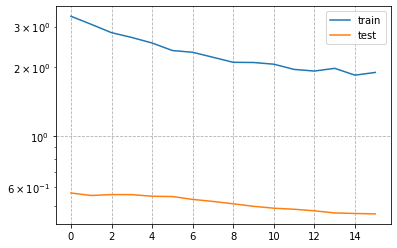

In [7]:
from CP_Detection.Visualization import PlotHistory
PlotHistory(hist_load)

In [4]:
AbstractBlock = 'C:32|C:32|C:32:C:32'

In [5]:
import re
pattern = re.compile('[P,C]:[1-9]\d*\|{1,}[P,C]:[1-9]\d*')

In [6]:
print(re.match(pattern, AbstractBlock))

<_sre.SRE_Match object; span=(0, 9), match='C:32|C:32'>


In [23]:
pattern = re.compile('^[P,C]:\d+\|$')
print(re.search(pattern, 'P:32|'))

<_sre.SRE_Match object; span=(0, 5), match='P:32|'>


In [52]:
AbstractBlock.split('|')

['C:32', 'C:32', 'C:32']